<a href="https://colab.research.google.com/github/AshmithaMB/Telangana_Growth_Insights/blob/main/TelanganaGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Importing the necessary libraries and loading the data*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import warnings

In [ ]:
date = pd.read_csv("/content/dim_date.csv")
districts = pd.read_csv("/content/dim_districts.csv")
ipass = pd.read_csv("/content/fact_TS_iPASS.csv")
stamp = pd.read_csv("/content/fact_stamps.csv")
transport = pd.read_csv("/content/fact_transport.csv")

#####*Preprocessing*

In [ ]:
district_mapping = {
    "19_1": "Adilabad",
    "22_2": "Bhadradri Kothagudem",
    "21_1": "Hanumakonda",
    "16_1": "Hyderabad",
    "20_2": "Jagtial",
    "21_3": "Jangoan",
    "21_7": "Jayashankar Bhupalpally",
    "14_2": "Jogulamba Gadwal",
    "18_2": "Kamareddy",
    "20_1": "Karimnagar",
    "22_1": "Khammam",
    "19_4": "Kumurambheem Asifabad",
    "21_5": "Mahabubabad",
    "14_1": "Mahabubnagar",
    "19_3": "Mancherial",
    "17_1": "Medak",
    "15_2": "Medchal_Malkajgiri",
    "21_6": "Mulugu",
    "14_3": "Nagarkurnool",
    "23_1": "Nalgonda",
    "14_5": "Narayanpet",
    "19_2": "Nirmal",
    "18_1": "Nizamabad",
    "20_4": "Peddapalli",
    "20_3": "Rajanna Sircilla",
    "15_1": "Rangareddy",
    "17_2": "Sangareddy",
    "17_3": "Siddipet",
    "23_2": "Suryapet",
    "15_3": "Vikarabad",
    "14_4": "Wanaparthy",
    "21_2": "Warangal",
    "23_3": "Yadadri Bhuvanagiri"
}

ipass["district"] = ipass["dist_code"].map(district_mapping)
stamp["district"] = stamp["dist_code"].map(district_mapping)
transport["district"] = transport["dist_code"].map(district_mapping)

In [ ]:
ipass["month"] = pd.to_datetime(ipass["month"], format="%d-%m-%Y").dt.strftime('%Y-%m-%d')
ipassdata = ipass.merge(date, on="month", how="left")
ipassdata["investment in cr"] = ipassdata["investment in cr"].round(decimals=1)
ipassdata

dist_code       month                              sector  \
0         14_1  2019-04-01                         Engineering   
1         19_1  2019-04-01                         Engineering   
2         20_3  2019-04-01                    Wood and Leather   
3         20_3  2019-04-01                            Textiles   
4         21_5  2019-04-01  Electrical and Electronic Products   
...        ...         ...                                 ...   
5748      20_4  2023-03-01                         Engineering   
5749      20_4  2023-03-01                     Food Processing   
5750      20_4  2023-03-01                              Others   
5751      21_1  2023-03-01                     Food Processing   
5752      20_2  2023-03-01                     Food Processing   

      investment in cr  number_of_employees          district  Mmm quarter  \
0                  2.3                   15      Mahabubnagar  Apr      Q1   
1                  0.6                   13          Adilabad  Apr      Q1   
2                  0.2                    8  Rajanna Sircilla  Apr      Q1   
3                  0.3                   27  Rajanna Sircilla  Apr      Q1   
4                  0.1                    5       Mahabubabad  Apr      Q1   
...                ...                  ...               ...  ...     ...   
5748               0.1                    3        Peddapalli  Mar      Q4   
5749               0.8                    9        Peddapalli  Mar      Q4   
5750               7.8                   10        Peddapalli  Mar      Q4   
5751               0.3                    9       Hanumakonda  Mar      Q4   
5752               4.7                   68           Jagtial  Mar      Q4   

      fiscal_year  
0            2019  
1            2019  
2            2019  
3            2019  
4            2019  
...           ...  
5748         2022  
5749         2022  
5750         2022  
5751         2022  
5752         2022  

[5753 rows x 9 columns]

In [ ]:
stampdata = stamp.merge(date, on="month", how="left")
stampdata['documents_registered_rev'] = stampdata['documents_registered_rev'] / 10**7
stampdata['documents_registered_rev'] = stampdata['documents_registered_rev'].round(1)

stampdata['estamps_challans_rev'] = stampdata['estamps_challans_rev'] / 10**7
stampdata['estamps_challans_rev'] = stampdata['estamps_challans_rev'].round(1)

stampdata

dist_code       month  documents_registered_cnt  \
0         14_1  2019-04-01                      4533   
1         17_3  2019-04-01                      4151   
2         20_3  2019-04-01                      2116   
3         21_5  2019-04-01                      1089   
4         23_1  2019-04-01                      6133   
...        ...         ...                       ...   
1499      20_4  2023-03-01                      1510   
1500      14_5  2023-03-01                       980   
1501      21_1  2023-03-01                      4321   
1502      22_2  2023-03-01                      1255   
1503      23_1  2023-03-01                      5806   

      documents_registered_rev  estamps_challans_cnt  estamps_challans_rev  \
0                          5.9                     0                   0.0   
1                          4.2                     0                   0.0   
2                          2.4                     0                   0.0   
3                          1.6                     0                   0.0   
4                          8.3                     0                   0.0   
...                        ...                   ...                   ...   
1499                       5.4                  1596                   5.7   
1500                       2.4                  1026                   2.3   
1501                      28.0                  4642                  28.5   
1502                       1.9                  1566                   2.2   
1503                      13.2                  5997                  13.5   

                  district  Mmm quarter  fiscal_year  
0             Mahabubnagar  Apr      Q1         2019  
1                 Siddipet  Apr      Q1         2019  
2         Rajanna Sircilla  Apr      Q1         2019  
3              Mahabubabad  Apr      Q1         2019  
4                 Nalgonda  Apr      Q1         2019  
...                    ...  ...     ...          ...  
1499            Peddapalli  Mar      Q4         2022  
1500            Narayanpet  Mar      Q4         2022  
1501           Hanumakonda  Mar      Q4         2022  
1502  Bhadradri Kothagudem  Mar      Q4         2022  
1503              Nalgonda  Mar      Q4         2022  

[1504 rows x 10 columns]

In [ ]:
transportdata = transport.merge(date, on="month", how="left")
transportdata

dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0         15_1  2019-04-01             17910              3011   
1         18_2  2019-04-01              3066               306   
2         20_3  2019-04-01              1577               215   
3         21_3  2019-04-01              1961               281   
4         21_7  2019-04-01              1552               309   
...        ...         ...               ...               ...   
1435      16_1  2023-03-01             24112              2169   
1436      14_4  2023-03-01               996               286   
1437      20_3  2023-03-01               886               183   
1438      23_3  2023-03-01              1659               472   
1439      18_2  2023-03-01              1767               239   

      fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                     76                22                    15308   
1                      6                 0                     2995   
2                      0                 0                     1546   
3                      2                 0                     1939   
4                      0                 0                     1512   
...                  ...               ...                      ...   
1435                2606              1848                    21501   
1436                  20                67                      884   
1437                  71                12                      828   
1438                  39                97                     1413   
1439                  32                28                     1532   

      vehicleClass_MotorCar  vehicleClass_AutoRickshaw  \
0                      4429                          0   
1                       142                         49   
2                        79                         29   
3                        72                         72   
4                        76                         69   
...                     ...                        ...   
1435                   5792                       1684   
1436                    137                         75   
1437                    146                         17   
1438                    289                         95   
1439                    251                         65   

      vehicleClass_Agriculture  ...  seatCapacity_4_to_6  \
0                            4  ...                 4182   
1                           64  ...                  189   
2                           21  ...                  104   
3                           48  ...                  146   
4                          109  ...                  145   
...                        ...  ...                  ...   
1435                         0  ...                 7139   
1436                       106  ...                  219   
1437                        54  ...                  167   
1438                       182  ...                  391   
1439                        58  ...                  344   

      seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles  \
0                      717               19542                1477   
1                       33                3322                  56   
2                        5                1751                  41   
3                       16                2209                  35   
4                       20                1820                  41   
...                    ...                 ...                 ...   
1435                  1093               26285                4450   
1436                    27                1300                  69   
1437                    19                1060                  92   
1438                    47                2107                 160   
1439                    42                1954                 112   

      category_Non-Transport  category_Transport                 district  \
0                      

## ***Revenue Generated From Document Registrations & E-Stamp Challan Payments***
* *This table tells us how much money is earned from two things: document registrations and estamp payments.*
* *Imagine when people need to register important documents, like property agreements, the government charges a fee.*
* *Similarly, when people use electronic stamps (estamps), they also pay a fee.*
* *This table shows how much money the government earns from these fees in each district every month.*
* *It also counts how many documents are registered and how many estamp payments are made.*

#### *1. How does the revenue generated from document registration vary across districts in Telangana? List down the top 5 districts that showed the highest document registration revenue growth between FY 2019 and 2022.*

In [ ]:
telangana_map = gpd.read_file('/content/telangana_district_map.json')
telangana_map.rename(columns={'Dist_Name': 'district'}, inplace=True)

In [ ]:
fy2019_revenue = stampdata[stampdata['fiscal_year'] == 2019].groupby('district')['documents_registered_rev'].sum()
fy2022_revenue = stampdata[stampdata['fiscal_year'] == 2022].groupby('district')['documents_registered_rev'].sum()

revenue_growth_percentage = ((fy2022_revenue - fy2019_revenue) / fy2019_revenue) * 100

fy2019_total_revenue = stampdata[stampdata['fiscal_year'] == 2019]['documents_registered_rev'].sum()
fy2022_total_revenue = stampdata[stampdata['fiscal_year'] == 2022]['documents_registered_rev'].sum()

result_df = pd.DataFrame({
    'district': revenue_growth_percentage.index,
    'Revenue Growth %': revenue_growth_percentage.values.round(1)
})

result_df = result_df.sort_values(by='Revenue Growth %', ascending=False)
result_df

district  Revenue Growth %
16                 Mulugu             167.1
0                Adilabad             123.6
8              Karimnagar              92.8
15     Medchal_Malkajgiri              91.7
13             Mancherial              91.7
29             Wanaparthy              89.1
11            Mahabubabad              88.7
21              Nizamabad              86.5
1    Bhadradri Kothagudem              81.5
26               Siddipet              80.3
25             Sangareddy              79.9
4                 Jagtial              76.8
9                 Khammam              74.6
22             Peddapalli              73.5
17           Nagarkurnool              72.2
3               Hyderabad              71.9
23       Rajanna Sircilla              67.8
19             Narayanpet              63.1
24             Rangareddy              62.1
2             Hanumakonda              62.1
27               Suryapet              60.0
14                  Medak              58.2
6        Jogulamba Gadwal              57.4
28              Vikarabad              56.5
20                 Nirmal              56.4
31    Yadadri Bhuvanagiri              52.7
7               Kamareddy              45.7
12           Mahabubnagar              34.9
30               Warangal              34.9
10  Kumurambheem Asifabad              31.0
18               Nalgonda              29.5
5                 Jangoan              15.6

In [ ]:
print("Top 5 Districts with Highest Document Registration Revenue Growth:")
result_df.head(5)

Top 5 Districts with Highest Document Registration Revenue Growth:


district  Revenue Growth %
16              Mulugu             167.1
0             Adilabad             123.6
8           Karimnagar              92.8
15  Medchal_Malkajgiri              91.7
13          Mancherial              91.7

In [ ]:
minimum_growth = result_df['Revenue Growth %'].min()
maximum_growth = result_df['Revenue Growth %'].max()

print("Minimum Revenue Growth %:", minimum_growth)
print("Maximum Revenue Growth %:", maximum_growth)

Minimum Revenue Growth %: 15.6
Maximum Revenue Growth %: 167.1


In [ ]:
Q1 = result_df['Revenue Growth %'].quantile(0.25)
Q3 = result_df['Revenue Growth %'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = result_df[(result_df['Revenue Growth %'] >= lower_bound) & (result_df['Revenue Growth %'] <= upper_bound)]

average_growth = filtered_df['Revenue Growth %'].mean()
print("Average Revenue Growth % (after removing outliers):", average_growth)

Average Revenue Growth % (after removing outliers): 66.32758620689656


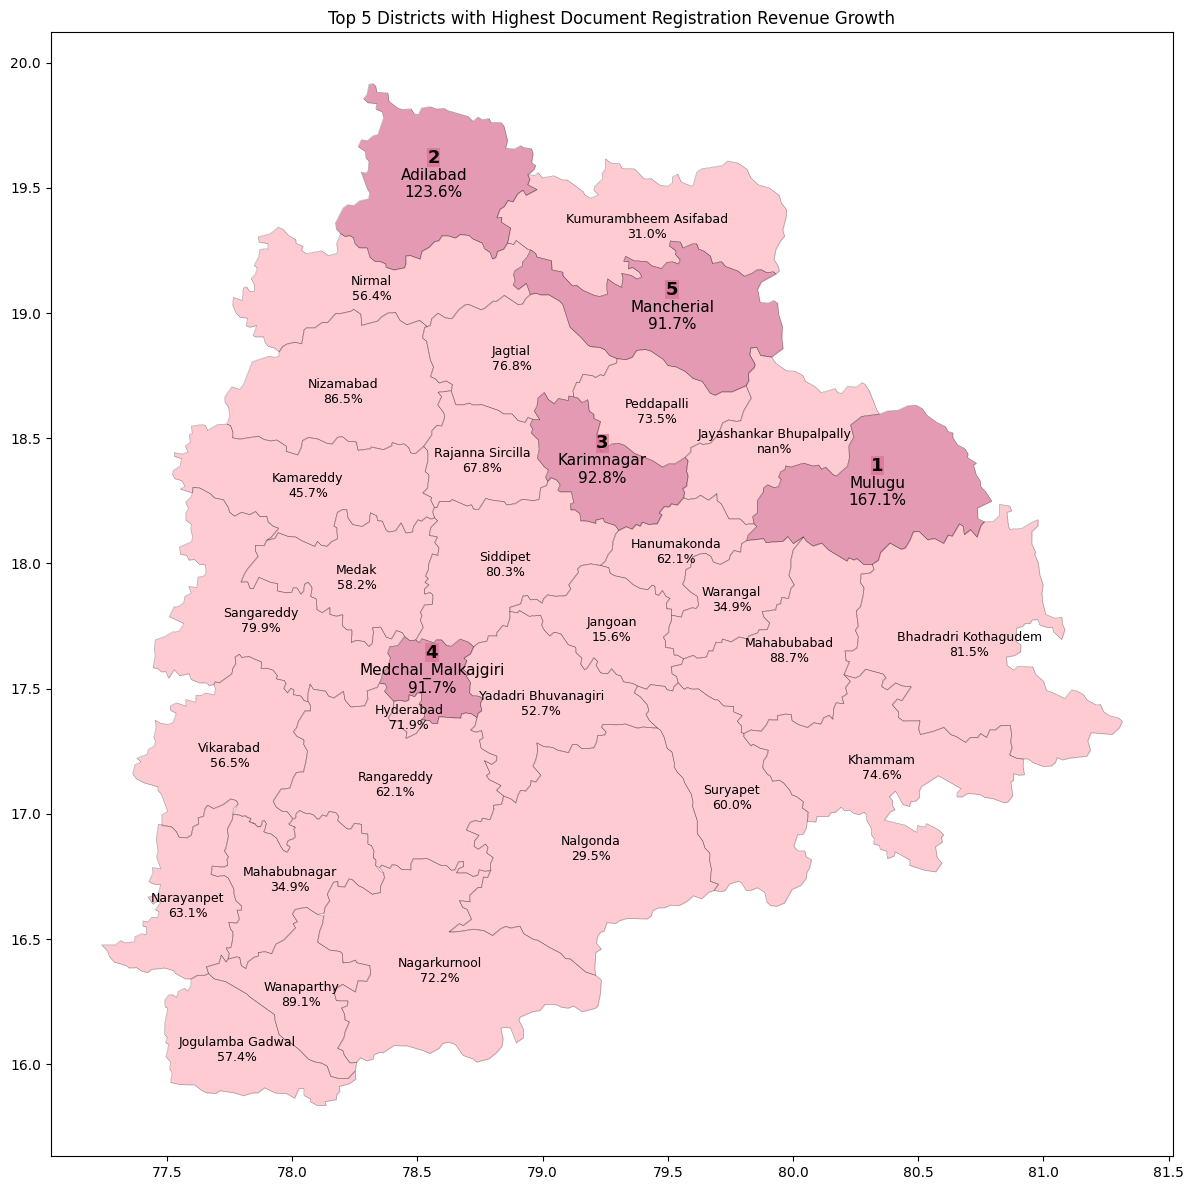

In [ ]:
highlighted_districts = pd.DataFrame({
    'district': ['Mulugu', 'Adilabad', 'Karimnagar', 'Medchal_Malkajgiri', 'Mancherial'],
    'color': ['palevioletred'] * 5
})

districts_with_growth = telangana_map.merge(result_df, on='district', how='left')
plt.figure(figsize=(17, 12))
ax = plt.gca()

district_numbers = {
    'Mulugu': 1,
    'Adilabad': 2,
    'Karimnagar': 3,
    'Medchal_Malkajgiri': 4,
    'Mancherial': 5
}

for idx, row in districts_with_growth.iterrows():
    color = highlighted_districts.loc[highlighted_districts['district'] == row['district'], 'color'].iloc[0] if row['district'] in highlighted_districts['district'].tolist() else 'lightpink'
    gpd.GeoSeries([row['geometry']]).boundary.plot(ax=ax, color='black', linewidth=0.1)
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color, edgecolor='black', linewidth=0.1, alpha=0.7)

    if row['district'] in district_numbers:
        number = district_numbers[row['district']]
        plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.10, f"{number}", ha='center', va='center', fontsize=13, color='black', weight='bold', bbox=dict(facecolor='palevioletred', alpha=0.7, edgecolor='none', pad=0.3))
        plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.06, f"{row['district']}\n{row['Revenue Growth %']:.1f}%", ha='center', va='top', fontsize=11, color='black')
    else:
        plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.04, f"{row['district']}\n{row['Revenue Growth %']:.1f}%", ha='center', va='top', fontsize=9, color='black')

ax.set_aspect('equal')
plt.title('Top 5 Districts with Highest Document Registration Revenue Growth')
plt.tight_layout()
plt.show()


####*2. How does the revenue generated from document registration compare to the revenue generated from e-stamp challans across districts? List down the top 5 districts where e-stamps revenue contributes significantly more to the revenue than the documents in FY 2022?*

In [ ]:
fy2022data = stampdata[stampdata['fiscal_year'] == 2022]
grouped_districts = fy2022data.groupby('district')
summed_districts = grouped_districts[['documents_registered_rev', 'estamps_challans_rev']].sum()

summed_districts['revenue_ratio'] = summed_districts['estamps_challans_rev'] / summed_districts['documents_registered_rev']
summed_districts['revenue_ratio'] = summed_districts['revenue_ratio'].round(4)
summed_districts['revenue_ratio'] = summed_districts['revenue_ratio'].apply(lambda x: f'{x:.4f}%')

summed_districts = summed_districts.sort_values(by='revenue_ratio', ascending=False)
summed_districts.reset_index(inplace = True)

print("Top 5 Districts with Significantly Higher E-stamps Revenue than Document Revenue in FY 2022:")
summed_districts

Top 5 Districts with Significantly Higher E-stamps Revenue than Document Revenue in FY 2022:


district  documents_registered_rev  estamps_challans_rev  \
0                 Jangoan                      47.3                  48.9   
1              Rangareddy                    3769.8                3835.0   
2              Mancherial                      65.0                  66.1   
3              Peddapalli                      60.9                  61.9   
4                 Khammam                     197.1                 200.2   
5               Kamareddy                      47.2                  47.9   
6                  Nirmal                      34.1                  34.6   
7            Mahabubnagar                     106.6                 108.1   
8        Rajanna Sircilla                      45.3                  45.9   
9        Jogulamba Gadwal                      32.9                  33.3   
10             Narayanpet                      26.1                  26.4   
11            Hanumakonda                     281.6                 284.7   
12                Jagtial                      63.1                  63.6   
13               Siddipet                     100.8                 101.6   
14    Yadadri Bhuvanagiri                     216.8                 218.5   
15              Hyderabad                    1426.6                1437.5   
16             Wanaparthy                      43.5                  43.8   
17              Nizamabad                     144.0                 144.9   
18               Nalgonda                     137.0                 137.8   
19                 Mulugu                      21.9                  22.0   
20              Vikarabad                      51.5                  51.7   
21             Karimnagar                     155.0                 155.6   
22           Nagarkurnool                      50.1                  50.2   
23               Suryapet                     102.4                 102.6   
24            Mahabubabad                      40.2                  40.2   
25               Warangal                      25.1                  25.1   
26             Sangareddy                     827.2                 826.0   
27     Medchal_Malkajgiri                    2404.4                2359.8   
28               Adilabad                      39.8                  38.9   
29   Bhadradri Kothagudem                      29.4                  28.7   
30  Kumurambheem Asifabad                       7.6                   7.4   
31                  Medak                      69.3                  66.2   

   revenue_ratio  
0        1.0338%  
1        1.0173%  
2        1.0169%  
3        1.0164%  
4        1.0157%  
5        1.0148%  
6        1.0147%  
7        1.0141%  
8        1.0132%  
9        1.0122%  
10       1.0115%  
11       1.0110%  
12       1.0079%  
13       1.0079%  
14       1.0078%  
15       1.0076%  
16       1.0069%  
17       1.0062%  
18       1.0058%  
19       1.0046%  
20       1.0039%  
21       1.0039%  
22       1.0020%  
23       1.0020%  
24       1.0000%  
25       1.0000%  
26       0.9985%  
27       0.9815%  
28       0.9774%  
29       0.9762%  
30       0.9737%  
31       0.9553%

In [ ]:
summed_districts.revenue_ratio.min()

'0.9553%'

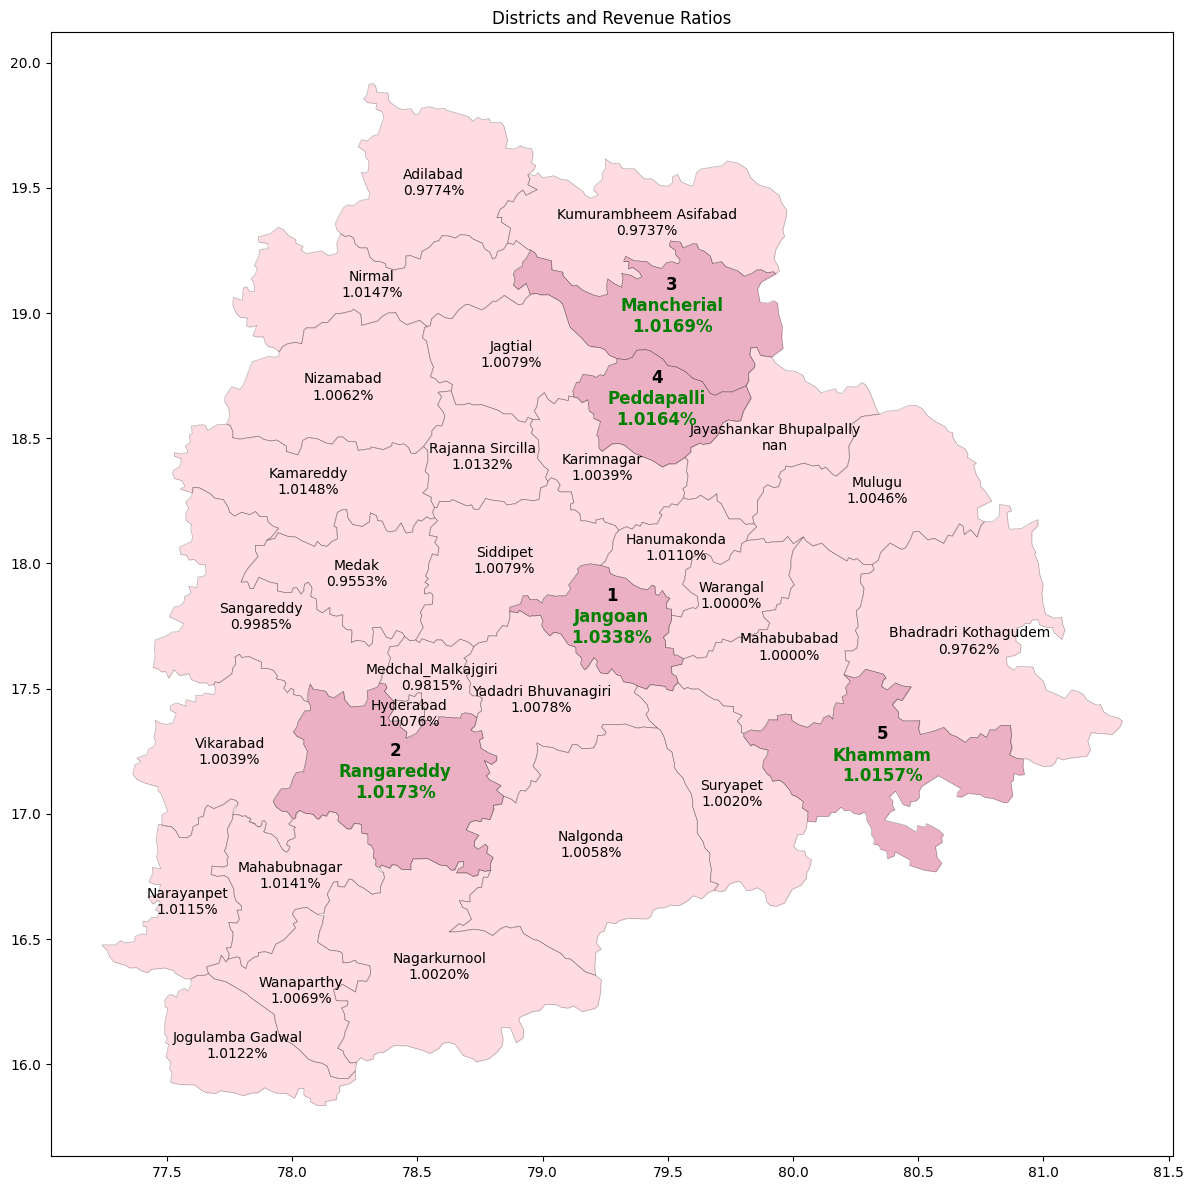

In [ ]:
highlighted_districts = pd.DataFrame({
    'district': ['Jangoan', 'Peddapalli', 'Rangareddy', 'Khammam', 'Mancherial'],
    'color': ['palevioletred'] * 5
})

districts_with_growth = telangana_map.merge(summed_districts, on='district', how='left')
plt.figure(figsize=(17, 12))
ax = plt.gca()

district_numbers = {
    'Jangoan': 1,
    'Peddapalli': 4,
    'Rangareddy': 2,
    'Khammam': 5,
    'Mancherial': 3
}

for idx, row in districts_with_growth.iterrows():
    if row['district'] in highlighted_districts['district'].tolist():
        color = 'palevioletred'
    else:
        color = 'pink'

    gpd.GeoSeries([row['geometry']]).boundary.plot(ax=ax, color='black', linewidth=0.1)
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color, edgecolor='black', linewidth=0.1, alpha=0.55)

    if row['district'] in district_numbers:
        number = district_numbers[row['district']]
        plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.12, f"{number}", ha='center', va='center', fontsize=12, color='black', weight='bold')
        plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.07, f"{row['district']}\n{row['revenue_ratio']}", ha='center', va='top', fontsize=12, color='green', weight='bold')
    else:
        plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.06, f"{row['district']}\n{row['revenue_ratio']}", ha='center', va='top', fontsize=10, color='black')

ax.set_aspect('equal')
plt.title('Districts and Revenue Ratios')
plt.tight_layout()
plt.show()

####*3. Is there any alteration of e-Stamp challan count and document registration count pattern since the implementation of e-Stamp challan? If so, what suggestions would you propose to the government?*

In [ ]:
stampdata['month'] = pd.to_datetime(stampdata['month'])

pre_impl_data = stampdata[stampdata['estamps_challans_cnt'] == 0]
post_impl_data = stampdata[stampdata['estamps_challans_cnt'] > 0]

pre_impl_years_months_range = (pre_impl_data['month'].min(), pre_impl_data['month'].max())
post_impl_years_months_range = (post_impl_data['month'].min(), post_impl_data['month'].max())

print("Pre-Implementation Years and Months Range:")
print(f"From: {pre_impl_years_months_range[0]}")
print(f"To: {pre_impl_years_months_range[1]}")
print("\nPost-Implementation Years and Months Range:")
print(f"From: {post_impl_years_months_range[0]}")
print(f"To: {post_impl_years_months_range[1]}")

Pre-Implementation Years and Months Range:
From: 2019-04-01 00:00:00
To: 2020-11-01 00:00:00

Post-Implementation Years and Months Range:
From: 2020-12-01 00:00:00
To: 2023-03-01 00:00:00


In [ ]:
post_impl_data.documents_registered_cnt.sum()

2786700

In [ ]:
pre_impl_data.documents_registered_cnt.sum()

2083263

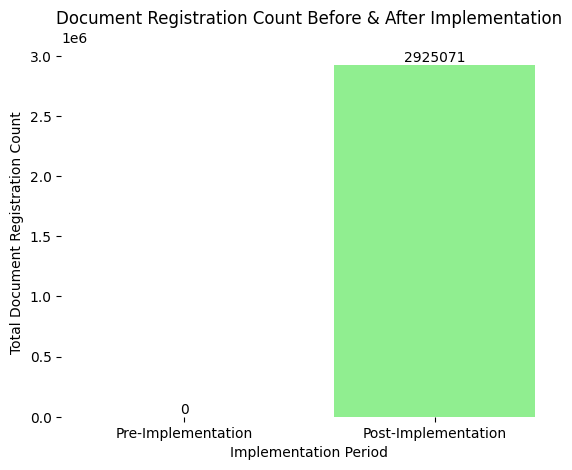

In [ ]:
stampdata['month'] = pd.to_datetime(stampdata['month'])

pre_impl_start = pd.to_datetime('2019-04-01')
pre_impl_end = pd.to_datetime('2020-11-01')
post_impl_start = pd.to_datetime('2020-12-01')
post_impl_end = pd.to_datetime('2023-03-01')

pre_impl_data = stampdata[(stampdata['month'] >= pre_impl_start) & (stampdata['month'] <= pre_impl_end)]
post_impl_data = stampdata[(stampdata['month'] >= post_impl_start) & (stampdata['month'] <= post_impl_end)]

pre_impl_sum = pre_impl_data['estamps_challans_cnt'].sum()
post_impl_sum = post_impl_data['estamps_challans_cnt'].sum()

plt.bar(['Pre-Implementation', 'Post-Implementation'], [pre_impl_sum, post_impl_sum],
        color=['lightblue', 'lightgreen'])
for i, v in enumerate([pre_impl_sum, post_impl_sum]):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel('Implementation Period')
plt.ylabel('Total Document Registration Count')
plt.title('Document Registration Count Before & After Implementation')
plt.box(False)
plt.show()

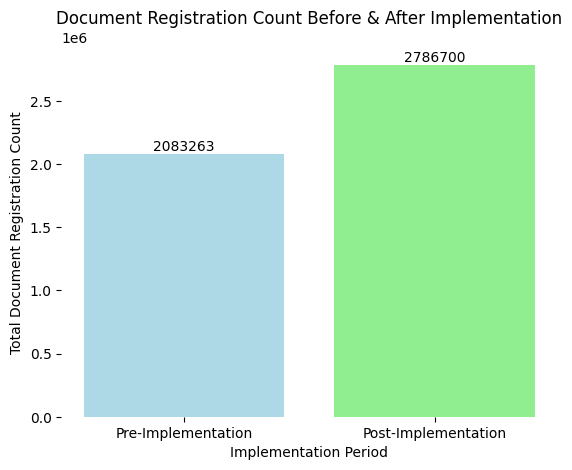

In [ ]:
stampdata['month'] = pd.to_datetime(stampdata['month'])

pre_impl_start = pd.to_datetime('2019-04-01')
pre_impl_end = pd.to_datetime('2020-11-01')
post_impl_start = pd.to_datetime('2020-12-01')
post_impl_end = pd.to_datetime('2023-03-01')

pre_impl_data = stampdata[(stampdata['month'] >= pre_impl_start) & (stampdata['month'] <= pre_impl_end)]
post_impl_data = stampdata[(stampdata['month'] >= post_impl_start) & (stampdata['month'] <= post_impl_end)]
pre_impl_sum = pre_impl_data['documents_registered_cnt'].sum()
post_impl_sum = post_impl_data['documents_registered_cnt'].sum()

plt.bar(['Pre-Implementation', 'Post-Implementation'], [pre_impl_sum, post_impl_sum],
        color=['lightblue', 'lightgreen'])
for i, v in enumerate([pre_impl_sum, post_impl_sum]):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel('Implementation Period')
plt.ylabel('Total Document Registration Count')
plt.title('Document Registration Count Before & After Implementation')
plt.box(False)
plt.show()

In [ ]:
stampdata['month'] = pd.to_datetime(stampdata['month'])
post_impl_data = stampdata[stampdata['month'] >= pd.to_datetime('2020-12-01')]

post_impl_data['year'] = post_impl_data['month'].dt.year
grouped_data1 = post_impl_data.groupby('year')['documents_registered_cnt']

result_df1 = pd.DataFrame(columns=['Year', 'Document Registration Count'])
for year, group in grouped_data1:
    result_df1 = pd.concat([result_df1, pd.DataFrame({'Year': [year], 'Document Registration Count': [group.sum()]})], ignore_index=True)

result_df1['Growth Ratio'] = result_df1['Document Registration Count'].pct_change()
result_df1

<ipython-input-21-d52c83640fb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_impl_data['year'] = post_impl_data['month'].dt.year


Year Document Registration Count  Growth Ratio
0  2020                       47019           NaN
1  2021                     1186016     24.224186
2  2022                     1239734      0.045293
3  2023                      313931     -0.746776

In [ ]:
stampdata['month'] = pd.to_datetime(stampdata['month'])
post_impl_data = stampdata[stampdata['month'] >= pd.to_datetime('2020-12-01')]

post_impl_data['year'] = post_impl_data['month'].dt.year
grouped_data = post_impl_data.groupby('year')['estamps_challans_cnt']

result_df = pd.DataFrame(columns=['Year', 'E-Stamp Challan Count'])

for year, group in grouped_data:
    result_df = pd.concat([result_df, pd.DataFrame({'Year': [year], 'E-Stamp Challan Count': [group.sum()]})], ignore_index=True)

result_df['Growth Ratio'] = result_df['E-Stamp Challan Count'].pct_change()

result_df

<ipython-input-22-0400b92fb534>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_impl_data['year'] = post_impl_data['month'].dt.year


Year E-Stamp Challan Count  Growth Ratio
0  2020                 54241           NaN
1  2021               1246508     21.980918
2  2022               1296370      0.040001
3  2023                327952     -0.747023

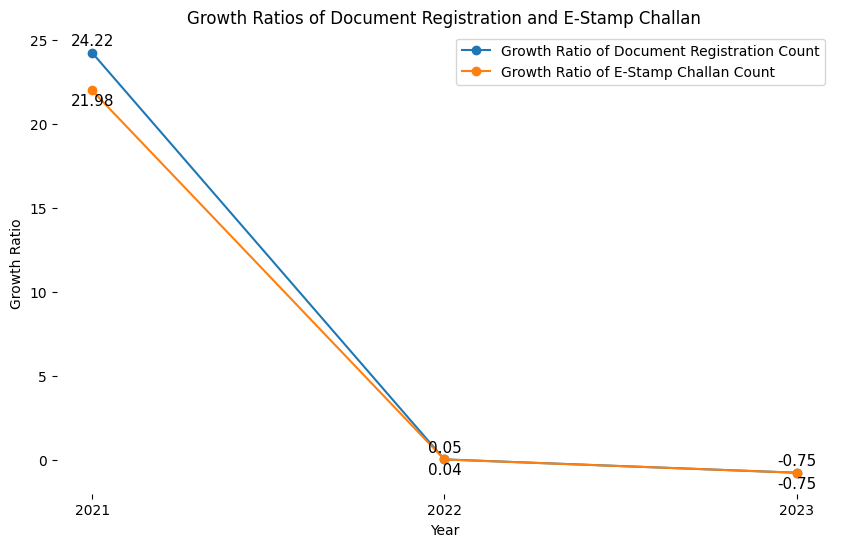

In [ ]:
plt.figure(figsize=(10, 6))
years = [2021, 2022, 2023]
result_df1_filtered = result_df1[result_df1['Year'].isin(years)]
result_df_filtered = result_df[result_df['Year'].isin(years)]

plt.plot(result_df1_filtered['Year'], result_df1_filtered['Growth Ratio'], marker='o', label='Growth Ratio of Document Registration Count')
plt.plot(result_df_filtered['Year'], result_df_filtered['Growth Ratio'], marker='o', label='Growth Ratio of E-Stamp Challan Count')

for i, row in result_df1_filtered.iterrows():
    plt.annotate(f"{row['Growth Ratio']:.2f}", (row['Year'], row['Growth Ratio']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=11)

for i, row in result_df_filtered.iterrows():
    plt.annotate(f"{row['Growth Ratio']:.2f}", (row['Year'], row['Growth Ratio']), textcoords="offset points", xytext=(0,-11), ha='center', fontsize=11)

plt.title("Growth Ratios of Document Registration and E-Stamp Challan")
plt.xlabel("Year")
plt.ylabel("Growth Ratio")
plt.legend()
plt.xticks(years)
plt.box(False)
plt.show()

In [ ]:
post_impl_grouped = post_impl_data.groupby('district').agg({
    'documents_registered_cnt': 'sum'
}).reset_index()

pre_impl_grouped = pre_impl_data.groupby('district').agg({
    'documents_registered_cnt': 'sum'
}).reset_index()

alteration_metrics = pd.DataFrame()
alteration_metrics['district'] = post_impl_grouped['district']
alteration_metrics['alteration_docs_regs'] = ((post_impl_grouped['documents_registered_cnt'] - pre_impl_grouped['documents_registered_cnt']) / pre_impl_grouped['documents_registered_cnt']) * 100
alteration_metrics['alteration_docs_regs'] = alteration_metrics['alteration_docs_regs'].round()

sorted_alteration_metrics = alteration_metrics.sort_values(by='alteration_docs_regs', ascending=False)

sorted_alteration_metrics

district  alteration_docs_regs
15     Medchal_Malkajgiri                  93.0
3               Hyderabad                  84.0
1    Bhadradri Kothagudem                  77.0
16                 Mulugu                  73.0
13             Mancherial                  60.0
0                Adilabad                  53.0
24             Rangareddy                  48.0
11            Mahabubabad                  44.0
2             Hanumakonda                  40.0
8              Karimnagar                  39.0
27               Suryapet                  38.0
21              Nizamabad                  38.0
25             Sangareddy                  25.0
9                 Khammam                  23.0
6        Jogulamba Gadwal                  22.0
23       Rajanna Sircilla                  22.0
31    Yadadri Bhuvanagiri                  21.0
20                 Nirmal                  18.0
22             Peddapalli                  18.0
26               Siddipet                  17.0
18               Nalgonda                  12.0
12           Mahabubnagar                  12.0
4                 Jagtial                  10.0
30               Warangal                   8.0
17           Nagarkurnool                   5.0
28              Vikarabad                   2.0
29             Wanaparthy                   1.0
5                 Jangoan                 -10.0
7               Kamareddy                 -11.0
10  Kumurambheem Asifabad                 -22.0
19             Narayanpet                 -26.0
14                  Medak                 -31.0

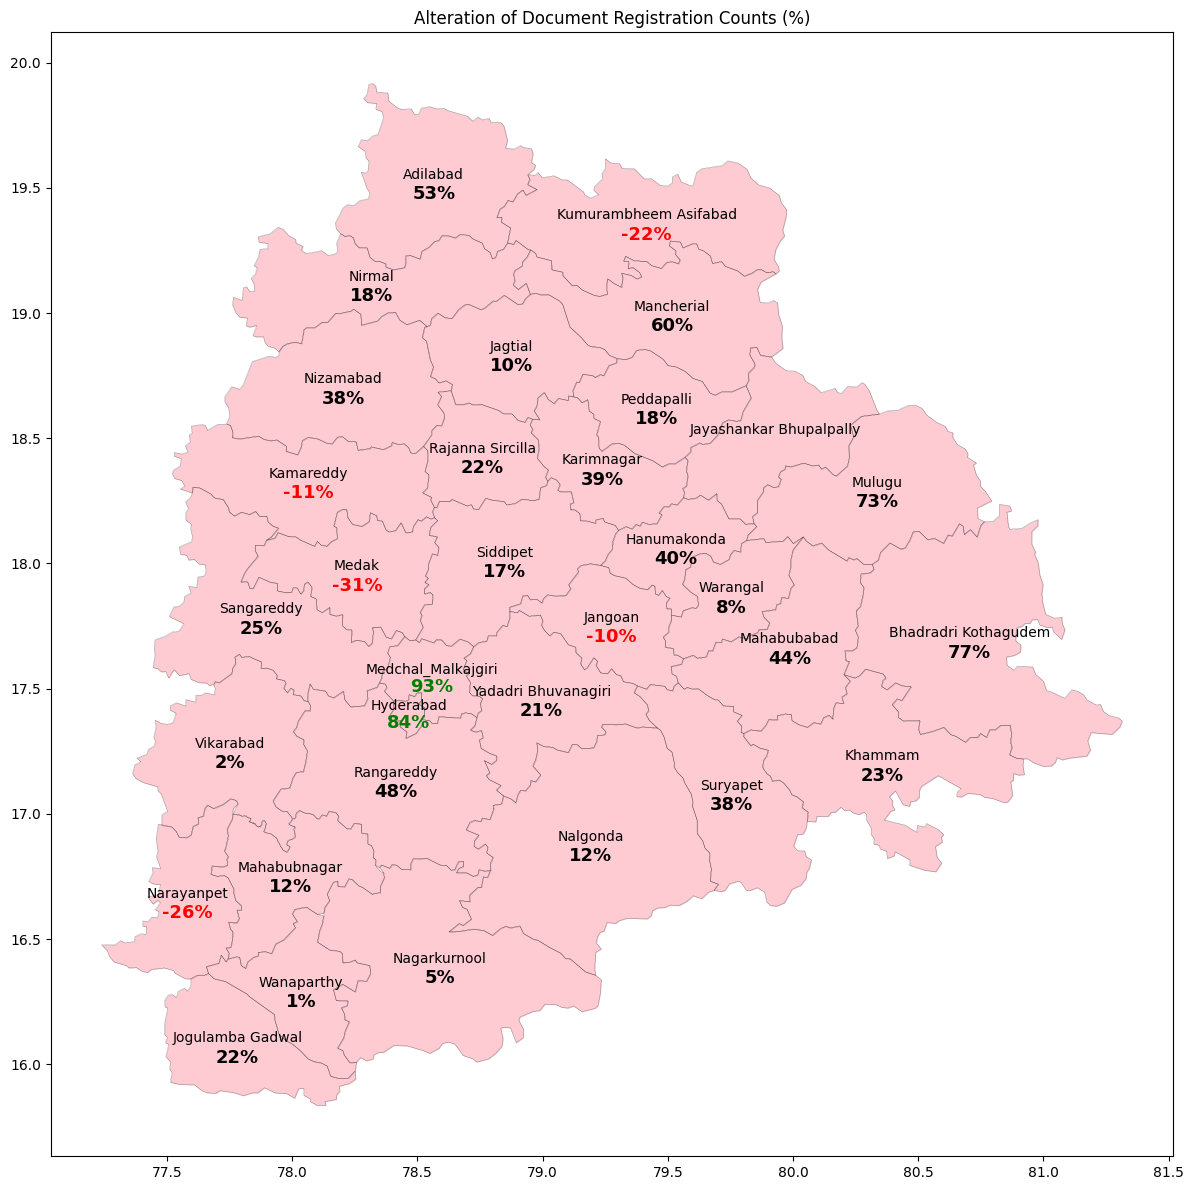

In [ ]:
districts_with_alteration = telangana_map.merge(sorted_alteration_metrics, on='district', how='left')
numbered_districts = ['Medchal_Malkajgiri', 'Hyderabad', 'Bhadradri Kothagudem', 'Mulugu', 'Mancherial',
                      'Adilabad', 'Rangareddy', 'Mahabubabad', 'Hanumakonda', 'Karimnagar', 'Suryapet',
                      'Nizamabad', 'Sangareddy', 'Khammam', 'Jogulamba Gadwal', 'Rajanna Sircilla',
                      'Yadadri Bhuvanagiri', 'Nirmal', 'Peddapalli', 'Siddipet', 'Nalgonda', 'Mahabubnagar',
                      'Jagtial', 'Warangal', 'Nagarkurnool', 'Vikarabad', 'Wanaparthy', 'Jangoan',
                      'Kamareddy', 'Kumurambheem Asifabad', 'Narayanpet', 'Medak']

plt.figure(figsize=(17, 12))
ax = plt.gca()

for idx, row in districts_with_alteration.iterrows():
    color = 'lightpink'
    gpd.GeoSeries([row['geometry']]).boundary.plot(ax=ax, color='black', linewidth=0.1)
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color, edgecolor='black', linewidth=0.1, alpha = 0.7)

    plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.06, f"{row['district']}", ha='center', va='top', fontsize=10, color='black')

    if not pd.isna(row['alteration_docs_regs']):
        alteration_value = int(row['alteration_docs_regs'])
        if row['district'] == 'Hyderabad' or row['district'] == 'Medchal_Malkajgiri':
            plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.00, f"{alteration_value}%", ha='center', va='top', fontsize=13, color='green', weight='bold')
        elif row['district'] in ['Narayanpet', 'Jangoan', 'Kamareddy', 'Medak', 'Kumurambheem Asifabad']:
            plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.01, f"{alteration_value}%", ha='center', va='top', fontsize=13, color='red', weight='bold')
        else:
            plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.01, f"{alteration_value}%", ha='center', va='top', fontsize=13, color='black', weight='bold')

ax.set_aspect('equal')

plt.title('Alteration of Document Registration Counts (%)')
plt.tight_layout()
plt.show()


In [ ]:
post_impl_data = stampdata[(stampdata['month'] >= '2020-11-01') & (stampdata['estamps_challans_cnt'] > 0)]
post_impl_data['year'] = post_impl_data['month'].dt.year
post_impl_grouped = post_impl_data.groupby(['district', 'year'])['estamps_challans_cnt'].sum().reset_index()
post_impl_grouped

<ipython-input-26-c4566d48ee8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_impl_data['year'] = post_impl_data['month'].dt.year


district  year  estamps_challans_cnt
0                Adilabad  2020                   463
1                Adilabad  2021                 14848
2                Adilabad  2022                 11409
3                Adilabad  2023                  3567
4    Bhadradri Kothagudem  2020                   329
..                    ...   ...                   ...
123              Warangal  2023                  2806
124   Yadadri Bhuvanagiri  2020                  2487
125   Yadadri Bhuvanagiri  2021                 63443
126   Yadadri Bhuvanagiri  2022                 68786
127   Yadadri Bhuvanagiri  2023                 15699

[128 rows x 3 columns]

In [ ]:
growth_df = post_impl_grouped.groupby('district')['estamps_challans_cnt'].diff()
growth_df

0          NaN
1      14385.0
2      -3439.0
3      -7842.0
4          NaN
        ...   
123    -7470.0
124        NaN
125    60956.0
126     5343.0
127   -53087.0
Name: estamps_challans_cnt, Length: 128, dtype: float64

####*4. Categorize districts into three segments based on their stamp registration revenue generation during the fiscal year 2021 to 2022.*

In [ ]:
fy2021_2022_data = stampdata[(stampdata['fiscal_year'] >= 2021) & (stampdata['fiscal_year'] <= 2022)]

district_revenue = fy2021_2022_data.groupby('district')['estamps_challans_rev'].sum()

q1 = np.percentile(district_revenue, 25)
q3 = np.percentile(district_revenue, 75)

revenue_percentiles = {
    'Q1': q1,
    'Q3': q3
}

def categorize_districts(revenue):
    if revenue <= revenue_percentiles['Q1']:
        return 'Low Revenue'
    elif revenue <= revenue_percentiles['Q3']:
        return 'Medium Revenue'
    else:
        return 'High Revenue'

district_revenue_segment = district_revenue.apply(categorize_districts)

revenue_segment_df = pd.DataFrame({
    'Total_Revenue': district_revenue.values,
    'Revenue_Segment': district_revenue_segment
})

revenue_segment_df.reset_index(inplace=True)
revenue_segment_df

district  Total_Revenue Revenue_Segment
0                Adilabad           72.3  Medium Revenue
1    Bhadradri Kothagudem           54.2     Low Revenue
2             Hanumakonda          496.1    High Revenue
3               Hyderabad         2526.8    High Revenue
4                 Jagtial          108.0  Medium Revenue
5                 Jangoan           75.1  Medium Revenue
6        Jogulamba Gadwal           60.6     Low Revenue
7               Kamareddy           85.9  Medium Revenue
8              Karimnagar          263.6    High Revenue
9                 Khammam          364.7    High Revenue
10  Kumurambheem Asifabad           13.3     Low Revenue
11            Mahabubabad           66.7     Low Revenue
12           Mahabubnagar          198.0  Medium Revenue
13             Mancherial          110.6  Medium Revenue
14                  Medak          114.5  Medium Revenue
15     Medchal_Malkajgiri         4234.6    High Revenue
16                 Mulugu           36.8     Low Revenue
17           Nagarkurnool           87.9  Medium Revenue
18               Nalgonda          260.1  Medium Revenue
19             Narayanpet           47.0     Low Revenue
20                 Nirmal           63.8     Low Revenue
21              Nizamabad          261.5  Medium Revenue
22             Peddapalli          112.6  Medium Revenue
23       Rajanna Sircilla           75.4  Medium Revenue
24             Rangareddy         7068.2    High Revenue
25             Sangareddy         1478.3    High Revenue
26               Siddipet          176.3  Medium Revenue
27               Suryapet          181.9  Medium Revenue
28              Vikarabad           90.4  Medium Revenue
29             Wanaparthy           74.5  Medium Revenue
30               Warangal           42.4     Low Revenue
31    Yadadri Bhuvanagiri          380.0    High Revenue

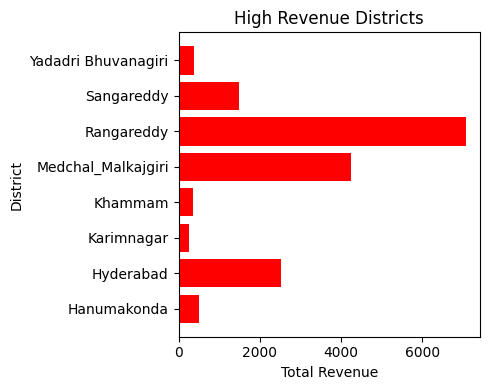

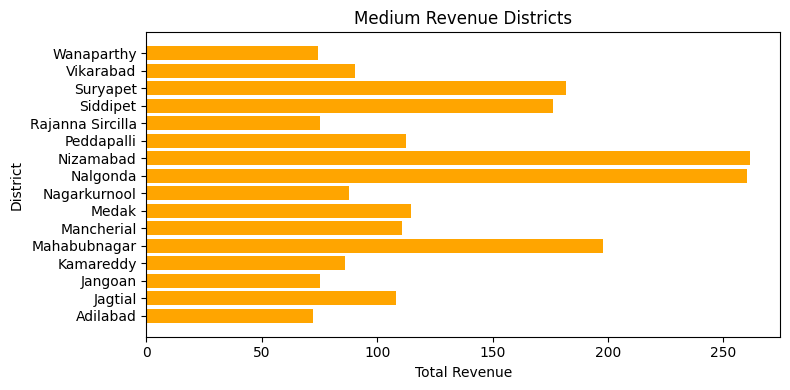

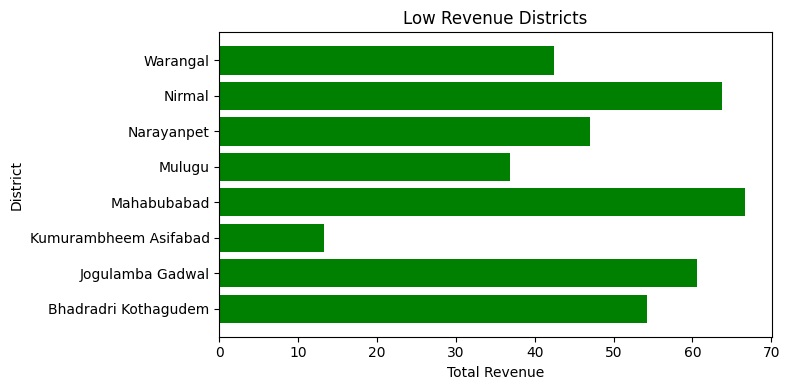

In [ ]:
high_revenue_data = revenue_segment_df[revenue_segment_df['Revenue_Segment'] == 'High Revenue']
medium_revenue_data = revenue_segment_df[revenue_segment_df['Revenue_Segment'] == 'Medium Revenue']
low_revenue_data = revenue_segment_df[revenue_segment_df['Revenue_Segment'] == 'Low Revenue']

plt.figure(figsize=(5, 4))
plt.barh(high_revenue_data['district'], high_revenue_data['Total_Revenue'], color='red')
plt.xlabel('Total Revenue')
plt.ylabel('District')
plt.title('High Revenue Districts')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.barh(medium_revenue_data['district'], medium_revenue_data['Total_Revenue'], color='orange')
plt.xlabel('Total Revenue')
plt.ylabel('District')
plt.title('Medium Revenue Districts')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.barh(low_revenue_data['district'], low_revenue_data['Total_Revenue'], color='green')
plt.xlabel('Total Revenue')
plt.ylabel('District')
plt.title('Low Revenue Districts')
plt.tight_layout()
plt.show()

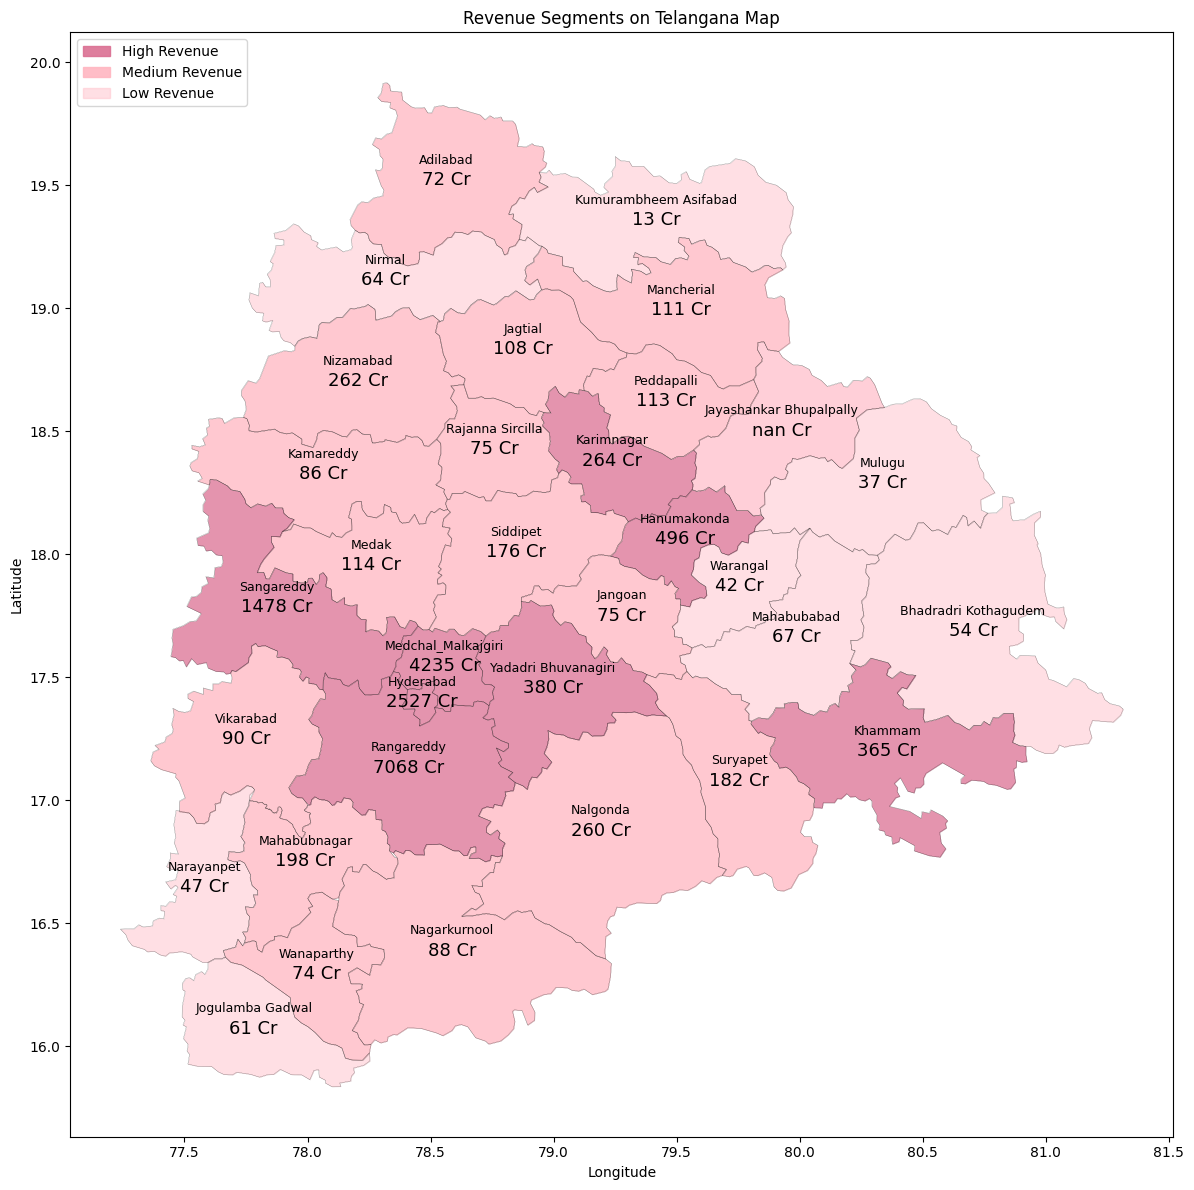

In [ ]:
districts_with_revenue = telangana_map.merge(revenue_segment_df, on='district', how='left')

colors = {
    'Low Revenue': 'pink',
    'Medium Revenue': 'lightpink',
    'High Revenue': 'palevioletred'
}

plt.figure(figsize=(17, 12))
ax = plt.gca()

for idx, row in districts_with_revenue.iterrows():
    color = colors.get(row['Revenue_Segment'], 'pink')  # Default to pink for NaN values
    gpd.GeoSeries([row['geometry']]).boundary.plot(ax=ax, color='black', linewidth=0.1)

    alpha = 0.5 if row['Revenue_Segment'] == 'Low Revenue' else 0.75  # Set alpha based on revenue segment

    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color, edgecolor='black', linewidth=0.1, alpha=alpha)

    district_name = row['district']
    revenue_text = f"{row['Total_Revenue']:.0f} Cr"

    plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.08, district_name, ha='center', va='center', fontsize=9, color='black')
    plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y, revenue_text, ha='center', va='center', fontsize=13, color='black')

ax.set_aspect('equal')

high_legend = mpatches.Patch(color='palevioletred', label='High Revenue', alpha=0.9)
medium_legend = mpatches.Patch(color='lightpink', label='Medium Revenue', alpha=0.9)
low_legend = mpatches.Patch(color='pink', label='Low Revenue', alpha=0.5)

plt.legend(handles=[high_legend, medium_legend, low_legend], loc='upper left')

plt.title('Revenue Segments on Telangana Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

plt.subplots_adjust(right=0.8)
plt.show()

##***Individual Vehicle Sales Data from the RTA(Regional Transport Authority) of Telangana***
* *We get insights into vehicle sales across different districts. It's like keeping track of how many cars, bikes, and other vehicles are sold.*
* *The table provides details about things like the kind of fuel a vehicle uses (like petrol or electric), what type of vehicle it is (car, motorcycle, etc.), and how many people it can carry.*
* *This information helps understand trends in vehicle sales and what kinds of vehicles are popular in different areas.*

####*5. Investigate whether there is any correlation between vehicle sales and specific months or seasons in different districts. Are there any months or seasons that consistently show higher or lower sales rate, and if yes, what could be the driving factors? (Consider Fuel-Type category only)*

In [ ]:
fuel_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']
pivot_table = transportdata.pivot_table(index=['district', 'Mmm'], values=fuel_types, aggfunc='sum')
pivot_table.reset_index(inplace=True)
pivot_table

district  Mmm  fuel_type_diesel  fuel_type_electric  \
0               Adilabad  Apr               661                  10   
1               Adilabad  Aug               732                  47   
2               Adilabad  Dec               838                  56   
3               Adilabad  Feb              1265                  65   
4               Adilabad  Jan              1086                  85   
..                   ...  ...               ...                 ...   
355  Yadadri Bhuvanagiri  Mar              2185                 104   
356  Yadadri Bhuvanagiri  May              1696                  28   
357  Yadadri Bhuvanagiri  Nov              2040                  37   
358  Yadadri Bhuvanagiri  Oct              2806                  22   
359  Yadadri Bhuvanagiri  Sep              1984                  24   

     fuel_type_others  fuel_type_petrol  
0                   4              4861  
1                   6              5133  
2                  11              4562  
3                   6              6139  
4                  11              5310  
..                ...               ...  
355               280              7664  
356                68              5925  
357               303              8556  
358               308              9767  
359               546              6669  

[360 rows x 6 columns]

In [ ]:
fuel_types = ['fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others', 'fuel_type_petrol']
result_data = []

for district in pivot_table['district'].unique():
    district_data = pivot_table[pivot_table['district'] == district]
    for fuel_type in fuel_types:
        max_month = district_data.loc[district_data[fuel_type].idxmax(), 'Mmm']
        max_value = district_data[fuel_type].max()
        min_month = district_data.loc[district_data[fuel_type].idxmin(), 'Mmm']
        min_value = district_data[fuel_type].min()

        result_data.append({
            'District': district,
            'Fuel Type': fuel_type.split('_')[-1].capitalize(),
            'Highest Month': max_month,
            'Highest Sales': max_value,
            'Lowest Month': min_month,
            'Lowest Sales': min_value
        })

result_df = pd.DataFrame(result_data)
result_df

District Fuel Type Highest Month  Highest Sales Lowest Month  \
0                Adilabad    Diesel           Mar           1619          May   
1                Adilabad  Electric           Mar            122          Apr   
2                Adilabad    Others           Sep             25          Apr   
3                Adilabad    Petrol           Oct           8233          Sep   
4    Bhadradri Kothagudem    Diesel           Jun           3278          Aug   
..                    ...       ...           ...            ...          ...   
115              Warangal    Petrol           Oct          21941          Apr   
116   Yadadri Bhuvanagiri    Diesel           Oct           2806          Apr   
117   Yadadri Bhuvanagiri  Electric           Mar            104          Oct   
118   Yadadri Bhuvanagiri    Others           Dec            702          Jun   
119   Yadadri Bhuvanagiri    Petrol           Oct           9767          Apr   

     Lowest Sales  
0             583  
1              10  
2               4  
3            3935  
4            1712  
..            ...  
115         11528  
116          1272  
117            22  
118            62  
119          5921  

[120 rows x 6 columns]

####*Petrol*

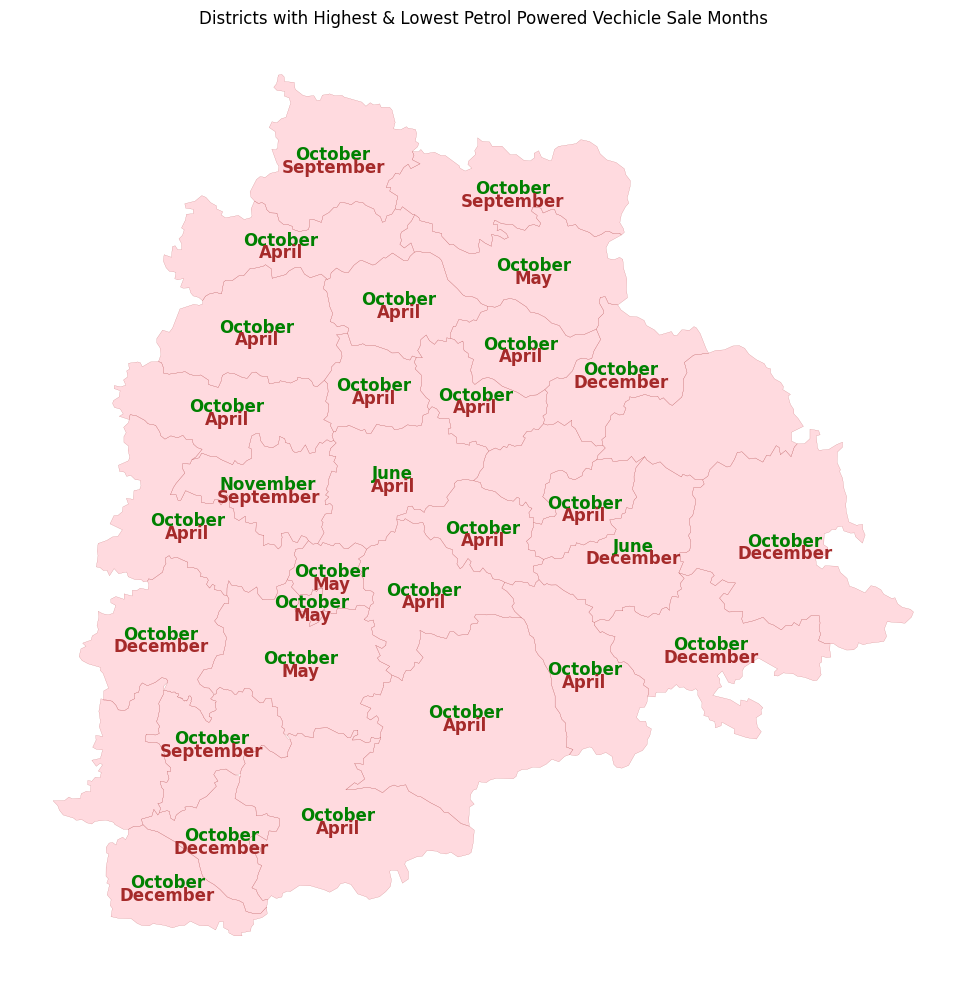

In [ ]:
districts_october = ['Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagtial', 'Jangoan', 'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Kamareddy', 'Karimnagar', 'Khammam', 'Kumurambheem Asifabad', 'Mahabubnagar', 'Mancherial', 'Medchal_Malkajgiri', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Rangareddy', 'Sangareddy', 'Suryapet', 'Vikarabad', 'Wanaparthy', 'Warangal', 'Yadadri Bhuvanagiri']  # Define your districts here
districts_june = ['Mahabubabad', 'Siddipet']
districts_november = ['Medak']

districts_month_data = pd.DataFrame({
    'district': districts_october + districts_june + districts_november,
    'sale_month': (['October'] * len(districts_october)) + (['June'] * len(districts_june)) + (['November'] * len(districts_november))
})

districts_with_month = telangana_map.merge(districts_month_data, how='left', left_on='district', right_on='district')

districts_april_lowest = ['Jagtial', 'Jangoan', 'Kamareddy', 'Karimnagar', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Sangareddy', 'Siddipet', 'Suryapet', 'Warangal', 'Yadadri Bhuvanagiri']  # Define your districts here
districts_december_lowest = ['Bhadradri Kothagudem', 'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Khammam', 'Mahabubabad', 'Vikarabad', 'Wanaparthy']  # Define your districts here
districts_september_lowest = ['Adilabad', 'Kumurambheem Asifabad','Mahabubnagar', 'Medak']
districts_may_lowest = ['Hyderabad', 'Mancherial', 'Medchal_Malkajgiri', 'Rangareddy']

districts_lowest_month_data = pd.DataFrame({
    'district': districts_april_lowest + districts_december_lowest + districts_september_lowest + districts_may_lowest,
    'sale_month': (['April'] * len(districts_april_lowest)) + (['December'] * len(districts_december_lowest)) + (['September'] * len(districts_september_lowest)) + (['May'] * len(districts_may_lowest))
})

districts_with_lowest_month = telangana_map.merge(districts_lowest_month_data, how='left', left_on='district', right_on='district')

fig, ax = plt.subplots(figsize=(15, 10))
districts_with_month.boundary.plot(ax=ax, color='brown', linewidth=0.1)
districts_with_month.plot(ax=ax, color='lightpink', edgecolor='none', alpha=0.5)

for idx, row in districts_with_month.iterrows():
    if row['district'] in districts_october + districts_june + districts_november:
        annotation = f"{row['sale_month']}"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.02, annotation, fontsize=12, weight='bold', ha='center', va='center', color='green')

for idx, row in districts_with_lowest_month.iterrows():
    if row['district'] in districts_april_lowest + districts_december_lowest + districts_september_lowest + districts_may_lowest:
        annotation = f"{row['sale_month']}"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.04, annotation, fontsize=12, weight='bold', ha='center', va='center', color='brown')

plt.title("Districts with Highest & Lowest Petrol Powered Vechicle Sale Months")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
fuel_type = 'fuel_type_petrol'
result_data = []

for district in pivot_table['district'].unique():
    district_data = pivot_table[pivot_table['district'] == district]

    max_month = district_data.loc[district_data[fuel_type].idxmax(), 'Mmm']
    max_value = district_data[fuel_type].max()
    min_month = district_data.loc[district_data[fuel_type].idxmin(), 'Mmm']
    min_value = district_data[fuel_type].min()

    result_data.append({
        'District': district,
        'Fuel Type': fuel_type.split('_')[-1].capitalize(),
        'Highest Month': max_month,
        'Highest Sales': max_value,
        'Lowest Month': min_month,
        'Lowest Sales': min_value
    })

result_df_petrol = pd.DataFrame(result_data)
result_df_petrol

District Fuel Type Highest Month  Highest Sales  \
0                  Adilabad    Petrol           Oct           8233   
1      Bhadradri Kothagudem    Petrol           Oct          14020   
2                 Hyderabad    Petrol           Oct         109967   
3                   Jagtial    Petrol           Oct          12576   
4                   Jangoan    Petrol           Oct           5916   
5   Jayashankar Bhupalpally    Petrol           Oct           6766   
6          Jogulamba Gadwal    Petrol           Oct           7658   
7                 Kamareddy    Petrol           Oct          12451   
8                Karimnagar    Petrol           Oct          15595   
9                   Khammam    Petrol           Oct          20650   
10    Kumurambheem Asifabad    Petrol           Oct           4377   
11              Mahabubabad    Petrol           Jun           8634   
12             Mahabubnagar    Petrol           Oct          16678   
13               Mancherial    Petrol           Oct           8821   
14                    Medak    Petrol           Nov           7526   
15       Medchal_Malkajgiri    Petrol           Oct          96338   
16             Nagarkurnool    Petrol           Oct           8770   
17                 Nalgonda    Petrol           Oct          22977   
18                   Nirmal    Petrol           Oct           8914   
19                Nizamabad    Petrol           Oct          24404   
20               Peddapalli    Petrol           Oct           8721   
21         Rajanna Sircilla    Petrol           Oct           7683   
22               Rangareddy    Petrol           Oct          89368   
23               Sangareddy    Petrol           Oct          24578   
24                 Siddipet    Petrol           Jun          12052   
25                 Suryapet    Petrol           Oct          15566   
26                Vikarabad    Petrol           Oct          14717   
27               Wanaparthy    Petrol           Oct           7831   
28                 Warangal    Petrol           Oct          21941   
29      Yadadri Bhuvanagiri    Petrol           Oct           9767   

   Lowest Month  Lowest Sales  
0           Sep          3935  
1           Dec          7605  
2           May         58439  
3           Apr          6335  
4           Apr          3997  
5           Dec          4327  
6           Dec          3705  
7           Apr          7147  
8           Apr          7357  
9           Dec         11063  
10          Sep          2365  
11          Dec          4799  
12          Sep          8432  
13          May          5186  
14          Sep          5205  
15          May         49074  
16          Apr          5407  
17          Apr         10825  
18          Apr          4963  
19          Apr         11523  
20          Apr          4746  
21          Apr          3600  
22          May         47108  
23          Apr         14894  
24          Apr          7043  
25          Apr          7575  
26          Dec          9811  
27          Dec          3848  
28          Apr         11528  
29          Apr          5921

In [ ]:
highest_month_petrol = result_df_petrol['Highest Month'].value_counts()
highest_month_petrol

Oct    27
Jun     2
Nov     1
Name: Highest Month, dtype: int64

In [ ]:
districts_by_highest_month = {}
for row in result_df_petrol.iterrows():
    district = row[1]['District']
    highest_month = row[1]['Highest Month']

    if highest_month not in districts_by_highest_month:
        districts_by_highest_month[highest_month] = [district]
    else:
        districts_by_highest_month[highest_month].append(district)
for month, districts in districts_by_highest_month.items():
    print(f"{month}: {districts}")

Oct: ['Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagtial', 'Jangoan', 'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Kamareddy', 'Karimnagar', 'Khammam', 'Kumurambheem Asifabad', 'Mahabubnagar', 'Mancherial', 'Medchal_Malkajgiri', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Rangareddy', 'Sangareddy', 'Suryapet', 'Vikarabad', 'Wanaparthy', 'Warangal', 'Yadadri Bhuvanagiri']
Jun: ['Mahabubabad', 'Siddipet']
Nov: ['Medak']


In [ ]:
lowest_month_petrol = result_df_petrol['Lowest Month'].value_counts()
lowest_month_petrol

Apr    15
Dec     7
Sep     4
May     4
Name: Lowest Month, dtype: int64

In [ ]:
districts_by_lowest_month = {}
for row in result_df_petrol.iterrows():
    district = row[1]['District']
    lowest_month = row[1]['Lowest Month']

    if lowest_month not in districts_by_lowest_month:
        districts_by_lowest_month[lowest_month] = [district]
    else:
        districts_by_lowest_month[lowest_month].append(district)
for month, districts in districts_by_lowest_month.items():
    print(f"{month}: {districts}")

Sep: ['Adilabad', 'Kumurambheem Asifabad', 'Mahabubnagar', 'Medak']
Dec: ['Bhadradri Kothagudem', 'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Khammam', 'Mahabubabad', 'Vikarabad', 'Wanaparthy']
May: ['Hyderabad', 'Mancherial', 'Medchal_Malkajgiri', 'Rangareddy']
Apr: ['Jagtial', 'Jangoan', 'Kamareddy', 'Karimnagar', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Sangareddy', 'Siddipet', 'Suryapet', 'Warangal', 'Yadadri Bhuvanagiri']


####*Diesel*

In [ ]:
fuel_type = 'fuel_type_diesel'
result_data = []

for district in pivot_table['district'].unique():
    district_data = pivot_table[pivot_table['district'] == district]

    max_month = district_data.loc[district_data[fuel_type].idxmax(), 'Mmm']
    max_value = district_data[fuel_type].max()
    min_month = district_data.loc[district_data[fuel_type].idxmin(), 'Mmm']
    min_value = district_data[fuel_type].min()

    result_data.append({
        'District': district,
        'Fuel Type': fuel_type.split('_')[-1].capitalize(),
        'Highest Month': max_month,
        'Highest Sales': max_value,
        'Lowest Month': min_month,
        'Lowest Sales': min_value
    })

result_df_diesel = pd.DataFrame(result_data)
result_df_diesel

District Fuel Type Highest Month  Highest Sales  \
0                  Adilabad    Diesel           Mar           1619   
1      Bhadradri Kothagudem    Diesel           Jun           3278   
2                 Hyderabad    Diesel           Mar           9014   
3                   Jagtial    Diesel           Oct           2004   
4                   Jangoan    Diesel           Jun           1747   
5   Jayashankar Bhupalpally    Diesel           Jun           2558   
6          Jogulamba Gadwal    Diesel           Oct           1100   
7                 Kamareddy    Diesel           Oct           2034   
8                Karimnagar    Diesel           Jun           3727   
9                   Khammam    Diesel           Jun           4159   
10    Kumurambheem Asifabad    Diesel           Mar           1160   
11              Mahabubabad    Diesel           Jun           2393   
12             Mahabubnagar    Diesel           Oct           3142   
13               Mancherial    Diesel           Oct           1838   
14                    Medak    Diesel           Jun           2673   
15       Medchal_Malkajgiri    Diesel           Oct          12205   
16             Nagarkurnool    Diesel           Oct           2632   
17                 Nalgonda    Diesel           Oct           4954   
18                   Nirmal    Diesel           Oct           1973   
19                Nizamabad    Diesel           Oct           4054   
20               Peddapalli    Diesel           Jun           1759   
21         Rajanna Sircilla    Diesel           Oct           1584   
22               Rangareddy    Diesel           Mar          10719   
23               Sangareddy    Diesel           Oct           4337   
24                 Siddipet    Diesel           Jun           3002   
25                 Suryapet    Diesel           Jun           4562   
26                Vikarabad    Diesel           Oct           3668   
27               Wanaparthy    Diesel           Jun           1442   
28                 Warangal    Diesel           Jun           3664   
29      Yadadri Bhuvanagiri    Diesel           Oct           2806   

   Lowest Month  Lowest Sales  
0           May           583  
1           Aug          1712  
2           May          5605  
3           Apr           920  
4           Apr           775  
5           Aug           976  
6           May           677  
7           Apr           901  
8           Nov          1939  
9           Apr          2104  
10          Apr           405  
11          Aug          1013  
12          Apr          1803  
13          May           914  
14          Apr          1121  
15          May          7438  
16          Apr          1481  
17          Apr          2203  
18          Apr           677  
19          Apr          1965  
20          Apr           841  
21          Apr           618  
22          May          6868  
23          May          2491  
24          Apr          1579  
25          Aug          1962  
26          Apr          1930  
27          May           833  
28          Apr          1892  
29          Apr          1272

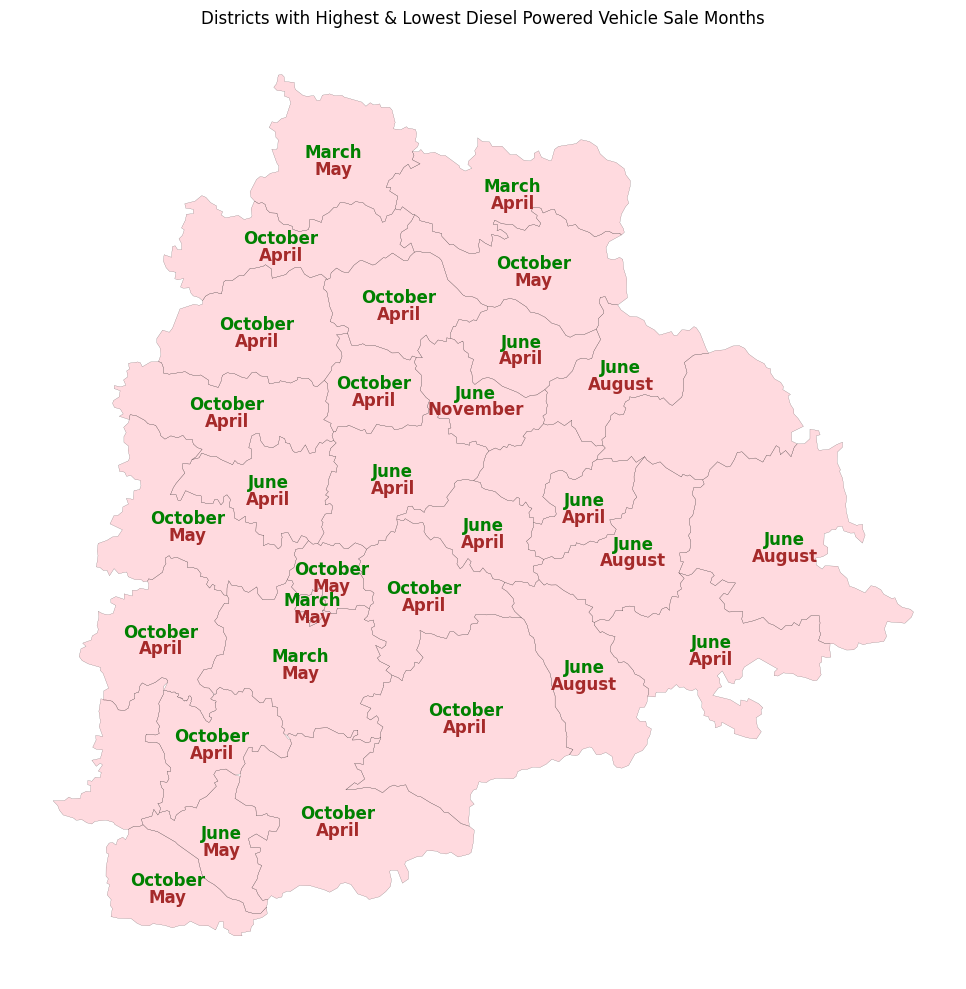

In [ ]:
districts_october = ['Jagtial', 'Jogulamba Gadwal', 'Kamareddy', 'Mahabubnagar', 'Mancherial', 'Medchal_Malkajgiri', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Rajanna Sircilla', 'Sangareddy', 'Vikarabad', 'Yadadri Bhuvanagiri']
districts_june = ['Bhadradri Kothagudem', 'Jangoan', 'Jayashankar Bhupalpally', 'Karimnagar', 'Khammam', 'Mahabubabad', 'Medak', 'Peddapalli', 'Siddipet', 'Suryapet', 'Wanaparthy', 'Warangal']
districts_march = ['Adilabad', 'Hyderabad', 'Kumurambheem Asifabad', 'Rangareddy']

districts_highest = districts_october + districts_june + districts_march

# Define the districts and their lowest sale months
districts_april_lowest = ['Jagtial', 'Jangoan', 'Kamareddy', 'Khammam', 'Kumurambheem Asifabad', 'Mahabubnagar', 'Medak', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Siddipet', 'Vikarabad', 'Warangal', 'Yadadri Bhuvanagiri']
districts_november_lowest = ['Karimnagar']
districts_august_lowest = ['Bhadradri Kothagudem', 'Jayashankar Bhupalpally', 'Mahabubabad', 'Suryapet']
districts_may_lowest = ['Adilabad', 'Hyderabad', 'Jogulamba Gadwal', 'Mancherial', 'Medchal_Malkajgiri', 'Rangareddy', 'Sangareddy', 'Wanaparthy']

districts_lowest = districts_april_lowest + districts_november_lowest + districts_august_lowest + districts_may_lowest

# Create a DataFrame for highest sale months
districts_month_data = pd.DataFrame({
    'district': districts_highest,
    'sale_month': (['October'] * len(districts_october)) + (['June'] * len(districts_june)) + (['March'] * len(districts_march))
})

# Create a DataFrame for lowest sale months
districts_lowest_month_data = pd.DataFrame({
    'district': districts_lowest,
    'sale_month': (['April'] * len(districts_april_lowest)) + (['November'] * len(districts_november_lowest)) + (['August'] * len(districts_august_lowest)) + (['May'] * len(districts_may_lowest))
})

# Merge with Telangana map data
districts_with_month = telangana_map.merge(districts_month_data, how='left', left_on='district', right_on='district')
districts_with_lowest_month = telangana_map.merge(districts_lowest_month_data, how='left', left_on='district', right_on='district')

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
districts_with_month.boundary.plot(ax=ax, color='black', linewidth=0.1)
districts_with_month.plot(ax=ax, color='lightpink', edgecolor='none', alpha=0.5)

# Annotate districts with their highest sale months
for idx, row in districts_with_month.iterrows():
    if row['district'] in districts_highest:
        annotation = f"{row['sale_month']}"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.03, annotation, fontsize=12, weight='bold', ha='center', va='center', color='green')

# Annotate districts with their lowest sale months
for idx, row in districts_with_lowest_month.iterrows():
    if row['district'] in districts_lowest:
        annotation = f"{row['sale_month']}"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.05, annotation, fontsize=12, weight='bold', ha='center', va='center', color='brown')

plt.title("Districts with Highest & Lowest Diesel Powered Vehicle Sale Months")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
highest_month_diesel = result_df_diesel['Highest Month'].value_counts()
highest_month_diesel

Oct    14
Jun    12
Mar     4
Name: Highest Month, dtype: int64

In [ ]:
districts_by_highest_month = {}
for row in result_df_diesel.iterrows():
    district = row[1]['District']
    highest_month = row[1]['Highest Month']

    if highest_month not in districts_by_highest_month:
        districts_by_highest_month[highest_month] = [district]
    else:
        districts_by_highest_month[highest_month].append(district)
for month, districts in districts_by_highest_month.items():
    print(f"{month}: {districts}")

Mar: ['Adilabad', 'Hyderabad', 'Kumurambheem Asifabad', 'Rangareddy']
Jun: ['Bhadradri Kothagudem', 'Jangoan', 'Jayashankar Bhupalpally', 'Karimnagar', 'Khammam', 'Mahabubabad', 'Medak', 'Peddapalli', 'Siddipet', 'Suryapet', 'Wanaparthy', 'Warangal']
Oct: ['Jagtial', 'Jogulamba Gadwal', 'Kamareddy', 'Mahabubnagar', 'Mancherial', 'Medchal_Malkajgiri', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Rajanna Sircilla', 'Sangareddy', 'Vikarabad', 'Yadadri Bhuvanagiri']


In [ ]:
lowest_month_diesel = result_df_diesel['Lowest Month'].value_counts()
lowest_month_diesel

Apr    17
May     8
Aug     4
Nov     1
Name: Lowest Month, dtype: int64

In [ ]:
districts_by_lowest_month = {}
for row in result_df_diesel.iterrows():
    district = row[1]['District']
    lowest_month = row[1]['Lowest Month']

    if lowest_month not in districts_by_lowest_month:
        districts_by_lowest_month[lowest_month] = [district]
    else:
        districts_by_lowest_month[lowest_month].append(district)
for month, districts in districts_by_lowest_month.items():
    print(f"{month}: {districts}")

May: ['Adilabad', 'Hyderabad', 'Jogulamba Gadwal', 'Mancherial', 'Medchal_Malkajgiri', 'Rangareddy', 'Sangareddy', 'Wanaparthy']
Aug: ['Bhadradri Kothagudem', 'Jayashankar Bhupalpally', 'Mahabubabad', 'Suryapet']
Apr: ['Jagtial', 'Jangoan', 'Kamareddy', 'Khammam', 'Kumurambheem Asifabad', 'Mahabubnagar', 'Medak', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Siddipet', 'Vikarabad', 'Warangal', 'Yadadri Bhuvanagiri']
Nov: ['Karimnagar']


####*Electric*

In [ ]:
fuel_type = 'fuel_type_electric'
result_data = []

for district in pivot_table['district'].unique():
    district_data = pivot_table[pivot_table['district'] == district]

    max_month = district_data.loc[district_data[fuel_type].idxmax(), 'Mmm']
    max_value = district_data[fuel_type].max()
    min_month = district_data.loc[district_data[fuel_type].idxmin(), 'Mmm']
    min_value = district_data[fuel_type].min()

    result_data.append({
        'District': district,
        'Fuel Type': fuel_type.split('_')[-1].capitalize(),
        'Highest Month': max_month,
        'Highest Sales': max_value,
        'Lowest Month': min_month,
        'Lowest Sales': min_value
    })

result_df_electric = pd.DataFrame(result_data)
result_df_electric

District Fuel Type Highest Month  Highest Sales  \
0                  Adilabad  Electric           Mar            122   
1      Bhadradri Kothagudem  Electric           Mar             69   
2                 Hyderabad  Electric           Mar           5189   
3                   Jagtial  Electric           Mar            310   
4                   Jangoan  Electric           Mar             41   
5   Jayashankar Bhupalpally  Electric           Mar             47   
6          Jogulamba Gadwal  Electric           Mar             23   
7                 Kamareddy  Electric           Mar             86   
8                Karimnagar  Electric           Mar            349   
9                   Khammam  Electric           Mar            258   
10    Kumurambheem Asifabad  Electric           Jan             30   
11              Mahabubabad  Electric           Mar             45   
12             Mahabubnagar  Electric           Mar            224   
13               Mancherial  Electric           Dec             57   
14                    Medak  Electric           Mar             80   
15       Medchal_Malkajgiri  Electric           Mar           3916   
16             Nagarkurnool  Electric           Mar             54   
17                 Nalgonda  Electric           Mar            166   
18                   Nirmal  Electric           Mar            153   
19                Nizamabad  Electric           Mar            620   
20               Peddapalli  Electric           Mar            115   
21         Rajanna Sircilla  Electric           Mar            188   
22               Rangareddy  Electric           Mar           3464   
23               Sangareddy  Electric           Mar            883   
24                 Siddipet  Electric           Mar            247   
25                 Suryapet  Electric           Mar            128   
26                Vikarabad  Electric           Mar            186   
27               Wanaparthy  Electric           Jan             52   
28                 Warangal  Electric           Mar            216   
29      Yadadri Bhuvanagiri  Electric           Mar            104   

   Lowest Month  Lowest Sales  
0           Apr            10  
1           Jul            14  
2           May          1294  
3           May            45  
4           Jun             9  
5           Jun             8  
6           Sep             4  
7           Nov            26  
8           May            57  
9           Jul            24  
10          Jun             4  
11          May             0  
12          Jun            34  
13          Jun            11  
14          May            16  
15          May          1025  
16          Jun             6  
17          May            33  
18          Jun            58  
19          May           109  
20          May            28  
21          Apr            22  
22          May          1042  
23          May           170  
24          Apr            50  
25          May            36  
26          May            24  
27          Sep            13  
28          May            35  
29          Oct            22

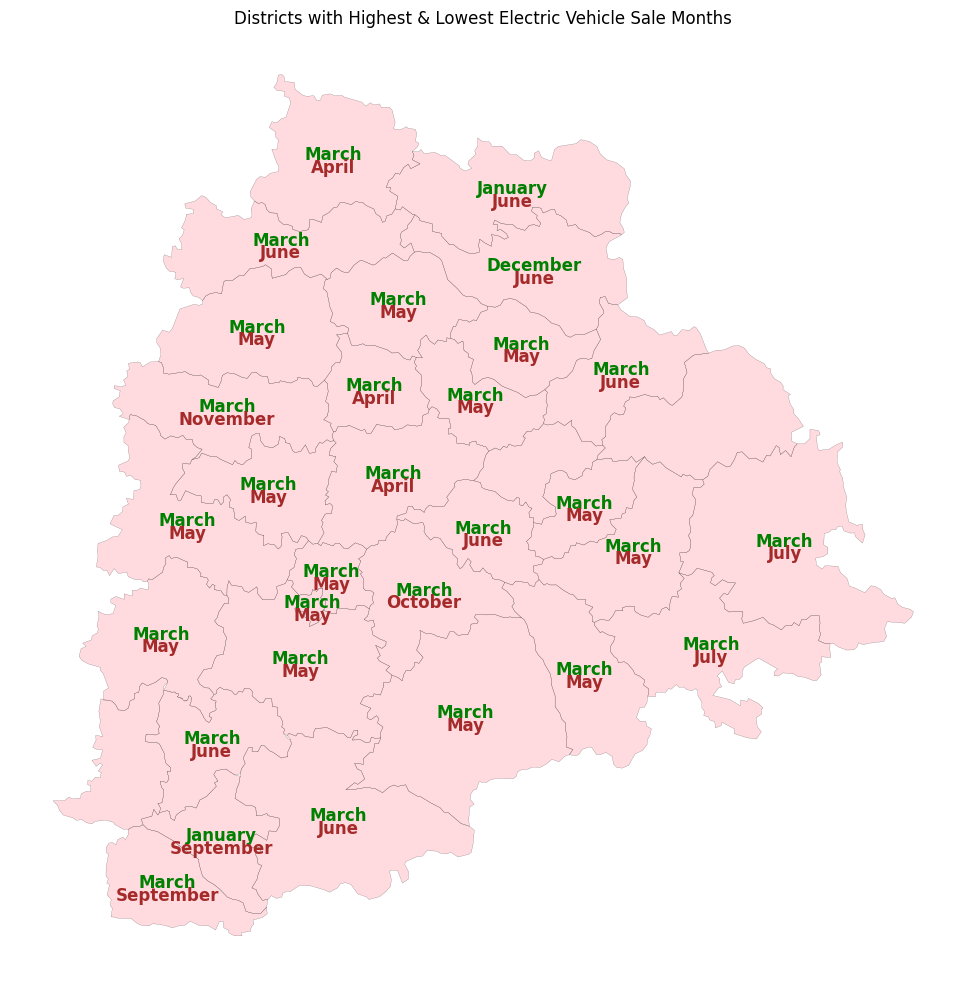

In [ ]:
districts_march_highest = ['Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagtial', 'Jangoan', 'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Kamareddy', 'Karimnagar', 'Khammam', 'Mahabubabad', 'Mahabubnagar', 'Medak', 'Medchal_Malkajgiri', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Rangareddy', 'Sangareddy', 'Siddipet', 'Suryapet', 'Vikarabad', 'Warangal', 'Yadadri Bhuvanagiri']
districts_january_highest = ['Kumurambheem Asifabad', 'Wanaparthy']
districts_december_highest = ['Mancherial']

districts_highest = districts_march_highest + districts_january_highest + districts_december_highest

districts_may_lowest = ['Hyderabad', 'Jagtial', 'Karimnagar', 'Mahabubabad', 'Medak', 'Medchal_Malkajgiri', 'Nalgonda', 'Nizamabad', 'Peddapalli', 'Rangareddy', 'Sangareddy', 'Suryapet', 'Vikarabad', 'Warangal']
districts_june_lowest = ['Jangoan', 'Jayashankar Bhupalpally', 'Kumurambheem Asifabad', 'Mahabubnagar', 'Mancherial', 'Nagarkurnool', 'Nirmal']
districts_april_lowest = ['Adilabad', 'Rajanna Sircilla', 'Siddipet']
districts_july_lowest = ['Bhadradri Kothagudem', 'Khammam']
districts_september_lowest = ['Jogulamba Gadwal', 'Wanaparthy']
districts_november_lowest = ['Kamareddy']
districts_october_lowest = ['Yadadri Bhuvanagiri']

districts_lowest = districts_may_lowest + districts_june_lowest + districts_april_lowest + districts_july_lowest + districts_september_lowest + districts_november_lowest + districts_october_lowest

districts_highest_month_data = pd.DataFrame({
    'district': districts_highest,
    'sale_month': (['March'] * len(districts_march_highest)) + (['January'] * len(districts_january_highest)) + (['December'] * len(districts_december_highest))
})

districts_lowest_month_data = pd.DataFrame({
    'district': districts_lowest,
    'sale_month': (['May'] * len(districts_may_lowest)) + (['June'] * len(districts_june_lowest)) + (['April'] * len(districts_april_lowest)) + (['July'] * len(districts_july_lowest)) + (['September'] * len(districts_september_lowest)) + (['November'] * len(districts_november_lowest)) + (['October'] * len(districts_october_lowest))
})

districts_with_highest_month = telangana_map.merge(districts_highest_month_data, how='left', left_on='district', right_on='district')
districts_with_lowest_month = telangana_map.merge(districts_lowest_month_data, how='left', left_on='district', right_on='district')

fig, ax = plt.subplots(figsize=(15, 10))
districts_with_highest_month.boundary.plot(ax=ax, color='black', linewidth=0.1)
districts_with_highest_month.plot(ax=ax, color='lightpink', edgecolor='none', alpha=0.5)

for idx, row in districts_with_highest_month.iterrows():
    if row['district'] in districts_highest:
        annotation = f"{row['sale_month']}"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.02, annotation, fontsize=12, weight='bold', ha='center', va='center', color='green')

for idx, row in districts_with_lowest_month.iterrows():
    if row['district'] in districts_lowest:
        annotation = f"{row['sale_month']}"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.04, annotation, fontsize=12, weight='bold', ha='center', va='center', color='brown')

plt.title("Districts with Highest & Lowest Electric Vehicle Sale Months")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
highest_month_electric = result_df_electric['Highest Month'].value_counts()
highest_month_electric

Mar    27
Jan     2
Dec     1
Name: Highest Month, dtype: int64

In [ ]:
districts_by_highest_month = {}
for row in result_df_electric.iterrows():
    district = row[1]['District']
    highest_month = row[1]['Highest Month']

    if highest_month not in districts_by_highest_month:
        districts_by_highest_month[highest_month] = [district]
    else:
        districts_by_highest_month[highest_month].append(district)
for month, districts in districts_by_highest_month.items():
    print(f"{month}: {districts}")

Mar: ['Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagtial', 'Jangoan', 'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Kamareddy', 'Karimnagar', 'Khammam', 'Mahabubabad', 'Mahabubnagar', 'Medak', 'Medchal_Malkajgiri', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Rangareddy', 'Sangareddy', 'Siddipet', 'Suryapet', 'Vikarabad', 'Warangal', 'Yadadri Bhuvanagiri']
Jan: ['Kumurambheem Asifabad', 'Wanaparthy']
Dec: ['Mancherial']


In [ ]:
lowest_month_electric = result_df_electric['Lowest Month'].value_counts()
lowest_month_electric

May    14
Jun     7
Apr     3
Jul     2
Sep     2
Nov     1
Oct     1
Name: Lowest Month, dtype: int64

In [ ]:
districts_by_lowest_month = {}
for row in result_df_electric.iterrows():
    district = row[1]['District']
    lowest_month = row[1]['Lowest Month']

    if lowest_month not in districts_by_lowest_month:
        districts_by_lowest_month[lowest_month] = [district]
    else:
        districts_by_lowest_month[lowest_month].append(district)
for month, districts in districts_by_lowest_month.items():
    print(f"{month}: {districts}")

Apr: ['Adilabad', 'Rajanna Sircilla', 'Siddipet']
Jul: ['Bhadradri Kothagudem', 'Khammam']
May: ['Hyderabad', 'Jagtial', 'Karimnagar', 'Mahabubabad', 'Medak', 'Medchal_Malkajgiri', 'Nalgonda', 'Nizamabad', 'Peddapalli', 'Rangareddy', 'Sangareddy', 'Suryapet', 'Vikarabad', 'Warangal']
Jun: ['Jangoan', 'Jayashankar Bhupalpally', 'Kumurambheem Asifabad', 'Mahabubnagar', 'Mancherial', 'Nagarkurnool', 'Nirmal']
Sep: ['Jogulamba Gadwal', 'Wanaparthy']
Nov: ['Kamareddy']
Oct: ['Yadadri Bhuvanagiri']


####*Others*

In [ ]:
fuel_type = 'fuel_type_others'
result_data = []

for district in pivot_table['district'].unique():
    district_data = pivot_table[pivot_table['district'] == district]

    max_month = district_data.loc[district_data[fuel_type].idxmax(), 'Mmm']
    max_value = district_data[fuel_type].max()
    min_month = district_data.loc[district_data[fuel_type].idxmin(), 'Mmm']
    min_value = district_data[fuel_type].min()

    result_data.append({
        'District': district,
        'Fuel Type': fuel_type.split('_')[-1].capitalize(),
        'Highest Month': max_month,
        'Highest Sales': max_value,
        'Lowest Month': min_month,
        'Lowest Sales': min_value
    })

result_df_others = pd.DataFrame(result_data)
result_df_others

District Fuel Type Highest Month  Highest Sales  \
0                  Adilabad    Others           Sep             25   
1      Bhadradri Kothagudem    Others           Mar            203   
2                 Hyderabad    Others           Mar           5981   
3                   Jagtial    Others           Sep             36   
4                   Jangoan    Others           Jan             89   
5   Jayashankar Bhupalpally    Others           Mar             33   
6          Jogulamba Gadwal    Others           Mar             17   
7                 Kamareddy    Others           Sep             52   
8                Karimnagar    Others           Aug            196   
9                   Khammam    Others           Sep            525   
10    Kumurambheem Asifabad    Others           Sep             10   
11              Mahabubabad    Others           Sep            107   
12             Mahabubnagar    Others           Mar            221   
13               Mancherial    Others           Nov             29   
14                    Medak    Others           Mar            193   
15       Medchal_Malkajgiri    Others           Dec            727   
16             Nagarkurnool    Others           Mar             55   
17                 Nalgonda    Others           Jan            584   
18                   Nirmal    Others           Sep             75   
19                Nizamabad    Others           Sep            140   
20               Peddapalli    Others           Mar             44   
21         Rajanna Sircilla    Others           Oct             20   
22               Rangareddy    Others           Sep           1116   
23               Sangareddy    Others           Mar           1271   
24                 Siddipet    Others           Mar            211   
25                 Suryapet    Others           Mar            160   
26                Vikarabad    Others           Mar            389   
27               Wanaparthy    Others           Mar             75   
28                 Warangal    Others           Sep            231   
29      Yadadri Bhuvanagiri    Others           Dec            702   

   Lowest Month  Lowest Sales  
0           Apr             4  
1           Jul             6  
2           Jan          2464  
3           Jul            10  
4           May            10  
5           Apr             2  
6           May             0  
7           Jun            15  
8           Apr            41  
9           Dec           211  
10          Aug             0  
11          Apr             8  
12          Apr            10  
13          Jan            15  
14          May            53  
15          May           432  
16          Apr             4  
17          May            36  
18          May            12  
19          May            40  
20          May             4  
21          Jul             2  
22          May           282  
23          May           202  
24          May            56  
25          May            38  
26          Apr            25  
27          Jun             3  
28          Jun            82  
29          Jun            62

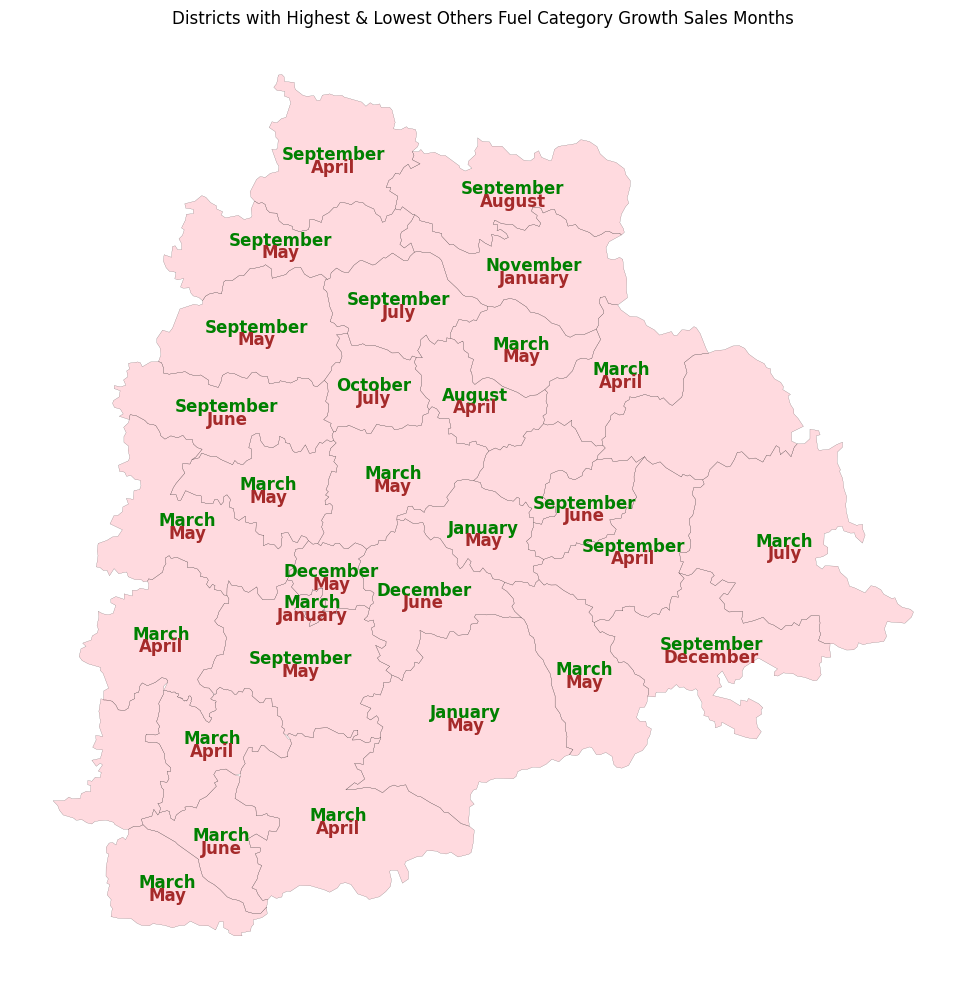

In [ ]:
districts_march_highest = ['Bhadradri Kothagudem', 'Hyderabad', 'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Mahabubnagar', 'Medak', 'Nagarkurnool', 'Peddapalli', 'Sangareddy', 'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy']
districts_september_highest = ['Adilabad', 'Jagtial', 'Kamareddy', 'Khammam', 'Kumurambheem Asifabad', 'Mahabubabad', 'Nirmal', 'Nizamabad', 'Rangareddy', 'Warangal']
districts_january_highest = ['Jangoan', 'Nalgonda']
districts_december_highest = ['Medchal_Malkajgiri', 'Yadadri Bhuvanagiri']
districts_august_highest = ['Karimnagar']
districts_november_highest = ['Mancherial']
districts_october_highest = ['Rajanna Sircilla']

districts_highest = districts_march_highest + districts_september_highest + districts_january_highest + districts_december_highest + districts_august_highest + districts_november_highest + districts_october_highest

districts_may_lowest = ['Jangoan', 'Jogulamba Gadwal', 'Medak', 'Medchal_Malkajgiri', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rangareddy', 'Sangareddy', 'Siddipet', 'Suryapet']
districts_april_lowest = ['Adilabad', 'Jayashankar Bhupalpally', 'Karimnagar', 'Mahabubabad', 'Mahabubnagar', 'Nagarkurnool', 'Vikarabad']
districts_june_lowest = ['Kamareddy', 'Wanaparthy', 'Warangal', 'Yadadri Bhuvanagiri']
districts_july_lowest = ['Bhadradri Kothagudem', 'Jagtial', 'Rajanna Sircilla']
districts_january_lowest = ['Hyderabad', 'Mancherial']
districts_december_lowest = ['Khammam']
districts_august_lowest = ['Kumurambheem Asifabad']

districts_lowest = districts_may_lowest + districts_april_lowest + districts_june_lowest + districts_july_lowest + districts_january_lowest + districts_december_lowest + districts_august_lowest

districts_highest_month_data = pd.DataFrame({
    'district': districts_highest,
    'sale_month': (['March'] * len(districts_march_highest)) + (['September'] * len(districts_september_highest)) + (['January'] * len(districts_january_highest)) + (['December'] * len(districts_december_highest)) + (['August'] * len(districts_august_highest)) + (['November'] * len(districts_november_highest)) + (['October'] * len(districts_october_highest))
})

districts_lowest_month_data = pd.DataFrame({
    'district': districts_lowest,
    'sale_month': (['May'] * len(districts_may_lowest)) + (['April'] * len(districts_april_lowest)) + (['June'] * len(districts_june_lowest)) + (['July'] * len(districts_july_lowest)) + (['January'] * len(districts_january_lowest)) + (['December'] * len(districts_december_lowest)) + (['August'] * len(districts_august_lowest))
})

districts_with_highest_month = telangana_map.merge(districts_highest_month_data, how='left', left_on='district', right_on='district')
districts_with_lowest_month = telangana_map.merge(districts_lowest_month_data, how='left', left_on='district', right_on='district')

fig, ax = plt.subplots(figsize=(15, 10))
districts_with_highest_month.boundary.plot(ax=ax, color='black', linewidth=0.1)
districts_with_highest_month.plot(ax=ax, color='lightpink', edgecolor='none', alpha=0.5)

for idx, row in districts_with_highest_month.iterrows():
    if row['district'] in districts_highest:
        annotation = f"{row['sale_month']}"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.02, annotation, fontsize=12, weight='bold', ha='center', va='center', color='green')

for idx, row in districts_with_lowest_month.iterrows():
    if row['district'] in districts_lowest:
        annotation = f"{row['sale_month']}"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.04, annotation, fontsize=12, weight='bold', ha='center', va='center', color='brown')

plt.title("Districts with Highest & Lowest Others Fuel Category Growth Sales Months")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
highest_month_others = result_df_others['Highest Month'].value_counts()
highest_month_others

Mar    13
Sep    10
Jan     2
Dec     2
Aug     1
Nov     1
Oct     1
Name: Highest Month, dtype: int64

In [ ]:
districts_by_highest_month = {}
for row in result_df_others.iterrows():
    district = row[1]['District']
    highest_month = row[1]['Highest Month']

    if highest_month not in districts_by_highest_month:
        districts_by_highest_month[highest_month] = [district]
    else:
        districts_by_highest_month[highest_month].append(district)
for month, districts in districts_by_highest_month.items():
    print(f"{month}: {districts}")

Sep: ['Adilabad', 'Jagtial', 'Kamareddy', 'Khammam', 'Kumurambheem Asifabad', 'Mahabubabad', 'Nirmal', 'Nizamabad', 'Rangareddy', 'Warangal']
Mar: ['Bhadradri Kothagudem', 'Hyderabad', 'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Mahabubnagar', 'Medak', 'Nagarkurnool', 'Peddapalli', 'Sangareddy', 'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy']
Jan: ['Jangoan', 'Nalgonda']
Aug: ['Karimnagar']
Nov: ['Mancherial']
Dec: ['Medchal_Malkajgiri', 'Yadadri Bhuvanagiri']
Oct: ['Rajanna Sircilla']


In [ ]:
lowest_month_others = result_df_others['Lowest Month'].value_counts()
lowest_month_others

May    12
Apr     7
Jun     4
Jul     3
Jan     2
Dec     1
Aug     1
Name: Lowest Month, dtype: int64

In [ ]:
districts_by_lowest_month = {}
for row in result_df_others.iterrows():
    district = row[1]['District']
    lowest_month = row[1]['Lowest Month']

    if lowest_month not in districts_by_lowest_month:
        districts_by_lowest_month[lowest_month] = [district]
    else:
        districts_by_lowest_month[lowest_month].append(district)
for month, districts in districts_by_lowest_month.items():
    print(f"{month}: {districts}")

Apr: ['Adilabad', 'Jayashankar Bhupalpally', 'Karimnagar', 'Mahabubabad', 'Mahabubnagar', 'Nagarkurnool', 'Vikarabad']
Jul: ['Bhadradri Kothagudem', 'Jagtial', 'Rajanna Sircilla']
Jan: ['Hyderabad', 'Mancherial']
May: ['Jangoan', 'Jogulamba Gadwal', 'Medak', 'Medchal_Malkajgiri', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rangareddy', 'Sangareddy', 'Siddipet', 'Suryapet']
Jun: ['Kamareddy', 'Wanaparthy', 'Warangal', 'Yadadri Bhuvanagiri']
Dec: ['Khammam']
Aug: ['Kumurambheem Asifabad']


<ipython-input-57-d98c88173cbf>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_sales.index, rotation=45)


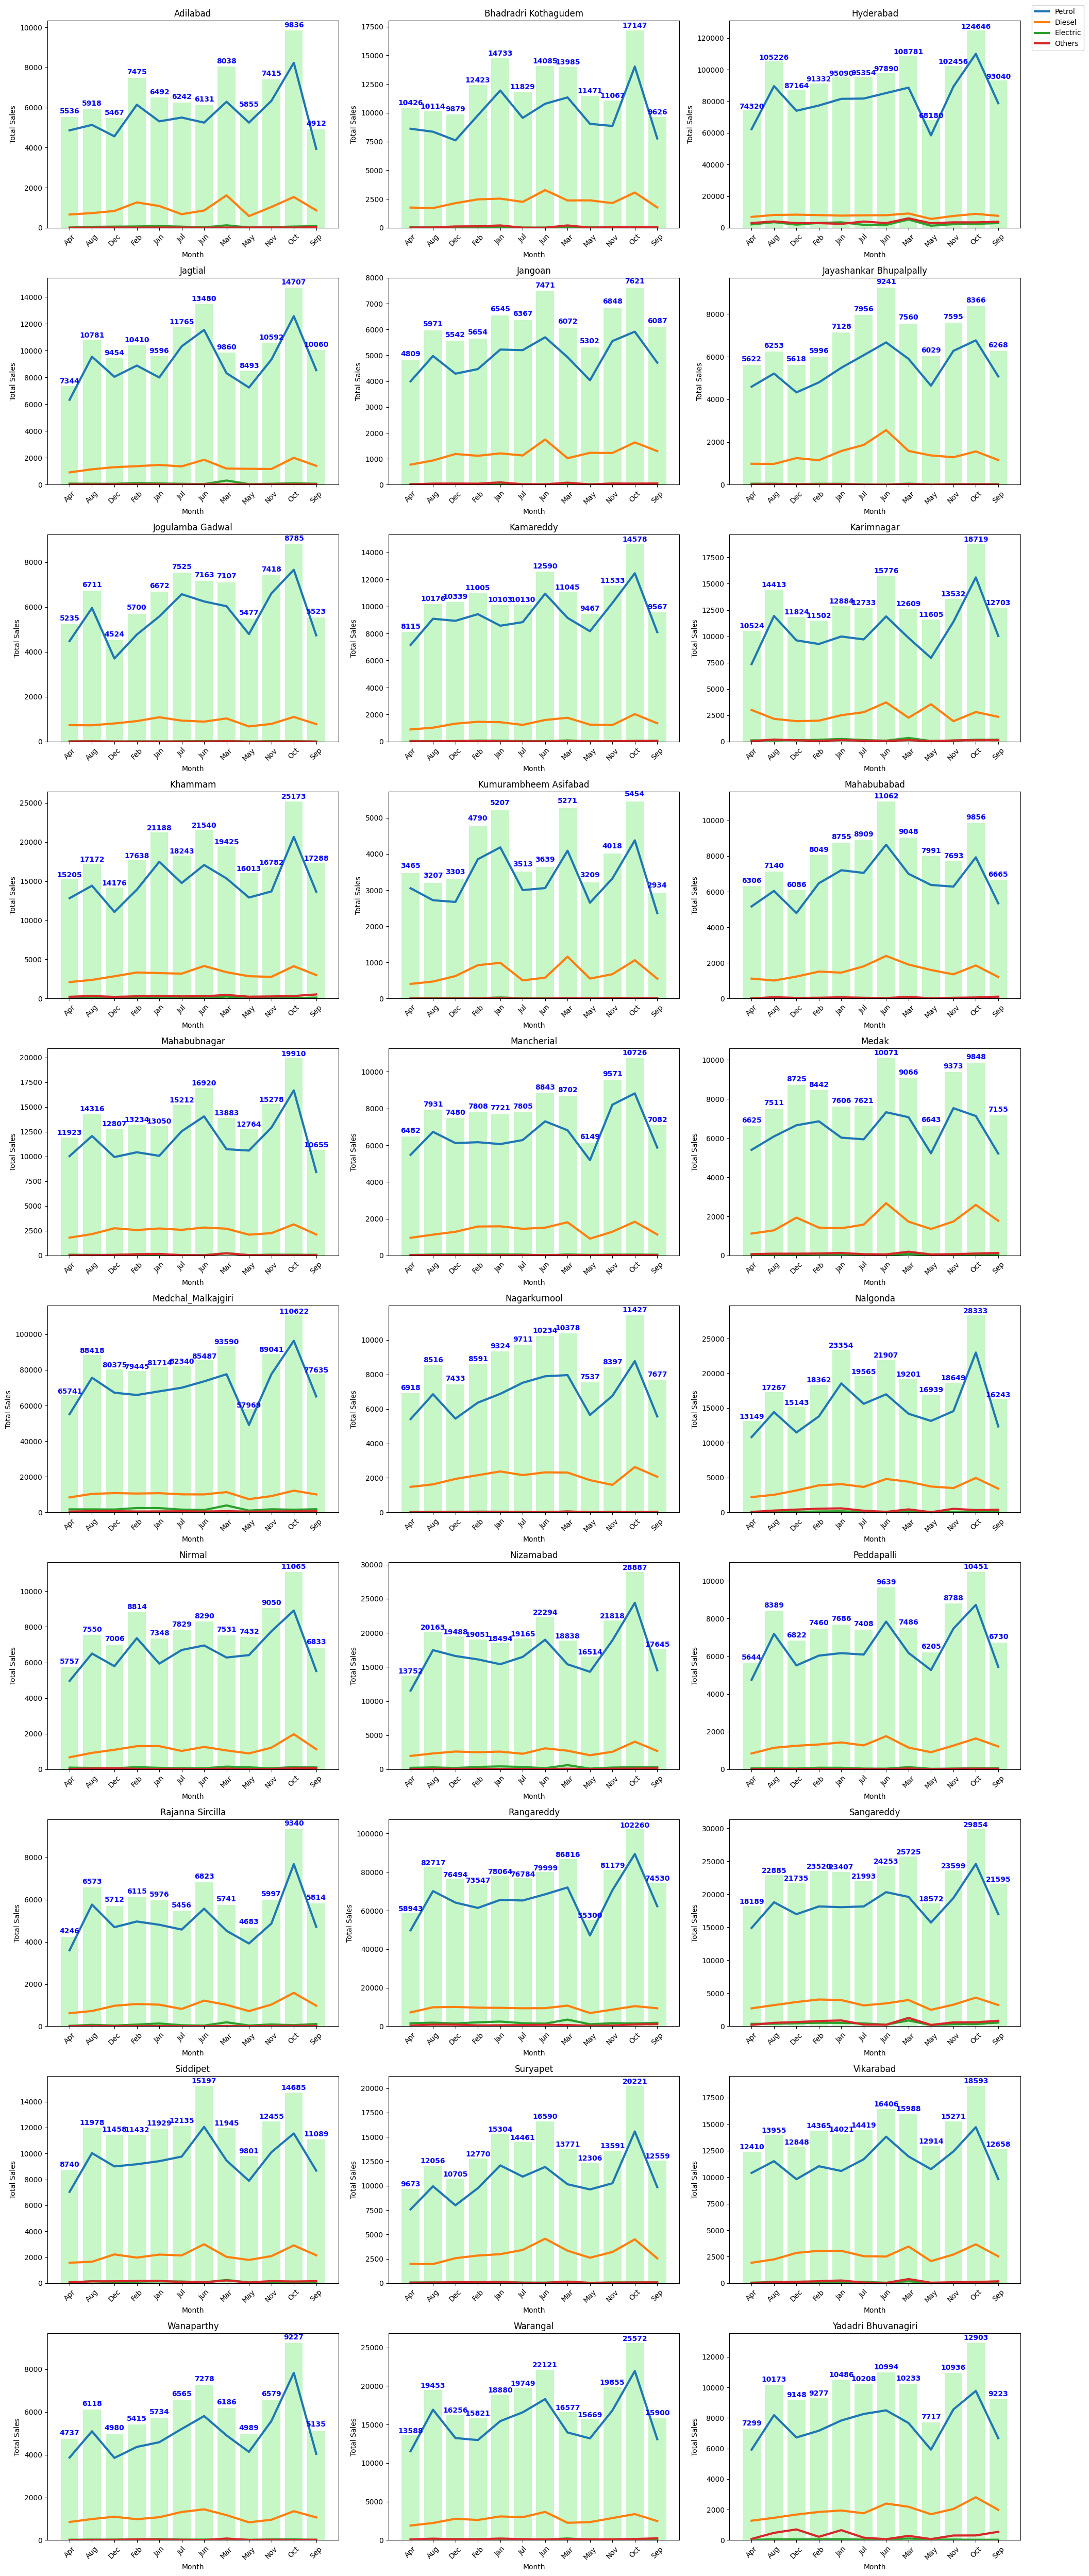

In [ ]:
fuel_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']
district_sales = transportdata.groupby(['district', 'Mmm'])[fuel_types].sum()
unique_districts = district_sales.index.get_level_values('district').unique()
num_districts = len(unique_districts)
num_cols = 3
num_rows = (num_districts + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
handles, labels = None, None
for i, district in enumerate(unique_districts):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    district_data = district_sales.loc[district]
    for fuel_type in fuel_types:
        line = ax.plot(district_data.index, district_data[fuel_type], label=fuel_type.split('_')[-1].capitalize(), linewidth=3)
    total_sales = district_data.sum(axis=1)  # Calculate total sales
    avg_sales = district_data.mean(axis=1)
    ax.bar(avg_sales.index, total_sales.values, color='lightgreen', alpha=0.5)  # Use total_sales instead of avg_sales
    ax.set_title(f'{district}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales')
    ax.set_xticklabels(avg_sales.index, rotation=45)
    for j, val in enumerate(total_sales):
        ax.text(j, val + 100, str(val), ha='center', va='bottom', color='blue', fontweight='bold')  # Add total sales value above the bar
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


####*6. How does the distribution of vehicles vary by vehicle class (MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different districts? Are there any districts with a predominant preference for a specific vehicle class? Consider FY 2022 for analysis.*

In [ ]:
df_2022 = transportdata[transportdata['fiscal_year'] == 2022]
vehicle_class_columns = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture']
grouped_data = df_2022.groupby('district')[vehicle_class_columns].sum()
grouped_data.reset_index(inplace = True)
grouped_data

district  vehicleClass_MotorCycle  vehicleClass_MotorCar  \
0                  Adilabad                    10410                   1416   
1      Bhadradri Kothagudem                    17022                   3157   
2                 Hyderabad                   206819                  51447   
3                   Jagtial                    13639                   2055   
4                   Jangoan                     8617                   1177   
5   Jayashankar Bhupalpally                     9225                   1343   
6          Jogulamba Gadwal                    10300                    899   
7                 Kamareddy                    15184                   2153   
8                Karimnagar                    19411                   4818   
9                   Khammam                    27385                   5880   
10    Kumurambheem Asifabad                     6433                    479   
11              Mahabubabad                    11046                   1155   
12             Mahabubnagar                    17977                   3300   
13               Mancherial                    11603                   2218   
14                    Medak                    11663                   2347   
15       Medchal_Malkajgiri                   164626                  61071   
16             Nagarkurnool                    12229                   2066   
17                 Nalgonda                    27942                   4927   
18                   Nirmal                    10984                   1581   
19                Nizamabad                    28105                   5824   
20               Peddapalli                    10818                   2205   
21         Rajanna Sircilla                     8007                   1376   
22               Rangareddy                   154186                  71832   
23               Sangareddy                    40784                  14565   
24                 Siddipet                    17401                   3254   
25                 Suryapet                    19165                   3038   
26                Vikarabad                    23116                   5211   
27               Wanaparthy                     8771                   1194   
28                 Warangal                    17770                   2937   
29      Yadadri Bhuvanagiri                    14471                   3216   

    vehicleClass_AutoRickshaw  vehicleClass_Agriculture  
0                         368                       467  
1                        1388                      2013  
2                        8397                        20  
3                         272                       858  
4                         397                      1225  
5                         218                      1928  
6                         116                       868  
7                         379                       748  
8                        1042                       999  
9                        2690                      2121  
10                        286                       160  
11                        680                       906  
12                       1130                       937  
13                        550                       400  
14                        610                      1579  
15                         83                       261  
16                        366                      1556  
17                        964                      2599  
18                        295                       989  
19                       1011                      1181  
20                        382                       705  
21                        148                       675  
22                         69                       449  
23                       3381                      1570  
24                        524                      2437  
25                        739                      2188  
26 

In [ ]:
transportdata.vehicleClass_MotorCycle.sum()

4809987

In [ ]:
transportdata.vehicleClass_MotorCar.sum()

1036430

In [ ]:
transportdata.vehicleClass_AutoRickshaw.sum()

135145

In [ ]:
transportdata.vehicleClass_Agriculture.sum()

195714

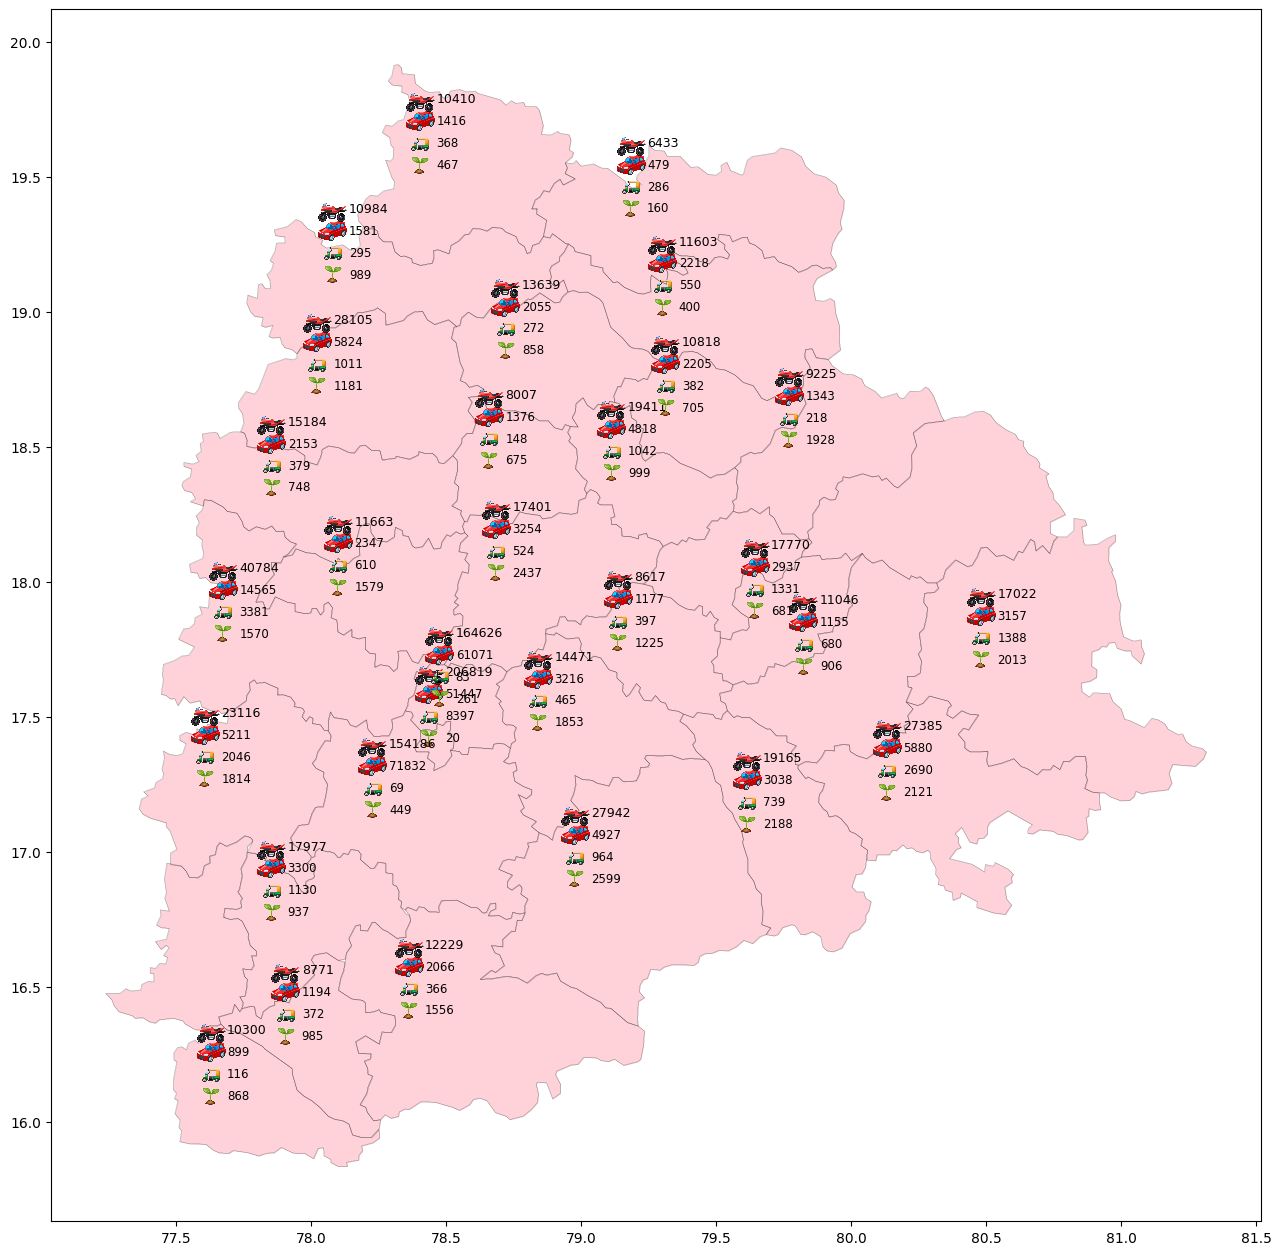

In [ ]:
districts_with_counts = telangana_map.merge(grouped_data, on='district', how='left')
plt.figure(figsize=(20, 14))
ax = plt.gca()

for idx, row in districts_with_counts.iterrows():
    gpd.GeoSeries([row['geometry']]).boundary.plot(ax=ax, color='black', linewidth=0.1)
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color='pink', edgecolor='black', linewidth=0.1, alpha=0.7)
    district_width = row['geometry'].bounds[2] - row['geometry'].bounds[0]
    image_info = [
        ('agro', row['vehicleClass_Agriculture'], '/content/agro.png', 0.08, 8.5),
        ('auto', row['vehicleClass_AutoRickshaw'], '/content/auto.png', 0.08, 8.5),
        ('car', row['vehicleClass_MotorCar'], '/content/car.png', 0.08, 8.5),
        ('bike', row['vehicleClass_MotorCycle'], '/content/bike.png', 0.04, 9)
    ]
    y_offset = -0.025
    x_offset = -district_width * 0.2
    for image_name, count, image_path, zoom, font_size in image_info:
        if pd.notna(count):
            image = plt.imread(image_path)
            ab = AnnotationBbox(OffsetImage(image, zoom=zoom), (row['geometry'].centroid.x + x_offset, row['geometry'].centroid.y - y_offset), frameon=False)
            ax.add_artist(ab)
            plt.text(row['geometry'].centroid.x + x_offset + 0.06, row['geometry'].centroid.y - y_offset, f"{count:.0f}", ha='left', va='center', fontsize=font_size, color='black')
            y_offset -= (zoom + 0.001)

ax.set_aspect('equal')
plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()


####*7. List down the top 3 and bottom 3 districts that have shown the highest and lowest vehicle sales growth during FY 2022 compared to FY 2021? (Consider and compare categories: Petrol, Diesel and Electric)*

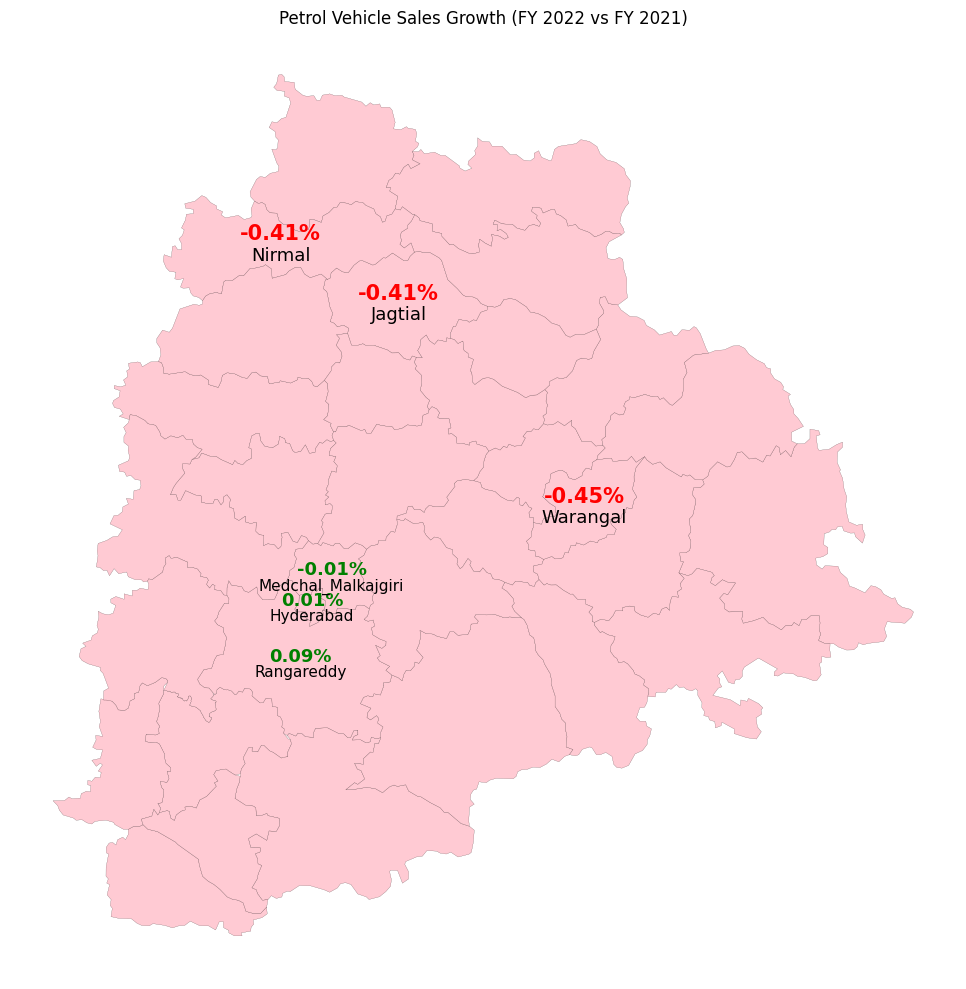

In [ ]:
filtered_data = transportdata[(transportdata['fiscal_year'] == 2021) | (transportdata['fiscal_year'] == 2022)]
pivot_petrol = filtered_data.pivot_table(index='district', columns='fiscal_year', values='fuel_type_petrol', aggfunc='sum', fill_value=0, dropna=False)
growth_petrol = (pivot_petrol[2022] - pivot_petrol[2021]) / pivot_petrol[2021]
growth_data = pd.DataFrame({
    'district': pivot_petrol.index,
    'Petrol_Growth': growth_petrol
})

top_3_growth = growth_data.nlargest(3, columns='Petrol_Growth')
top_3_growth.reset_index(drop=True, inplace=True)

bottom_3_growth = growth_data.nsmallest(3, columns='Petrol_Growth')
bottom_3_growth.reset_index(drop=True, inplace=True)

districts_with_top_growth = telangana_map.merge(top_3_growth, how='left', on='district')
districts_with_bottom_growth = telangana_map.merge(bottom_3_growth, how='left', on='district')

fig, ax = plt.subplots(figsize=(15, 10))

districts_with_top_growth.plot(ax=ax, color='pink', edgecolor='black', linewidth=0.1, alpha=0.6)
for idx, row in districts_with_top_growth.iterrows():
    if not pd.isna(row['Petrol_Growth']):
        growth_percentage = f"{row['Petrol_Growth']:.2f}%"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.03, growth_percentage, fontsize=13, weight='bold', ha='center', va='center', color='green')
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.01, row['district'], fontsize=11, ha='center', va='top', color='black')

districts_with_bottom_growth.plot(ax=ax, color='pink', edgecolor='black', linewidth=0.1, alpha=0.6)
for idx, row in districts_with_bottom_growth.iterrows():
    if not pd.isna(row['Petrol_Growth']):
        growth_percentage = f"{row['Petrol_Growth']:.2f}%"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.05, growth_percentage, fontsize=15, weight='bold', ha='center', va='center', color='red')
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.05, row['district'], fontsize=13, ha='center', va='center', color='black')


plt.title("Petrol Vehicle Sales Growth (FY 2022 vs FY 2021)")
plt.axis('off')
plt.tight_layout()
plt.show()

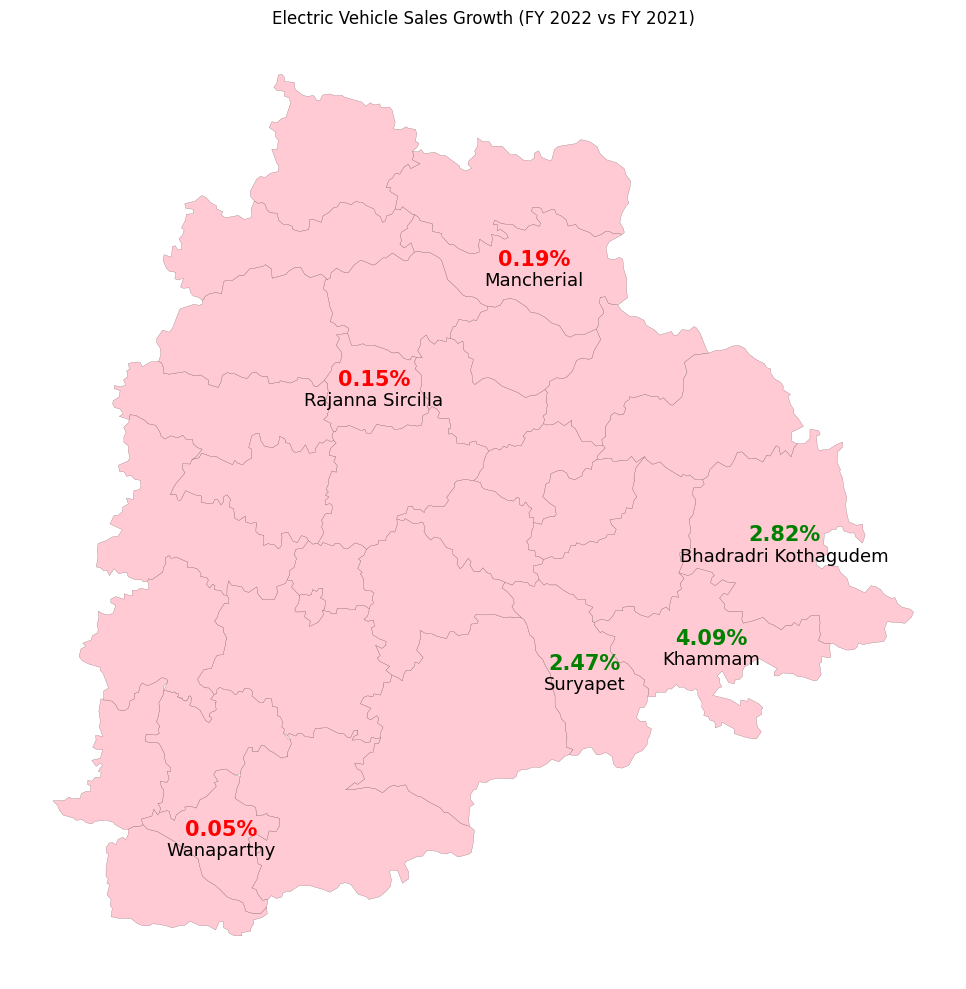

In [ ]:
filtered_data = transportdata[(transportdata['fiscal_year'] == 2021) | (transportdata['fiscal_year'] == 2022)]
pivot_electric = filtered_data.pivot_table(index='district', columns='fiscal_year', values='fuel_type_electric', aggfunc='sum', fill_value=0, dropna=False)
growth_electric = (pivot_electric[2022] - pivot_electric[2021]) / pivot_electric[2021]
growth_data = pd.DataFrame({
    'district': pivot_electric.index,
    'Electric_Growth': growth_electric
})

top_3_growth = growth_data.nlargest(3, columns='Electric_Growth')
top_3_growth.reset_index(drop=True, inplace=True)

bottom_3_growth = growth_data.nsmallest(3, columns='Electric_Growth')
bottom_3_growth.reset_index(drop=True, inplace=True)

districts_with_top_growth = telangana_map.merge(top_3_growth, how='left', on='district')
districts_with_bottom_growth = telangana_map.merge(bottom_3_growth, how='left', on='district')

fig, ax = plt.subplots(figsize=(15, 10))

districts_with_top_growth.plot(ax=ax, color='pink', edgecolor='black', linewidth=0.1, alpha=0.6)
for idx, row in districts_with_top_growth.iterrows():
    if not pd.isna(row['Electric_Growth']):
        growth_percentage = f"{row['Electric_Growth']:.2f}%"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.05, growth_percentage, fontsize=15, weight='bold', ha='center', va='center', color='green')
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.05, row['district'], fontsize=13, ha='center', va='center', color='black')

districts_with_bottom_growth.plot(ax=ax, color='pink', edgecolor='black', linewidth=0.1, alpha=0.6)
for idx, row in districts_with_bottom_growth.iterrows():
    if not pd.isna(row['Electric_Growth']):
        growth_percentage = f"{row['Electric_Growth']:.2f}%"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.05, growth_percentage, fontsize=15, weight='bold', ha='center', va='center', color='red')
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.05, row['district'], fontsize=13, ha='center', va='center', color='black')

plt.title("Electric Vehicle Sales Growth (FY 2022 vs FY 2021)")
plt.axis('off')
plt.tight_layout()
plt.show()

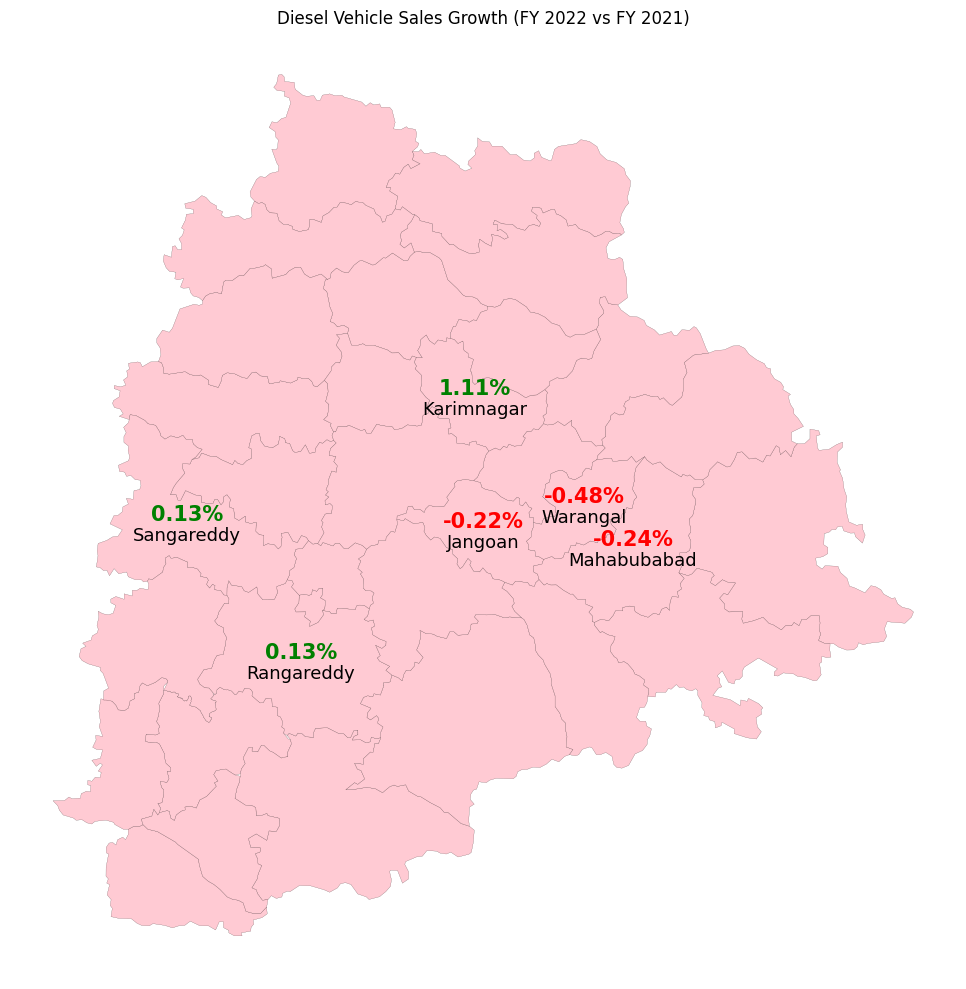

In [ ]:
filtered_data = transportdata[(transportdata['fiscal_year'] == 2021) | (transportdata['fiscal_year'] == 2022)]
pivot_diesel = filtered_data.pivot_table(index='district', columns='fiscal_year', values='fuel_type_diesel', aggfunc='sum', fill_value=0, dropna=False)
growth_diesel = (pivot_diesel[2022] - pivot_diesel[2021]) / pivot_diesel[2021]
growth_data = pd.DataFrame({
    'district': pivot_diesel.index,
    'Diesel_Growth': growth_diesel
})

top_3_growth = growth_data.nlargest(3, columns='Diesel_Growth')
top_3_growth.reset_index(drop=True, inplace=True)

bottom_3_growth = growth_data.nsmallest(3, columns='Diesel_Growth')
bottom_3_growth.reset_index(drop=True, inplace=True)

districts_with_top_growth = telangana_map.merge(top_3_growth, how='left', on='district')
districts_with_bottom_growth = telangana_map.merge(bottom_3_growth, how='left', on='district')

fig, ax = plt.subplots(figsize=(15, 10))

districts_with_top_growth.plot(ax=ax, color='pink', edgecolor='black', linewidth=0.1, alpha=0.6)
for idx, row in districts_with_top_growth.iterrows():
    if not pd.isna(row['Diesel_Growth']):
        growth_percentage = f"{row['Diesel_Growth']:.2f}%"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.05, growth_percentage, fontsize=15, weight='bold', ha='center', va='center', color='green')
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.05, row['district'], fontsize=13, ha='center', va='center', color='black')

districts_with_bottom_growth.plot(ax=ax, color='pink', edgecolor='black', linewidth=0.1, alpha=0.6)
for idx, row in districts_with_bottom_growth.iterrows():
    if not pd.isna(row['Diesel_Growth']):
        growth_percentage = f"{row['Diesel_Growth']:.2f}%"
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.05, growth_percentage, fontsize=15, weight='bold', ha='center', va='center', color='red')
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.05, row['district'], fontsize=13, ha='center', va='center', color='black')

plt.title("Diesel Vehicle Sales Growth (FY 2022 vs FY 2021)")
plt.axis('off')
plt.tight_layout()
plt.show()

## ***TS-Ipass (Telangana State Industrial Project Approval and Self Certification System)***


#### *8. List down the top 5 sectors that have witnessed the most significant investments in FY 2022*

In [ ]:
fy_2022_data = ipassdata[ipassdata['fiscal_year'] == 2022]
sector_investment_fy_2022 = fy_2022_data.groupby('sector')['investment in cr'].sum()
top_5_sectors = sector_investment_fy_2022.nlargest(5)

print("Top 5 sectors with the most significant investments in FY 2022:")
print(top_5_sectors)

Top 5 sectors with the most significant investments in FY 2022:
sector
Plastic and Rubber                               5855.4
Pharmaceuticals and Chemicals                    2181.3
Real Estate,Industrial Parks and IT Buildings    2127.3
Solar and Other Renewable Energy                 2053.0
Engineering                                      1877.3
Name: investment in cr, dtype: float64


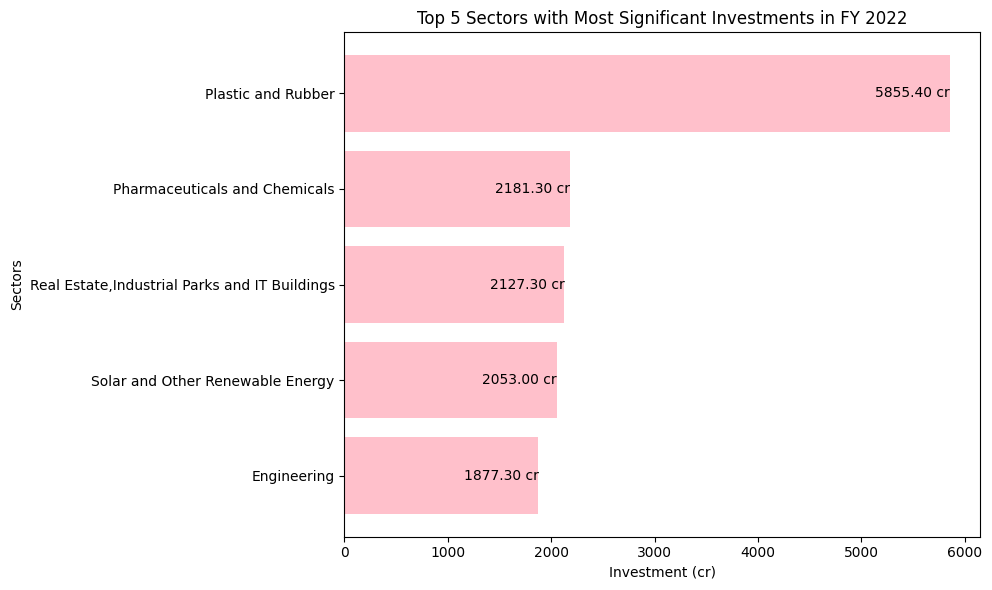

In [ ]:
top_sectors = [
    'Plastic and Rubber',
    'Pharmaceuticals and Chemicals',
    'Real Estate,Industrial Parks and IT Buildings',
    'Solar and Other Renewable Energy',
    'Engineering'
]

sector_investment_fy_2022 = fy_2022_data[fy_2022_data['sector'].isin(top_sectors)]
sector_investment_fy_2022 = sector_investment_fy_2022.groupby('sector')['investment in cr'].sum().sort_values(ascending=True) # Sort from largest to smallest

plt.figure(figsize=(10, 6))
bars = plt.barh(sector_investment_fy_2022.index, sector_investment_fy_2022.values, color='pink')

for bar in bars:
    plt.text(bar.get_width() - 0.2, bar.get_y() + bar.get_height() / 2, f"{bar.get_width():.2f} cr", va='center', ha='right', color='black')

plt.title("Top 5 Sectors with Most Significant Investments in FY 2022")
plt.xlabel("Investment (cr)")
plt.ylabel("Sectors")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


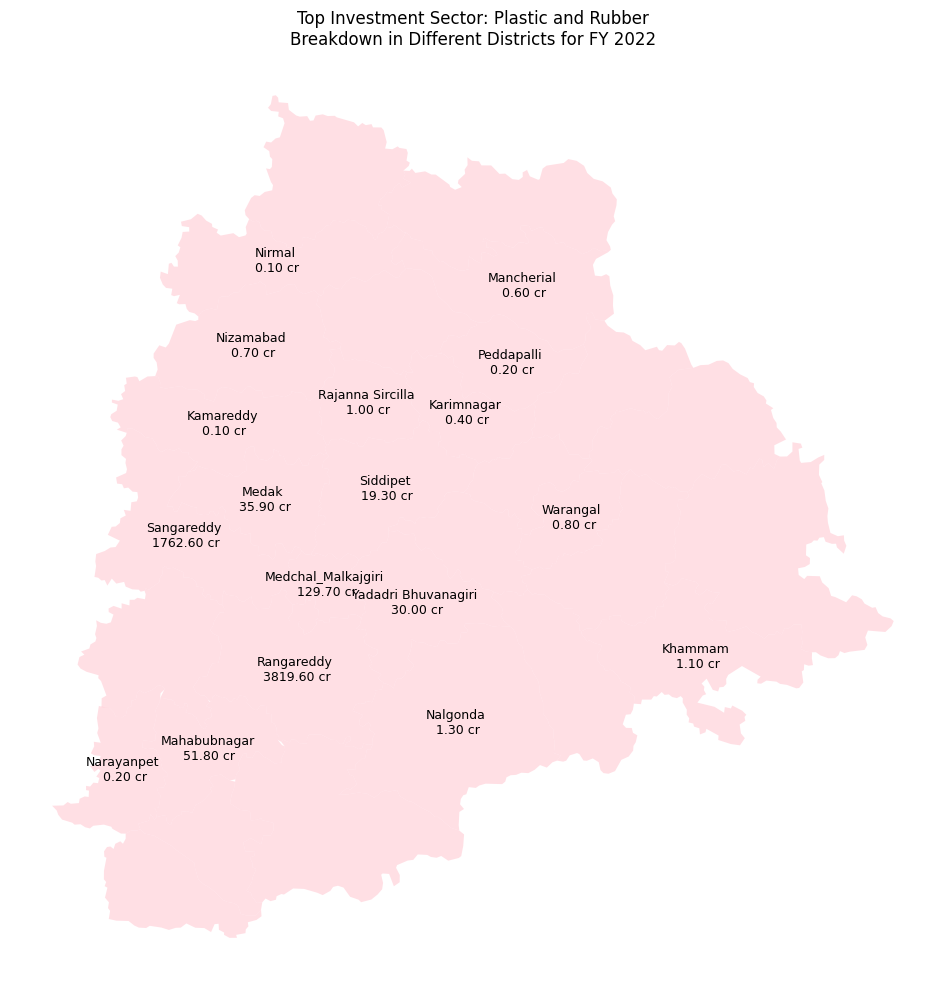

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


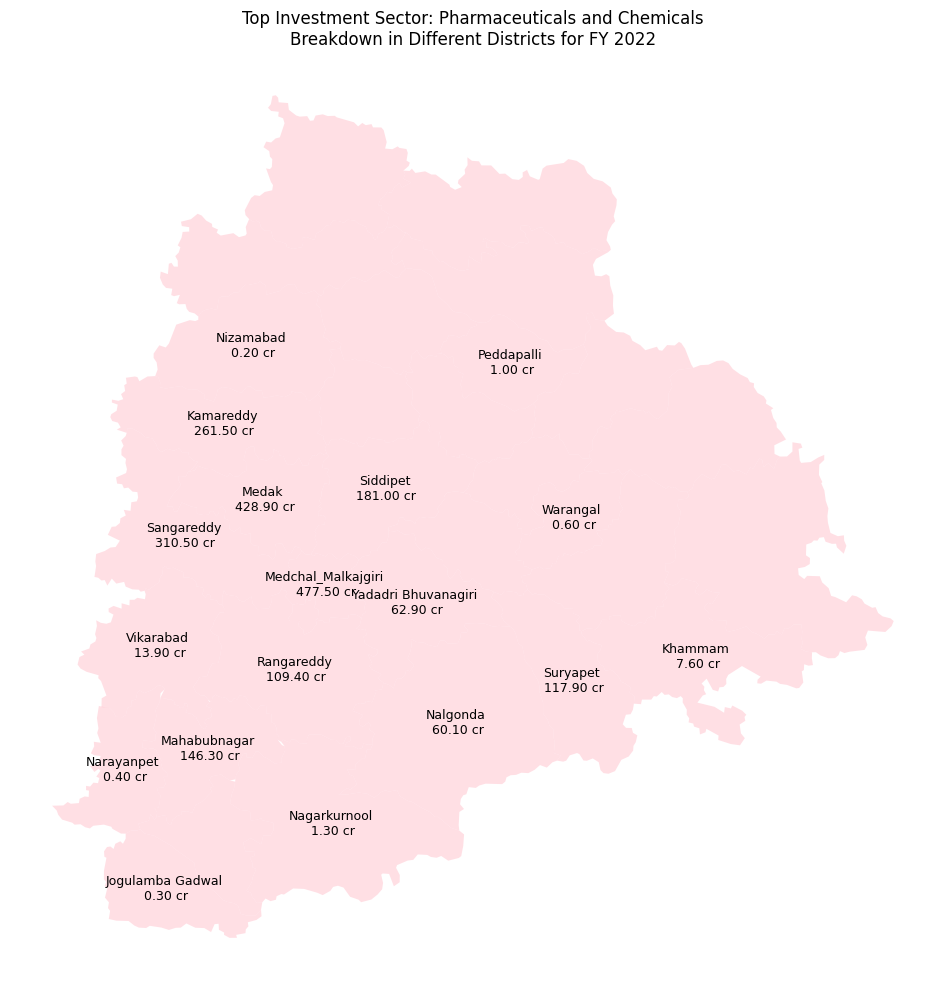

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


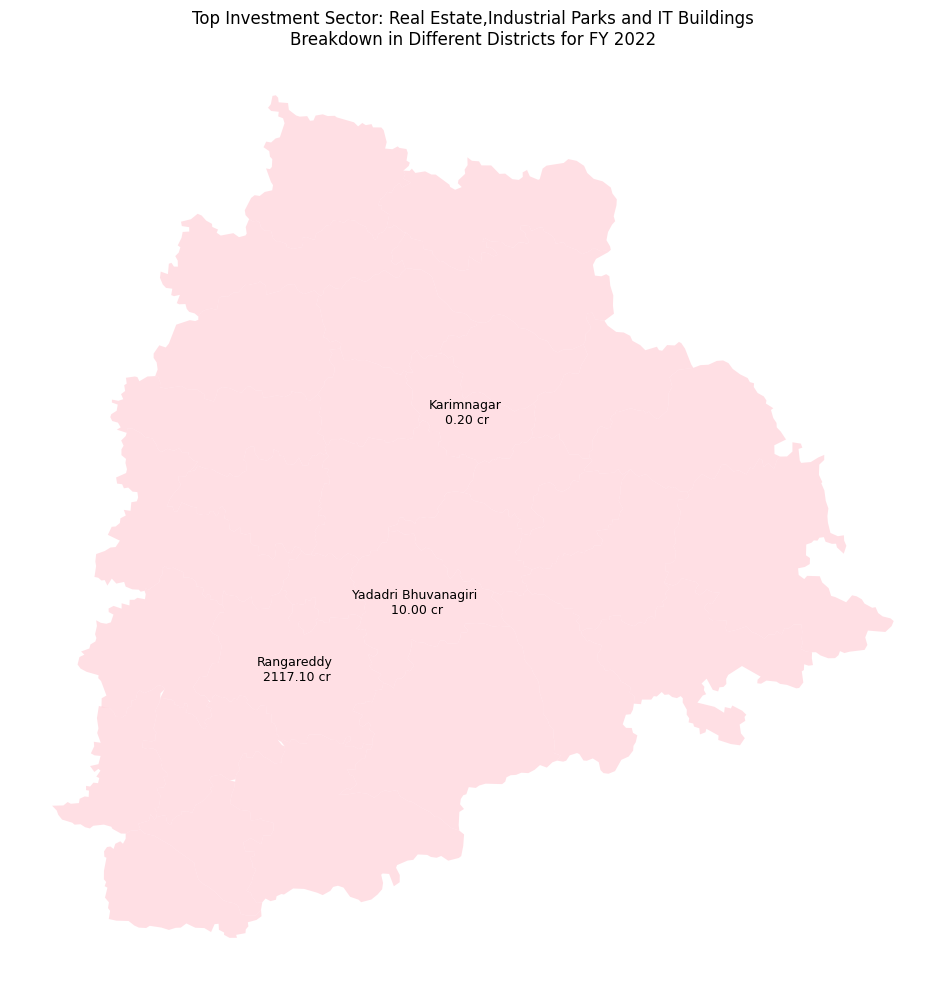

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


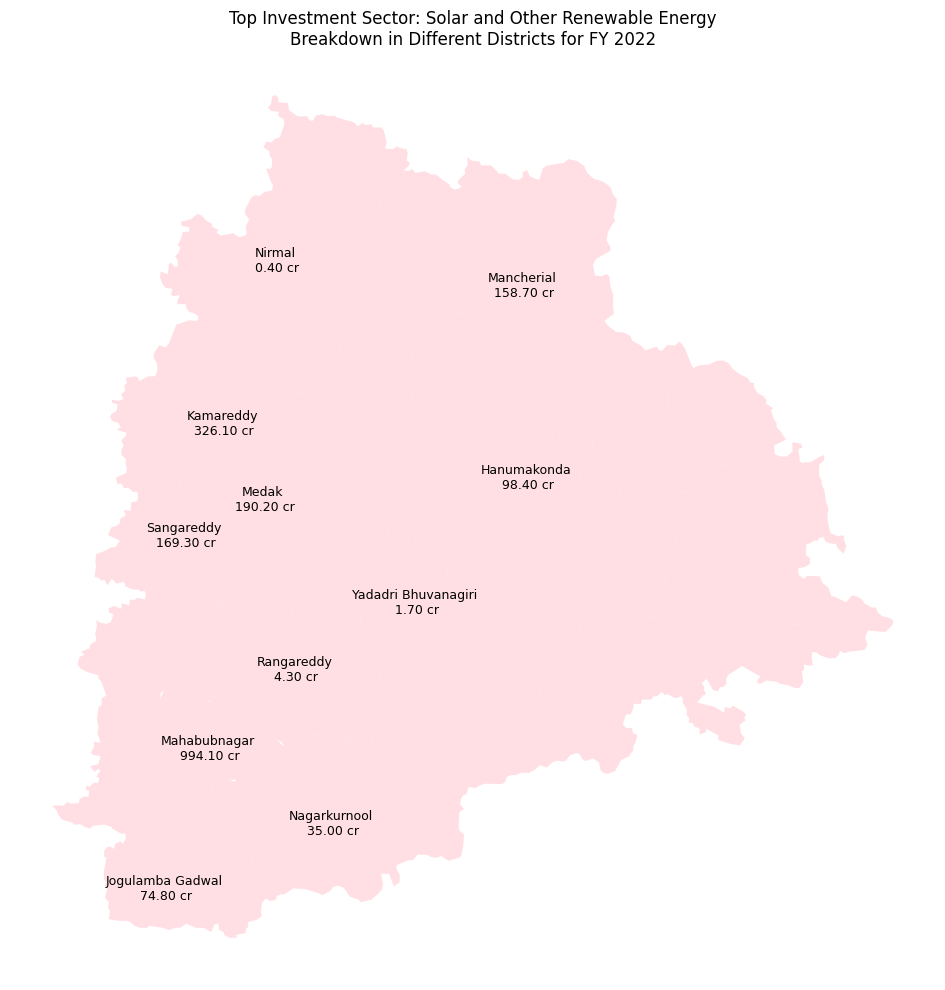

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


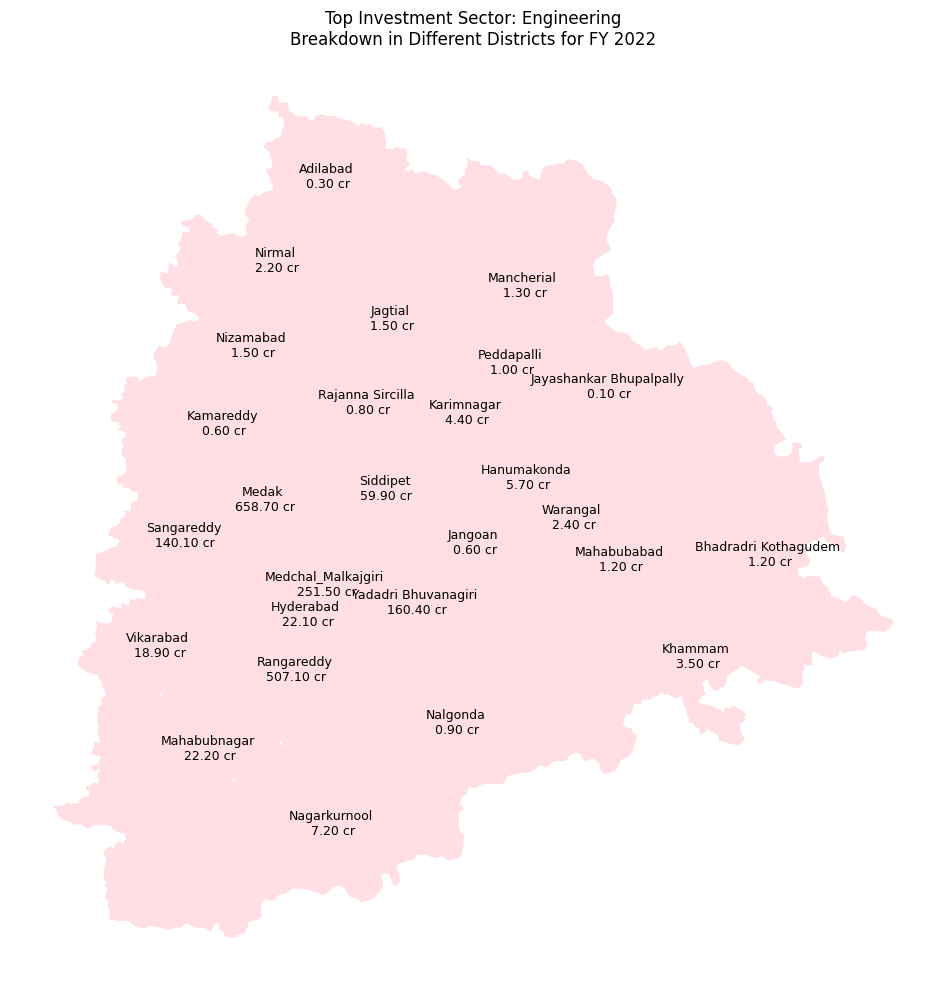

In [ ]:
top_sectors = ['Plastic and Rubber', 'Pharmaceuticals and Chemicals', 'Real Estate,Industrial Parks and IT Buildings', 'Solar and Other Renewable Energy', 'Engineering']

for sector in top_sectors:
    sector_data = fy_2022_data[fy_2022_data['sector'] == sector]
    district_investment = sector_data.groupby('district')['investment in cr'].sum()
    districts_with_investment = telangana_map.merge(district_investment, how='left', left_on='district', right_on='district')

    fig, ax = plt.subplots(figsize=(15, 10))
    districts_with_investment.plot(column='investment in cr', ax =ax, color='pink', edgecolor='none', legend=True, alpha=0.5, linewidth=0.2)
    for idx, row in districts_with_investment.iterrows():
        if not pd.isnull(row['investment in cr']):
            annotation = f"{row['district']}\n {row['investment in cr']:.2f} cr"
            ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, annotation, fontsize=9, ha='center', va='center', color='black')

    plt.title(f"Top Investment Sector: {sector}\nBreakdown in Different Districts for FY 2022")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

#### *9. List down the top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022? What factors could have led to the substantial investments in these particular districts?*


In [ ]:
filtered_data = ipassdata[(ipassdata['fiscal_year'] >= 2019) & (ipassdata['fiscal_year'] <= 2022)]

# Group by district and sector and calculate total investments
district_sector_investments = filtered_data.groupby(['district', 'sector'])['investment in cr'].sum()
district_sector_investments = district_sector_investments.reset_index()

# Find the top 3 districts with the highest sector investments
top_districts = district_sector_investments.groupby('district')['investment in cr'].sum().nlargest(3)

print("Top 3 Districts with Highest Sector Investments (2019-2022):")
for district, total_investment in top_districts.items():
    district_sectors = district_sector_investments[district_sector_investments['district'] == district]['sector'].tolist()
    sectors_str = ", ".join(district_sectors)
    print(f"{district}: {sectors_str} - Total Investment: {total_investment:.2f} cr")

Top 3 Districts with Highest Sector Investments (2019-2022):
Rangareddy: Agro based incl Cold Storages, Automobile, Beverages, Cement, Cement & Concrete Products, Fly Ash Bricks, Electrical and Electronic Products, Engineering, Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related, Food Processing, Granite and Stone Crushing, Industrial Parks and IT Buildings, Others, Paper and Printing, Pharmaceuticals and Chemicals, Plastic and Rubber, R&D, Real Estate,Industrial Parks and IT Buildings, Solar and Other Renewable Energy, Textiles, Wood and Leather - Total Investment: 42705.20 cr
Sangareddy: Agro based incl Cold Storages, Automobile, Beverages, Cement, Cement & Concrete Products, Fly Ash Bricks, Electrical and Electronic Products, Engineering, Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related, Food Processing, Granite and Stone Crushing, Others, Paper and Printing, Pharmaceuticals and Chemicals, Plastic and Rubber, R&D, Real Estate,Indust

In [ ]:
district_investments = {}
grouped_data = district_sector_investments.groupby(['district', 'sector'])['investment in cr'].sum()
for district in top_districts.index:
    district_investments[district] = grouped_data[district].reset_index()
grouped_data

district             sector                                            
Adilabad             Agro based incl Cold Storages                           2.3
                     Beverages                                               1.4
                     Cement, Cement & Concrete Products, Fly Ash Bricks     23.2
                     Engineering                                             1.0
                     Food Processing                                         4.4
                                                                           ...  
Yadadri Bhuvanagiri  R&D                                                    37.0
                     Real Estate,Industrial Parks and IT Buildings          10.0
                     Solar and Other Renewable Energy                      765.1
                     Textiles                                               20.2
                     Wood and Leather                                        1.7
Name: investment in cr, Length: 442, 

In [ ]:
investments_df = pd.DataFrame(columns=['District', 'Sector', 'Investment'])

for district, data in district_investments.items():
    for sector, investment in zip(data['sector'], data['investment in cr']):
        investments_df = investments_df.append({'District': district, 'Sector': sector, 'Investment': investment}, ignore_index=True)
investments_df

<ipython-input-72-e6b517f2b9a4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  investments_df = investments_df.append({'District': district, 'Sector': sector, 'Investment': investment}, ignore_index=True)
<ipython-input-72-e6b517f2b9a4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  investments_df = investments_df.append({'District': district, 'Sector': sector, 'Investment': investment}, ignore_index=True)
<ipython-input-72-e6b517f2b9a4>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  investments_df = investments_df.append({'District': district, 'Sector': sector, 'Investment': investment}, ignore_index=True)
<ipython-input-72-e6b517f2b9a4>:5: FutureWarning: The frame.append method is deprecated and will be removed from

District                                             Sector  \
0           Rangareddy                      Agro based incl Cold Storages   
1           Rangareddy                                         Automobile   
2           Rangareddy                                          Beverages   
3           Rangareddy  Cement, Cement & Concrete Products, Fly Ash Br...   
4           Rangareddy                 Electrical and Electronic Products   
5           Rangareddy                                        Engineering   
6           Rangareddy  Fertlizers Organic and Inorganic,Pesticides,In...   
7           Rangareddy                                    Food Processing   
8           Rangareddy                         Granite and Stone Crushing   
9           Rangareddy                  Industrial Parks and IT Buildings   
10          Rangareddy                                             Others   
11          Rangareddy                                 Paper and Printing   
12          Rangareddy                      Pharmaceuticals and Chemicals   
13          Rangareddy                                 Plastic and Rubber   
14          Rangareddy                                                R&D   
15          Rangareddy      Real Estate,Industrial Parks and IT Buildings   
16          Rangareddy                   Solar and Other Renewable Energy   
17          Rangareddy                                           Textiles   
18          Rangareddy                                   Wood and Leather   
19          Sangareddy                      Agro based incl Cold Storages   
20          Sangareddy                                         Automobile   
21          Sangareddy                                          Beverages   
22          Sangareddy  Cement, Cement & Concrete Products, Fly Ash Br...   
23          Sangareddy                 Electrical and Electronic Products   
24          Sangareddy                                        Engineering   
25          Sangareddy  Fertlizers Organic and Inorganic,Pesticides,In...   
26          Sangareddy                                    Food Processing   
27          Sangareddy                         Granite and Stone Crushing   
28          Sangareddy                                             Others   
29          Sangareddy                                 Paper and Printing   
30          Sangareddy                      Pharmaceuticals and Chemicals   
31          Sangareddy                                 Plastic and Rubber   
32          Sangareddy                                                R&D   
33          Sangareddy      Real Estate,Industrial Parks and IT Buildings   
34          Sangareddy                   Solar and Other Renewable Energy   
35          Sangareddy                                           Textiles   
36          Sangareddy                                   Wood and Leather   
37  Medchal_Malkajgiri                      Agro based incl Cold Storages   
38  Medchal_Malkajgiri                                         Automobile   
39  Medchal_Malkajgiri                                          Beverages   
40  Medchal_Malkajgiri  Cement, Cement & Concrete Products, Fly Ash Br...   
41  Medchal_Malkajgiri                 Electrical and Electronic Products   
42  Medchal_Malkajgiri                                        Engineering   
43  Medchal_Malkajgiri  Fertlizers Organic and Inorganic,Pesticides,In...   
44  Medchal_Malkajgiri                                    Food Processing   
45  Medchal_Malkajgiri                         Granite and Stone Crushing   
46  Medchal_Malkajgiri                                             Others   
47  Medchal_Malkajgiri                                 Paper and Printing   
48  Medchal_Malkajgiri                      Pharmaceuticals and Chemicals   
49  Medchal_Malkajgiri                                 Plastic and Rubber   
50  Medchal_Malkajgiri                                                R&D   
51  Medcha

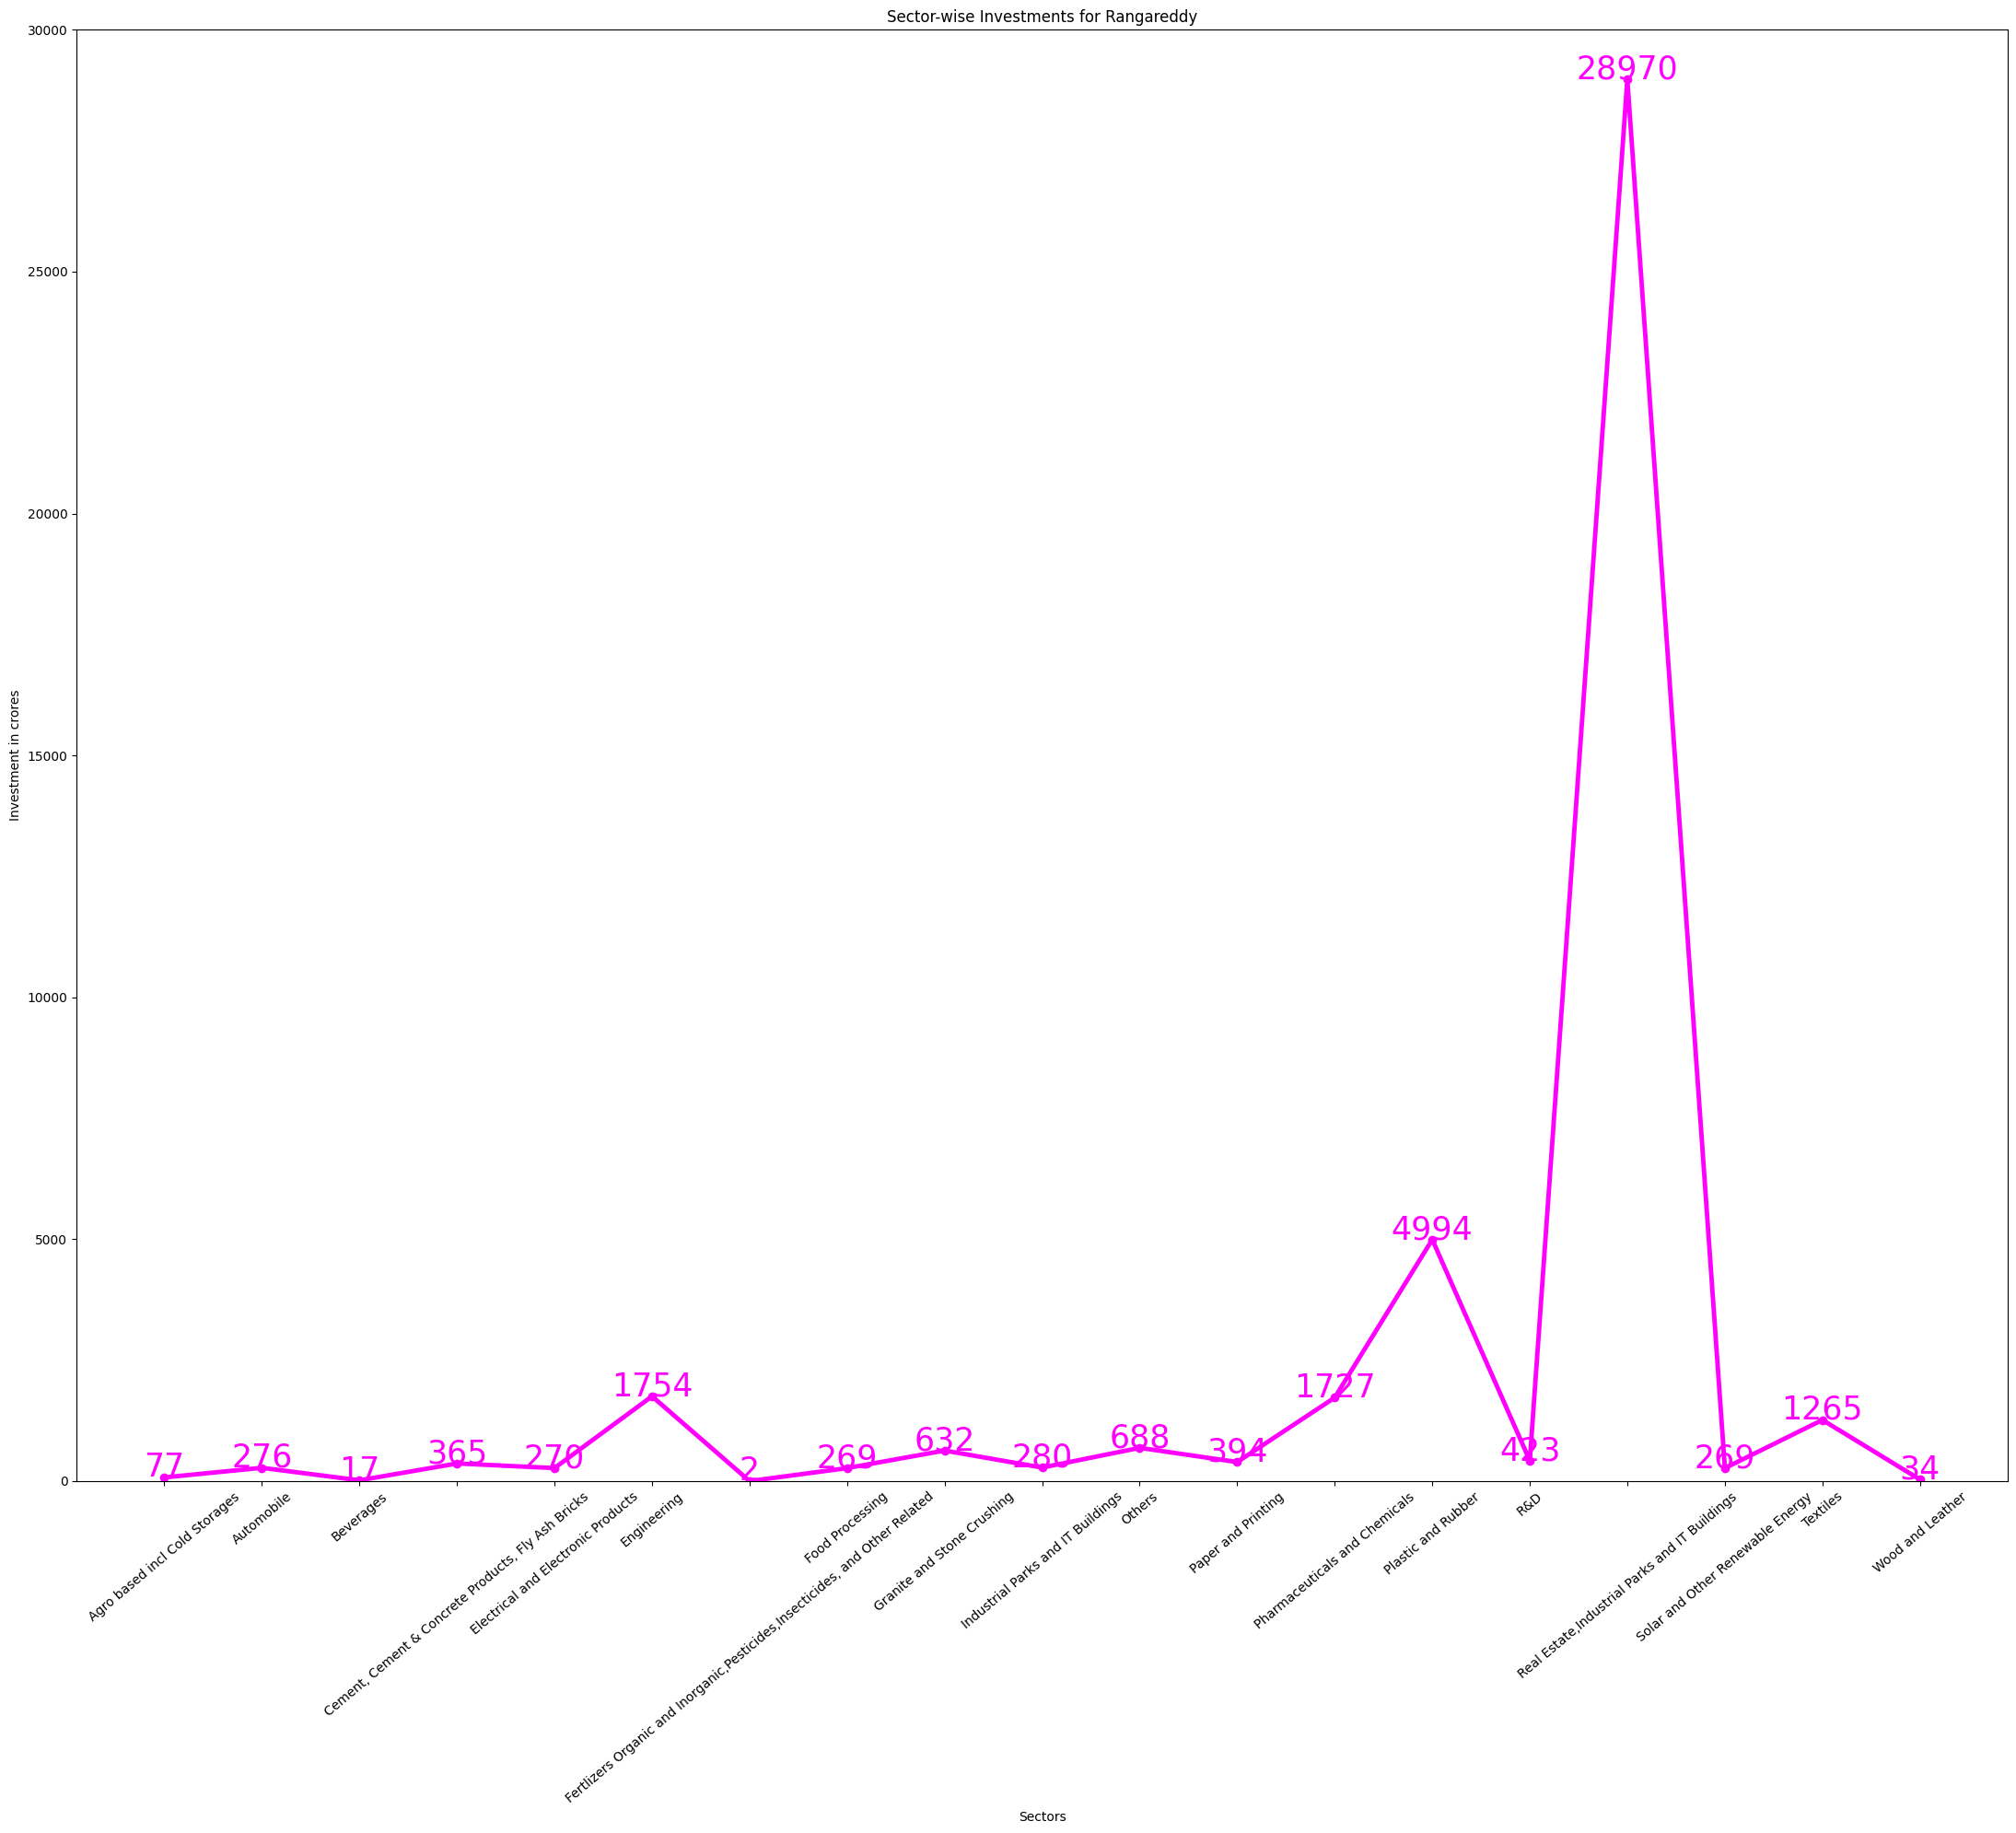

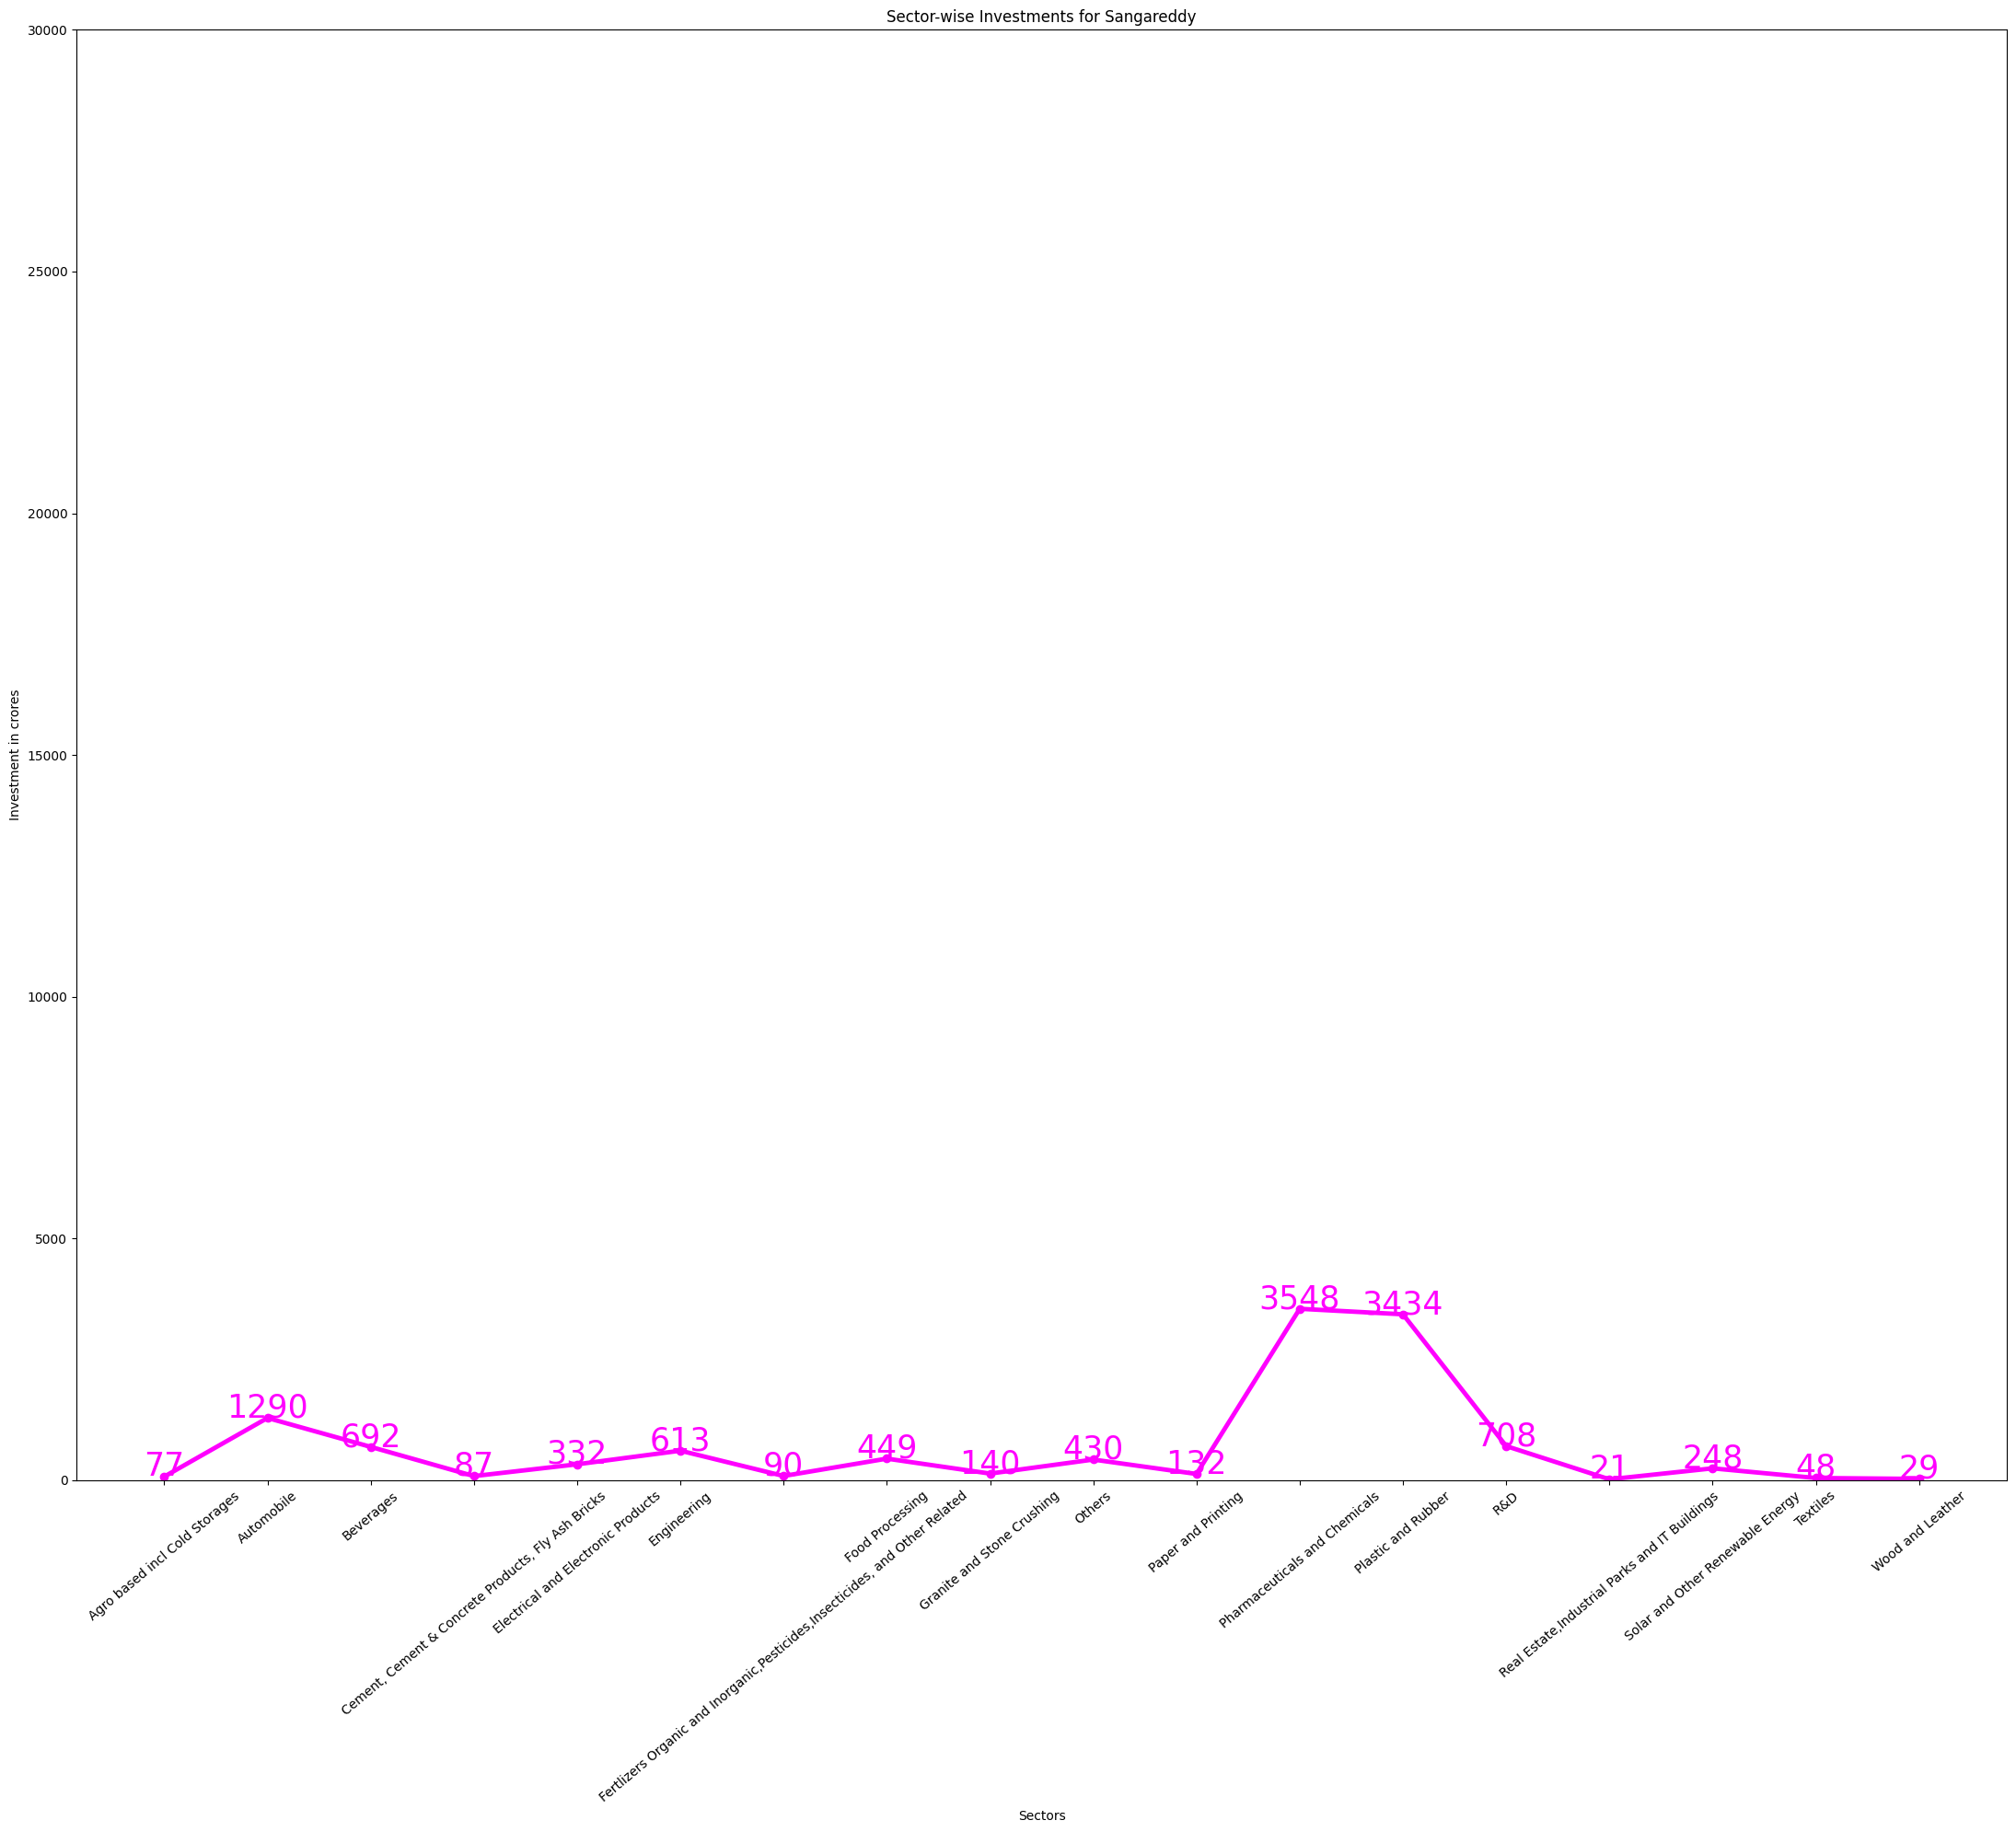

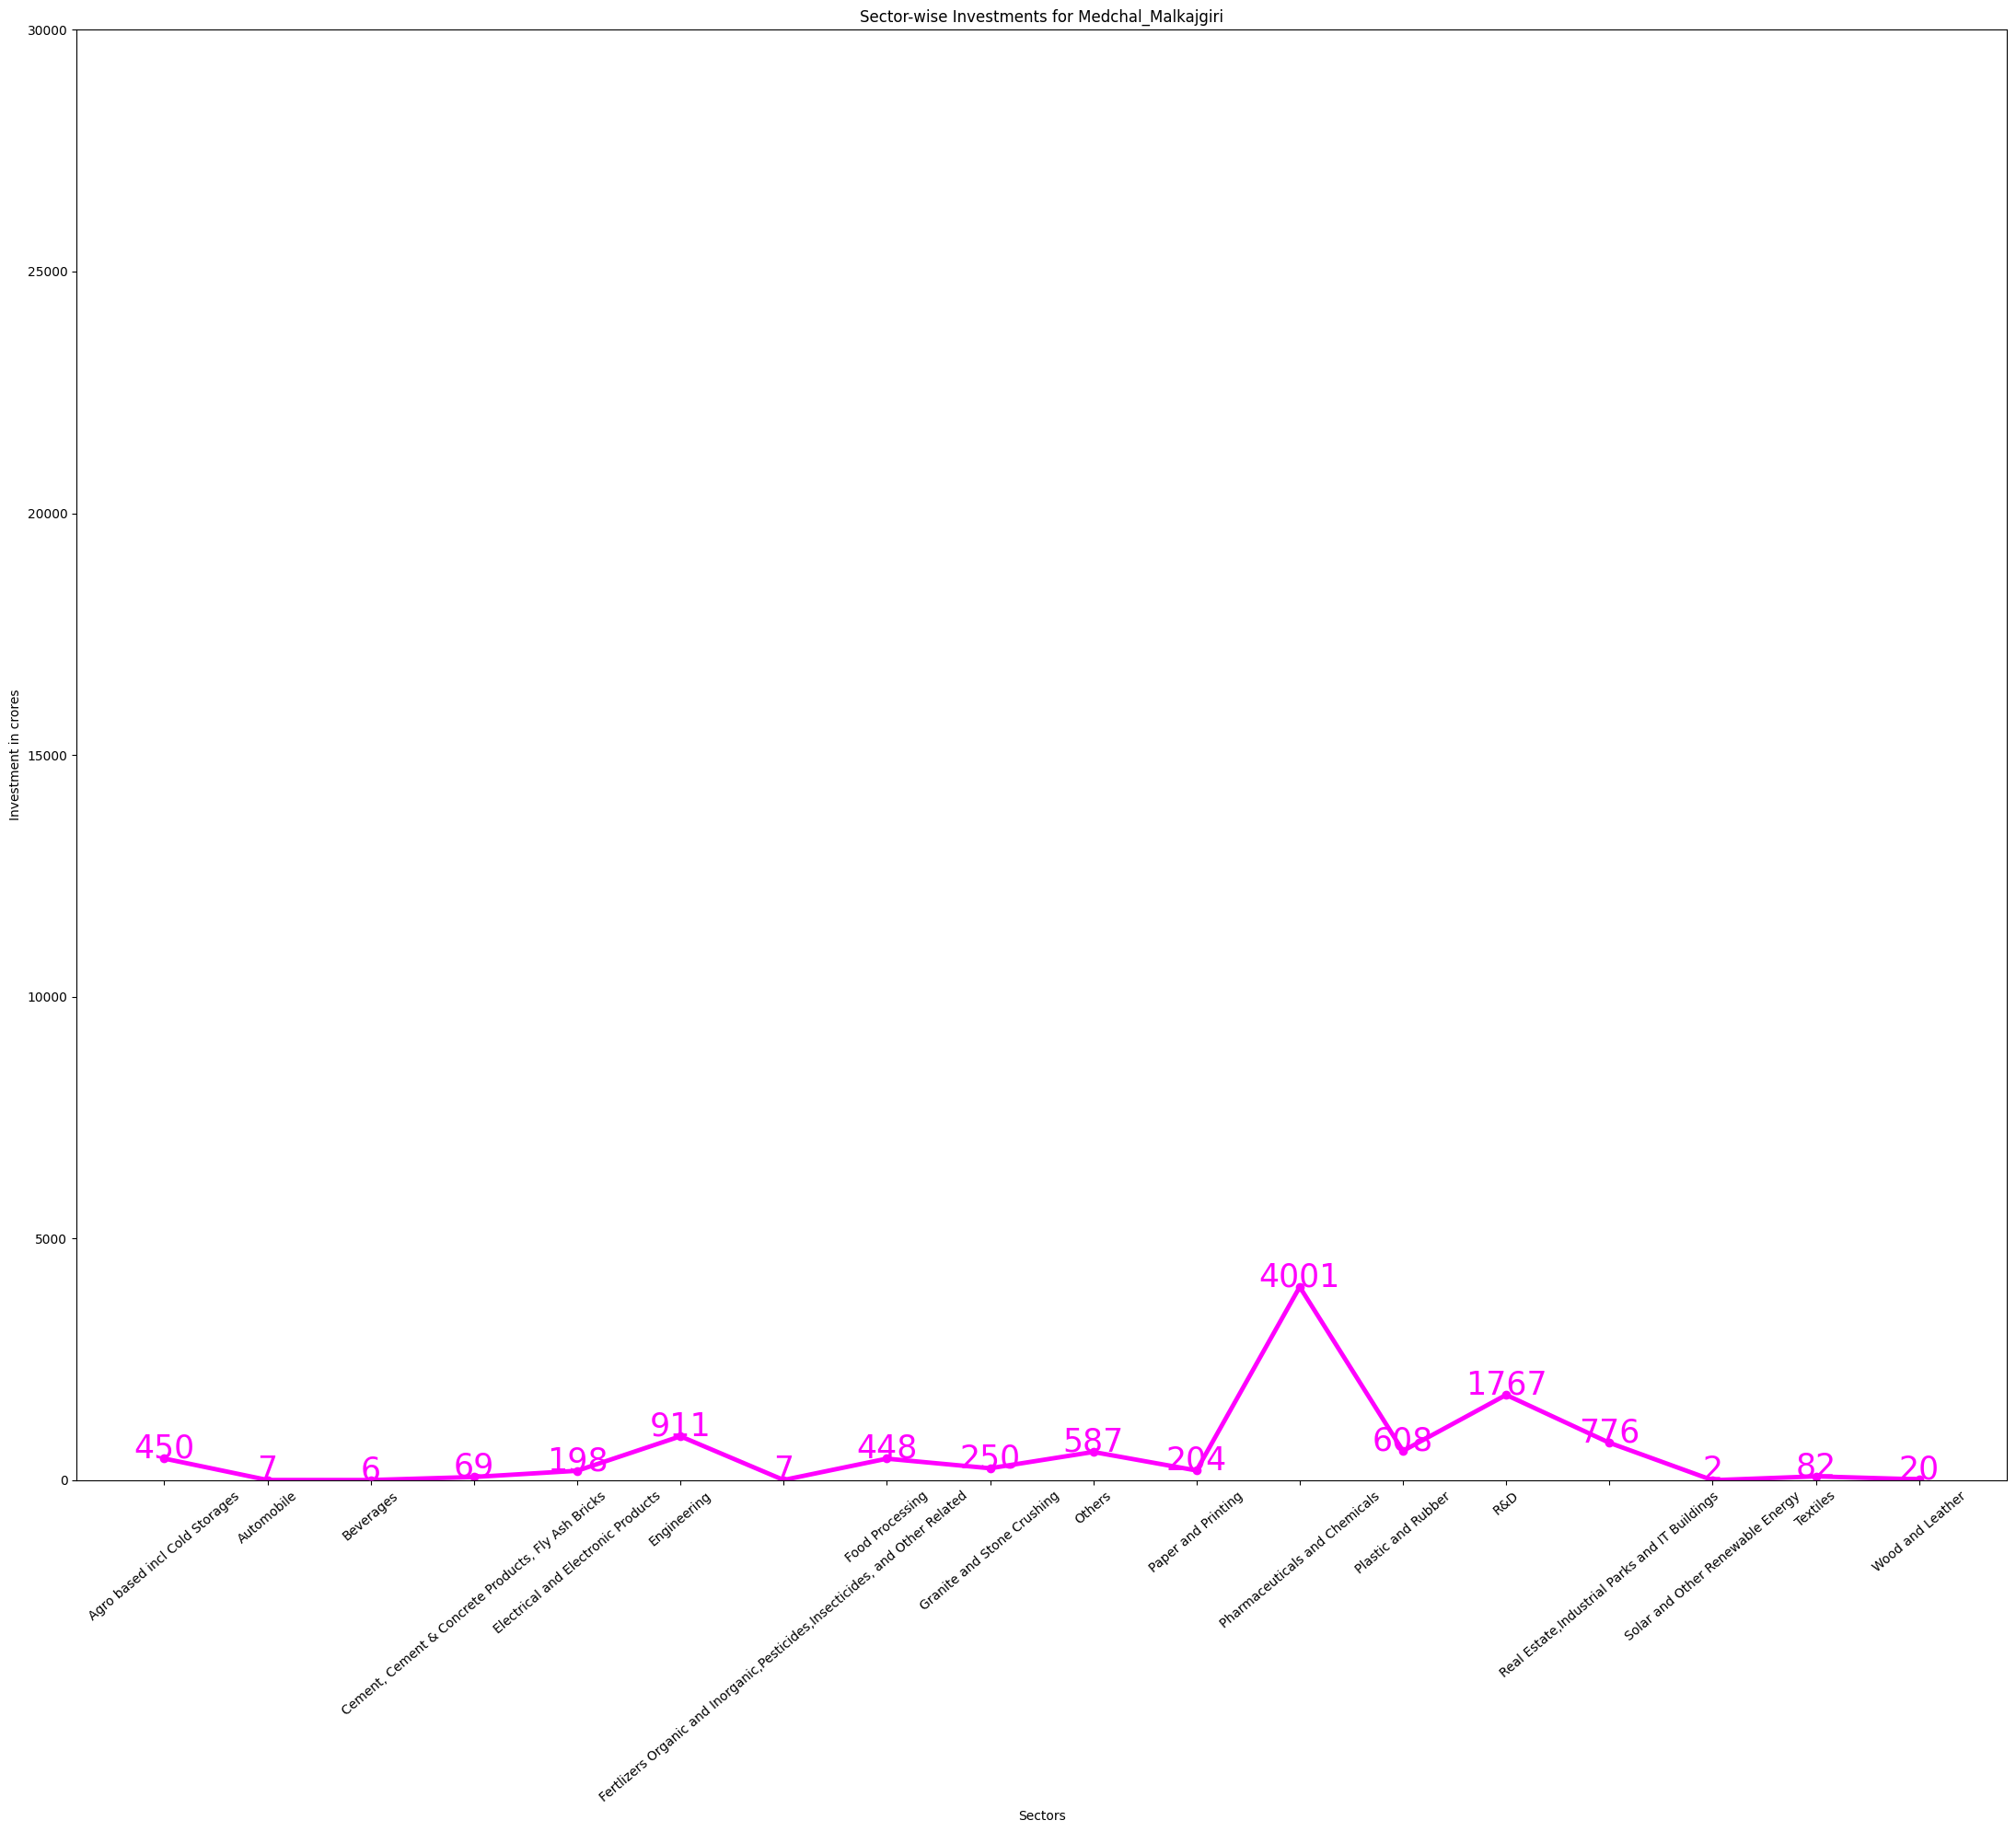

In [ ]:
for district, data in district_investments.items():
    plt.figure(figsize=(22, 20))
    plt.plot(data['sector'], data['investment in cr'], marker='o', linestyle='-', color='magenta', linewidth=3.5)  # Increase line width

    for x, y in zip(data['sector'], data['investment in cr']):
        plt.text(x, y + 11, f"{y:.0f}", ha='center', fontsize=25, color='magenta')

    plt.xlabel('Sectors')
    plt.ylabel('Investment in crores')
    plt.title(f'Sector-wise Investments for {district}')
    plt.xticks(data['sector'], rotation=40)
    plt.ylim(0, 30000)
    plt.tight_layout()
    plt.show()

In [ ]:
rangareddy_data = district_investments['Rangareddy']
rangareddy_data = rangareddy_data[rangareddy_data['sector'] != 'Industrial Parks and IT Buildings']


rangareddy_data
new_row = {
    'sector': 'Industrial Parks and IT Buildings',
    'investment in cr': 280.4
}

rangareddy_data = rangareddy_data.append(new_row, ignore_index=True)
rangareddy_data

<ipython-input-74-e85378237a7d>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rangareddy_data = rangareddy_data.append(new_row, ignore_index=True)


sector  investment in cr
0                       Agro based incl Cold Storages              76.9
1                                          Automobile             275.5
2                                           Beverages              16.9
3   Cement, Cement & Concrete Products, Fly Ash Br...             365.2
4                  Electrical and Electronic Products             270.0
5                                         Engineering            1754.0
6   Fertlizers Organic and Inorganic,Pesticides,In...               1.5
7                                     Food Processing             269.4
8                          Granite and Stone Crushing             632.1
9                                              Others             688.2
10                                 Paper and Printing             394.0
11                      Pharmaceuticals and Chemicals            1726.9
12                                 Plastic and Rubber            4993.5
13                                                R&D             422.8
14      Real Estate,Industrial Parks and IT Buildings           28970.4
15                   Solar and Other Renewable Energy             268.6
16                                           Textiles            1265.0
17                                   Wood and Leather              33.9
18                  Industrial Parks and IT Buildings             280.4

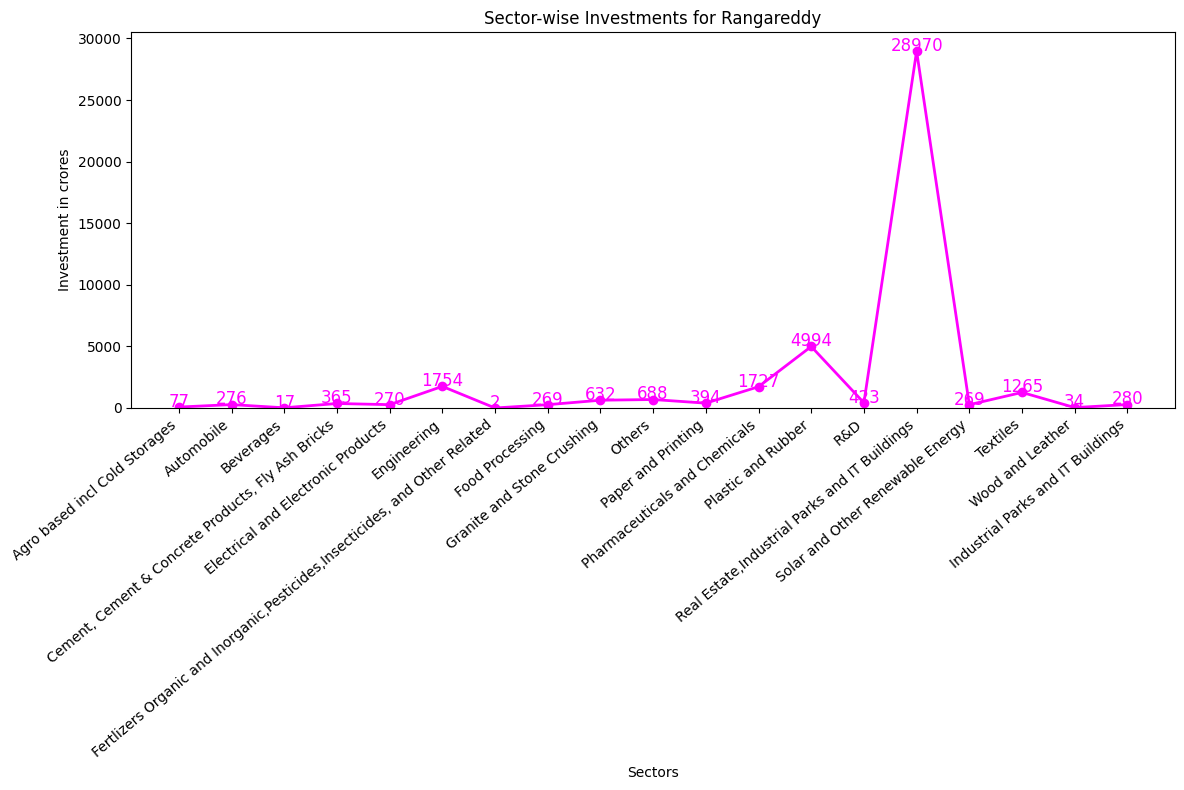

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(rangareddy_data['sector'], rangareddy_data['investment in cr'], marker='o', linestyle='-', color='magenta', linewidth=2)

for x, y in zip(rangareddy_data['sector'], rangareddy_data['investment in cr']):
    plt.text(x, y + 11, f"{y:.0f}", ha='center', fontsize=12, color='magenta')

plt.xlabel('Sectors')
plt.ylabel('Investment in crores')
plt.title('Sector-wise Investments for Rangareddy')
plt.xticks(rotation=40, ha='right')
plt.ylim(0, 30500)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


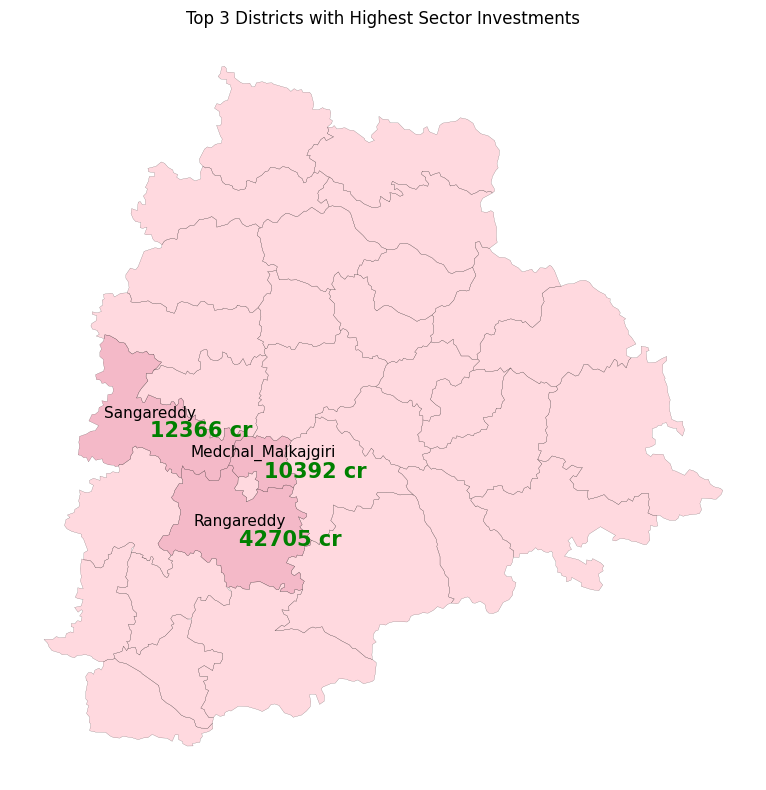

In [ ]:
top_districts = district_sector_investments.groupby('district')['investment in cr'].sum().nlargest(3)
top_districts_df = telangana_map[telangana_map['district'].isin(top_districts.index)]
top_districts_df = top_districts_df.merge(top_districts, left_on='district', right_index=True)

fig, ax = plt.subplots(figsize=(10, 8))
telangana_map.boundary.plot(ax=ax, color='black', linewidth=0.1)
telangana_map.plot(ax=ax, color='pink', alpha=0.6)

top_districts_df.plot(column='investment in cr', color='palevioletred', edgecolor='none', alpha=0.3, legend=False, ax=ax)

for idx, row in top_districts_df.iterrows():
    district_name = row['district']
    investment_amount = row['investment in cr']

    centroid_x = row['geometry'].centroid.x
    centroid_y = row['geometry'].centroid.y

    plt.text(centroid_x, centroid_y + 0.005, district_name, ha='center', va='bottom', fontsize=11, color='black')
    plt.text(centroid_x, centroid_y - 0.06, f"{investment_amount:.0f} cr", ha='left', va='center', fontsize=15, color='green', weight='bold')

plt.title('Top 3 Districts with Highest Sector Investments')
plt.axis('off')
plt.tight_layout()
plt.show()

#### *10. Is there any relationship between district investments, vehicles sales and stamps revenue within the same district between FY 2021 and 2022?*


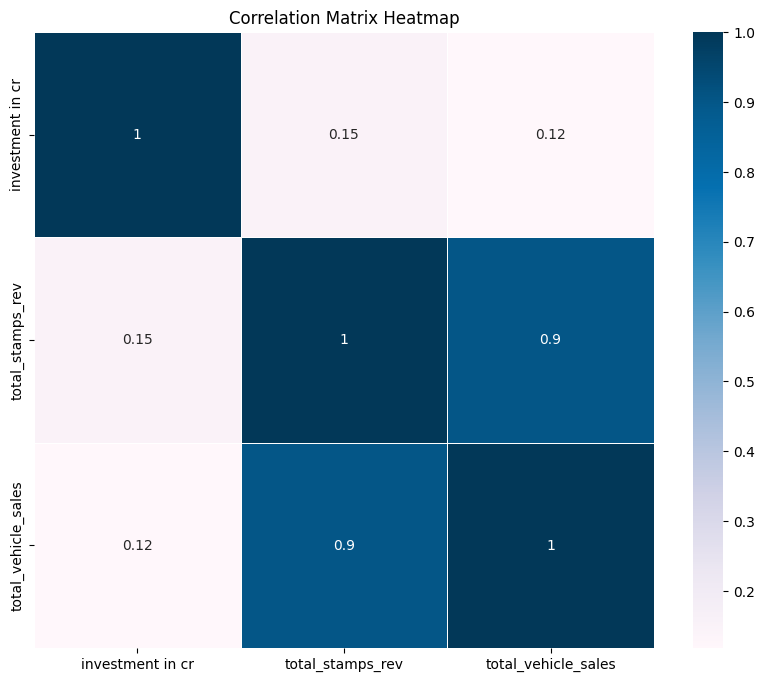

In [ ]:
stampdata['month'] = pd.to_datetime(stampdata['month'])
transportdata['month'] = pd.to_datetime(transportdata['month'])
ipassdata['month'] = pd.to_datetime(ipassdata['month'])

transportdata['total_vehicle_sales'] = transportdata[['Brand_new_vehicles', 'Pre-owned_vehicles', 'category_Non-Transport', 'category_Transport']].sum(axis=1)
stampdata['total_stamps_rev'] = stampdata[['estamps_challans_rev', 'documents_registered_rev']].sum(axis=1)

merged_data = stampdata.merge(transportdata, on=['dist_code', 'month', 'district'], how='inner')
merged_data = merged_data.merge(ipassdata, on=['dist_code', 'month', 'district'], how='inner')

filtered_data = merged_data[(merged_data['fiscal_year'] >= 2021) & (merged_data['fiscal_year'] <= 2022)]
selected_columns = ['investment in cr', 'total_stamps_rev', 'total_vehicle_sales']

correlation_matrix = filtered_data[selected_columns].corr()
correlation_matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
district_dataframes = filtered_data.groupby("district")
correlation_matrices = {}
for district, dataframe in district_dataframes:
    correlation_matrices[district] = dataframe[selected_columns].corr()

for district, correlation_matrix in correlation_matrices.items():
    print(district, correlation_matrix)

Adilabad                      investment in cr  total_stamps_rev  total_vehicle_sales
investment in cr             1.000000         -0.229699            -0.123685
total_stamps_rev            -0.229699          1.000000             0.216783
total_vehicle_sales         -0.123685          0.216783             1.000000
Bhadradri Kothagudem                      investment in cr  total_stamps_rev  total_vehicle_sales
investment in cr             1.000000          0.004528            -0.118232
total_stamps_rev             0.004528          1.000000             0.106848
total_vehicle_sales         -0.118232          0.106848             1.000000
Hyderabad                      investment in cr  total_stamps_rev  total_vehicle_sales
investment in cr             1.000000          0.015158             0.237918
total_stamps_rev             0.015158          1.000000             0.872793
total_vehicle_sales          0.237918          0.872793             1.000000
Jagtial                      investm

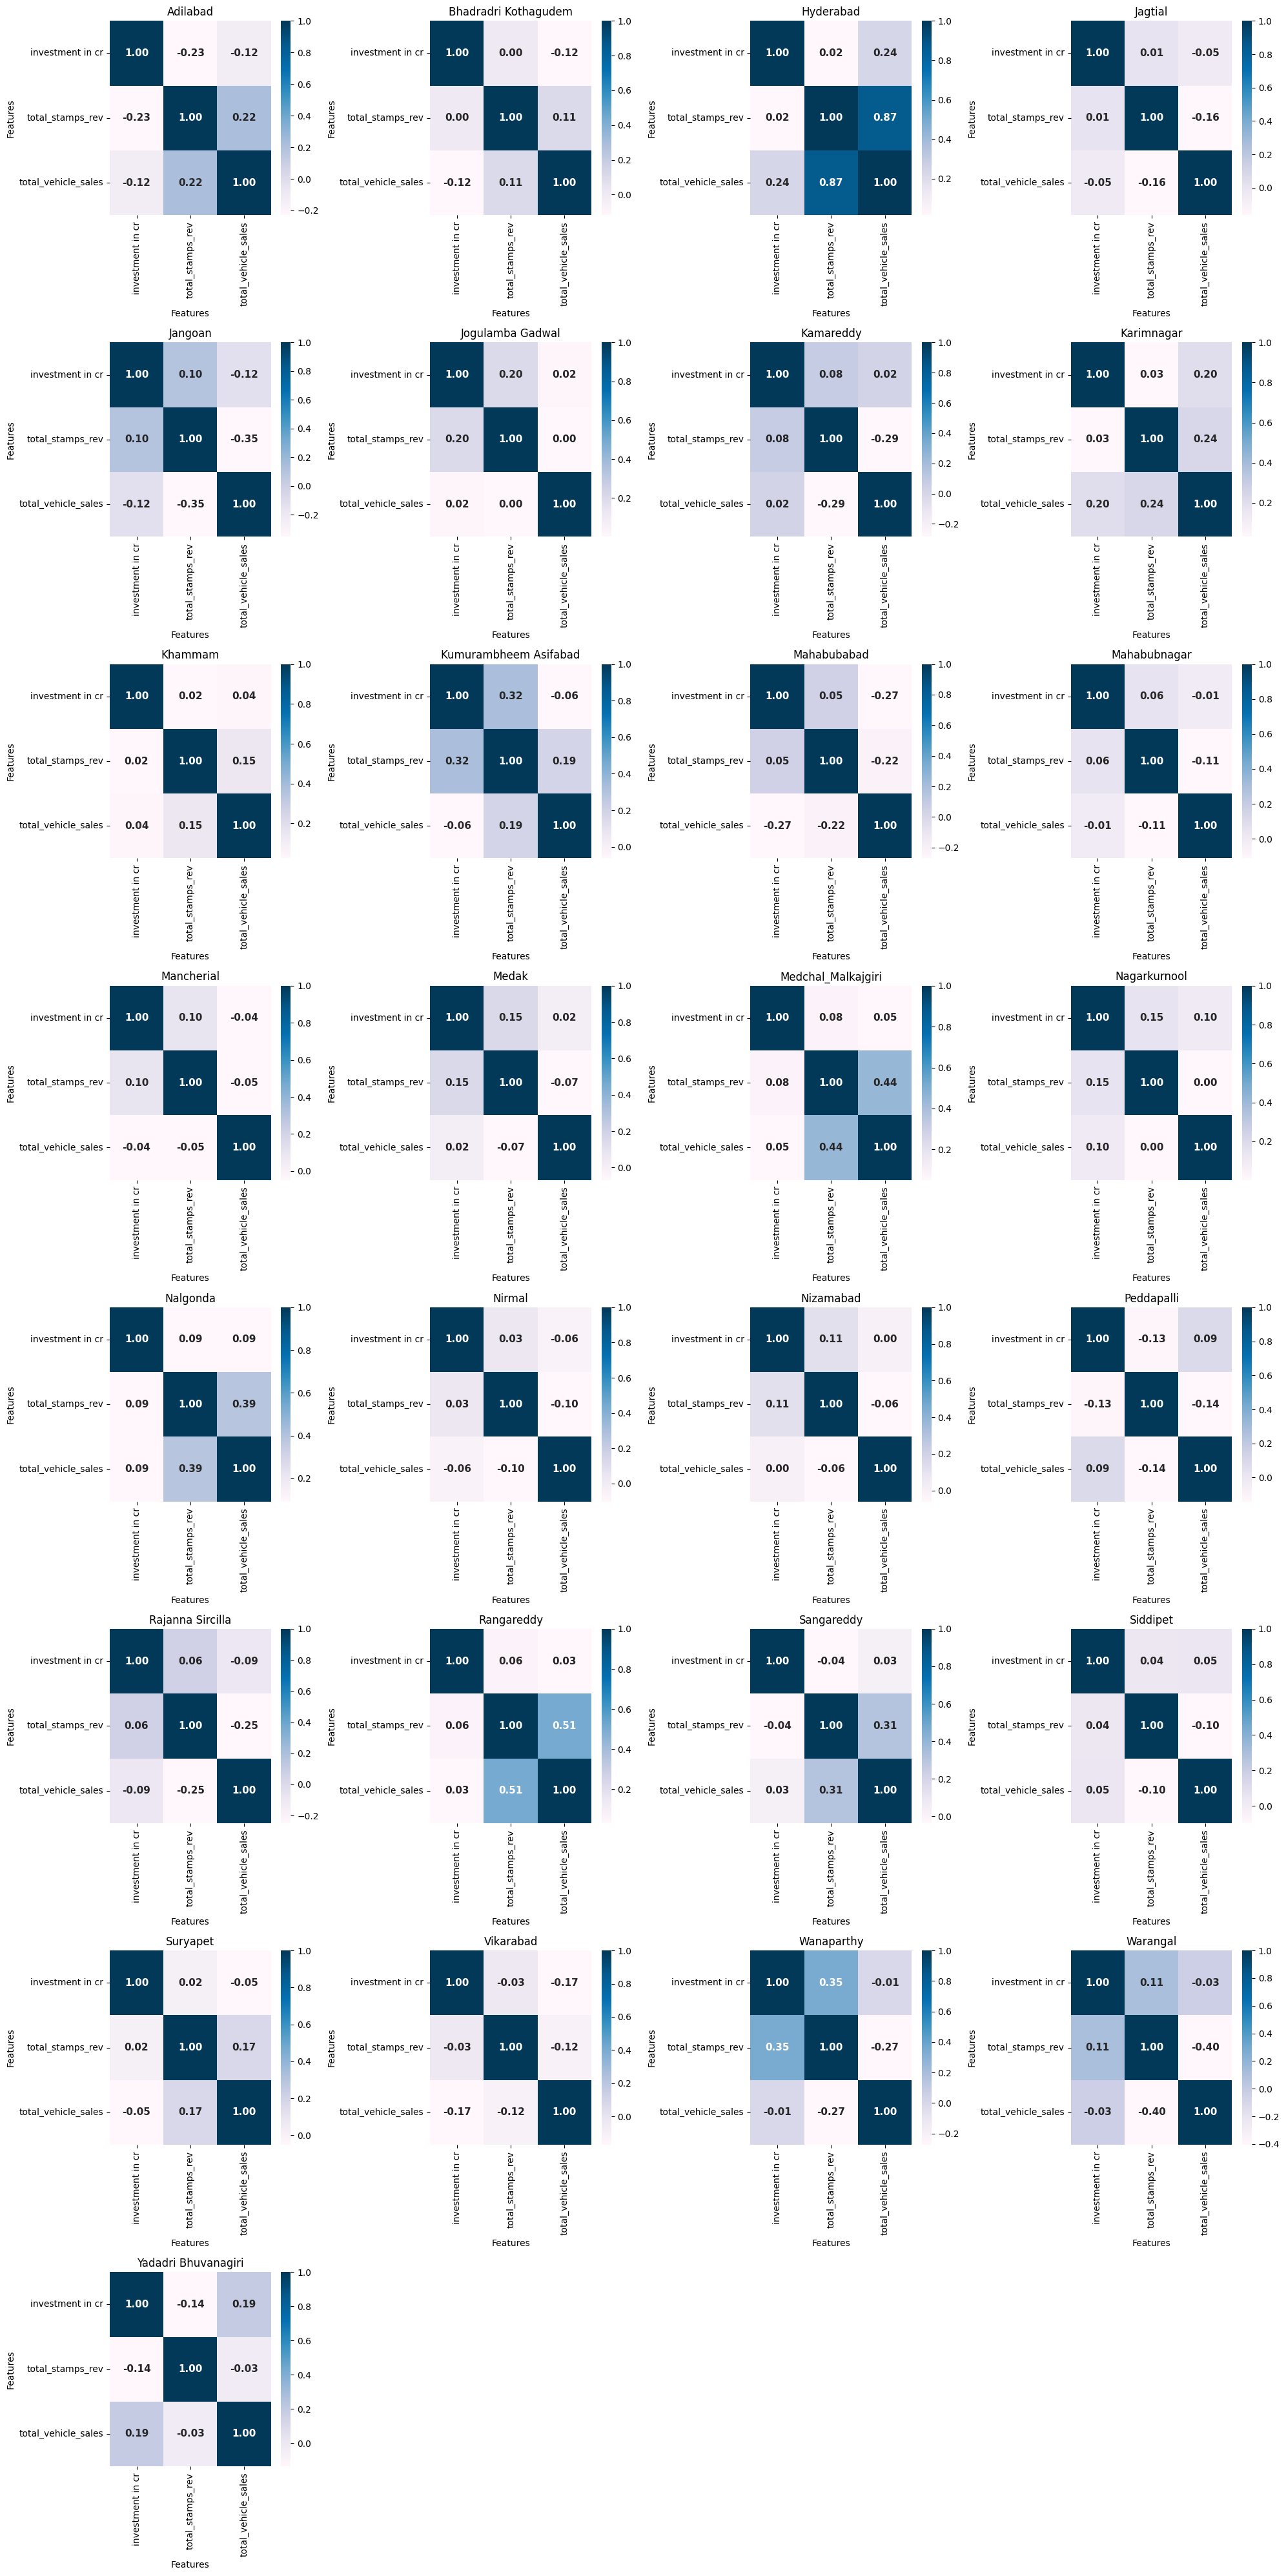

In [ ]:
num_districts = len(correlation_matrices)
num_cols = 4
num_rows = (num_districts + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

axes = axes.ravel()

font_properties = {'size': 11, 'weight': 'bold'}
for i, (district, correlation_matrix) in enumerate(correlation_matrices.items()):
    sns.heatmap(correlation_matrix, ax=axes[i], annot=True, cmap="PuBu", fmt=".2f", annot_kws=font_properties)
    axes[i].set_title(district)
    axes[i].set_xlabel("Features")
    axes[i].set_ylabel("Features")

for i in range(num_districts, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### *11. Are there any particular sectors that have shown substantial investment in multiple districts between FY 2021 and 2022?*

In [ ]:
fy_2021_2022_data = ipassdata[ipassdata['fiscal_year'].isin([2021, 2022])]
def calculate_iqr(group):
    q75, q25 = np.percentile(group, [75 ,25])
    return q75 - q25

sector_iqr = fy_2021_2022_data.groupby('sector')['investment in cr'].agg(calculate_iqr)
upper_bound = sector_iqr * 1.5 + fy_2021_2022_data.groupby('sector')['investment in cr'].median()
fy_2021_2022_data_copy = fy_2021_2022_data.copy()
fy_2021_2022_data_copy['upper_bound'] = fy_2021_2022_data_copy['sector'].map(upper_bound)
substantial_investments = fy_2021_2022_data_copy[fy_2021_2022_data_copy['investment in cr'] > fy_2021_2022_data_copy['upper_bound']]
inv = substantial_investments[['district','sector', 'investment in cr']]
inv

district                         sector  investment in cr
2825           Sangareddy                    Engineering              21.1
2827           Sangareddy                         Others               8.1
2829           Sangareddy             Plastic and Rubber             934.9
2836           Sangareddy               Wood and Leather               3.1
2840           Rangareddy             Plastic and Rubber              28.0
...                   ...                            ...               ...
5714  Yadadri Bhuvanagiri                    Engineering              12.2
5716  Yadadri Bhuvanagiri                Food Processing              15.4
5721           Sangareddy                    Engineering              33.4
5740   Medchal_Malkajgiri  Agro based incl Cold Storages               8.4
5743             Nalgonda                Food Processing             229.7

[467 rows x 3 columns]

In [ ]:
fy_2021_2022_data = ipassdata[ipassdata['fiscal_year'].isin([2021, 2022])]

district_sector_investments = fy_2021_2022_data.groupby(['district', 'sector'])['investment in cr'].sum().reset_index()

district_max_sector = district_sector_investments.groupby('district')['investment in cr'].idxmax()

district_max_investments = district_sector_investments.loc[district_max_sector, ['district', 'sector', 'investment in cr']]
district_max_investments

district  \
5                   Adilabad   
18      Bhadradri Kothagudem   
33               Hanumakonda   
37                 Hyderabad   
44                   Jagtial   
57                   Jangoan   
65   Jayashankar Bhupalpally   
77          Jogulamba Gadwal   
87                 Kamareddy   
97                Karimnagar   
105                  Khammam   
123    Kumurambheem Asifabad   
132              Mahabubabad   
149             Mahabubnagar   
161               Mancherial   
167                    Medak   
189       Medchal_Malkajgiri   
198                   Mulugu   
204             Nagarkurnool   
220                 Nalgonda   
226               Narayanpet   
239                   Nirmal   
248                Nizamabad   
262               Peddapalli   
269         Rajanna Sircilla   
289               Rangareddy   
307               Sangareddy   
313                 Siddipet   
327                 Suryapet   
338                Vikarabad   
349               Wanaparthy   
359                 Warangal   
377      Yadadri Bhuvanagiri   

                                                sector  investment in cr  
5                           Granite and Stone Crushing               2.8  
18                                  Paper and Printing             984.2  
33                    Solar and Other Renewable Energy              98.4  
37                                         Engineering              23.3  
44                                     Food Processing              51.7  
57                                     Food Processing              84.1  
65                                     Food Processing              10.3  
77                    Solar and Other Renewable Energy              74.8  
87                       Pharmaceuticals and Chemicals             503.6  
97                          Granite and Stone Crushing             108.4  
105                      Agro based incl Cold Storages              94.7  
123                                    Food Processing               7.2  
132                                    Food Processing              72.0  
149                   Solar and Other Renewable Energy            1032.2  
161                   Solar and Other Renewable Energy             158.7  
167                                        Engineering             773.9  
189                      Pharmaceuticals and Chemicals            2098.0  
198                                    Food Processing              15.5  
204                                    Food Processing             123.4  
220                      Pharmaceuticals and Chemicals             746.6  
226                                          Beverages            1467.0  
239                                    Food Processing              26.8  
248                                    Food Processing              71.9  
262                                 Paper and Printing              35.0  
269                                    Food Processing              45.3  
289                                 Plastic and Rubber            4633.3  
307                                 Plastic and Rubber            2806.8  
313                      Agro based incl Cold Storages             721.7  
327  Cement, Cement & Concrete Products, Fly Ash Br...             952.3  
338                                        Engineering              51.3  
349                                          Beverages             330.0  
359                                    Food Processing              50.6  
377                      Pharmaceuticals and Chemicals            1165.8

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


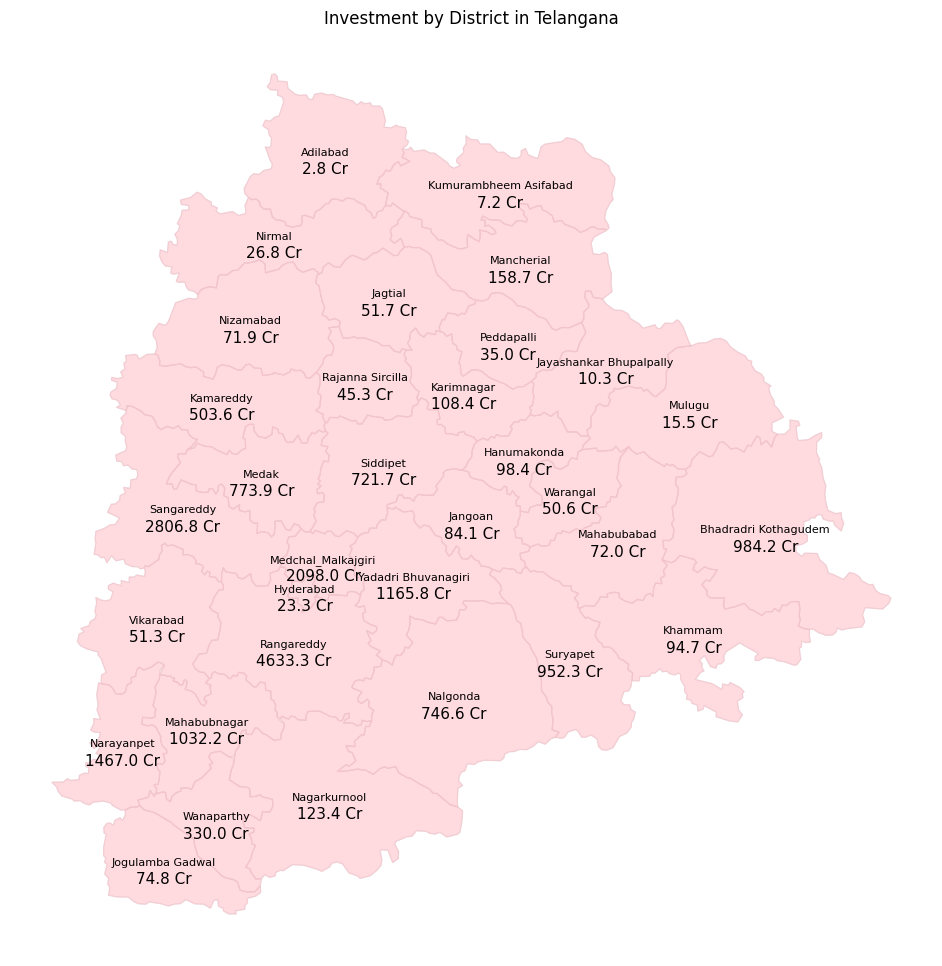

In [ ]:
merged_map = telangana_map.merge(district_max_investments, on='district', how='left')

merged_map['investment in cr'] = merged_map['investment in cr'].round(1)

fig, ax = plt.subplots(figsize=(17, 12))

merged_map.boundary.plot(ax=ax, linewidth=0.8, color="pink", alpha=0.5)
merged_map.plot(column='investment in cr', color='lightpink', linewidth=0.8, edgecolor='0.8', alpha=0.5, ax=ax)

for idx, row in merged_map.iterrows():
    ax.annotate(f"{row['district']}", xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)
    ax.annotate(f"{row['investment in cr']} Cr", xy=(row['geometry'].centroid.coords[0][0], row['geometry'].centroid.coords[0][1]-0.09),
                ha='center', fontsize=11)

ax.set_title('Investment by District in Telangana')
ax.set_axis_off()
plt.legend().set_visible(False)
plt.show()

####*12. Can we identify any seasonal patterns or cyclicality in the investment trends for specific sectors? Do certain sectors experience higher investments during particular months?*

In [ ]:
ipassdata['month'] = pd.to_datetime(ipassdata['month'])
monthly_investments = ipassdata.pivot_table(values='investment in cr', index='sector', columns=ipassdata['month'].dt.month_name(), aggfunc='sum', fill_value=0)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_investments = monthly_investments[month_order]

monthly_investments.reset_index(inplace=True)
monthly_investments

month                                             sector  January  February  \
0                          Agro based incl Cold Storages     80.6      50.3   
1                                             Automobile   1254.3       0.1   
2                                              Beverages    861.6     687.0   
3      Cement, Cement & Concrete Products, Fly Ash Br...     39.6     102.0   
4                     Electrical and Electronic Products    269.3      51.5   
5                                            Engineering    192.7    1332.2   
6      Fertlizers Organic and Inorganic,Pesticides,In...     11.7      12.3   
7                                        Food Processing    242.1     282.7   
8                             Granite and Stone Crushing    170.2      83.0   
9                      Industrial Parks and IT Buildings      0.0     280.4   
10                                                Others    285.9     259.2   
11                                    Paper and Printing     75.6     180.0   
12                         Pharmaceuticals and Chemicals    936.8    1857.5   
13                                    Plastic and Rubber   1803.2     272.5   
14                                                   R&D    229.5     463.9   
15         Real Estate,Industrial Parks and IT Buildings   1397.2   17843.4   
16                      Solar and Other Renewable Energy    246.9       4.4   
17                                              Textiles     63.3      56.2   
18                                   Thermal Power Plant      0.0       0.0   
19                                      Wood and Leather     22.3      10.1   

month   March   April    May    June    July  August  September  October  \
0       291.2   113.3  147.8   605.6   137.3    98.3      207.9     88.6   
1         7.2     2.2   51.0     0.5    37.1     0.0        0.0    221.4   
2        14.3    18.8  345.0    17.6    14.9     2.8        9.7    108.9   
3       125.1    65.6   59.8   435.9   278.8   976.7       36.0     33.3   
4        59.1    40.9   42.8   104.4   175.7    27.7       63.7     36.1   
5       451.5   209.8  343.0   221.2   257.1   358.6      242.2    688.2   
6        18.0     8.0    3.7     8.3     6.4     9.1       53.9      8.9   
7       549.0   176.0  285.2   193.3   347.1   262.9      441.5    374.5   
8        92.5   126.9  253.3   312.0    73.1    81.7       69.6    397.2   
9         0.0     0.0    0.0     0.0     0.0     0.0        0.0      0.0   
10      204.7   122.2  124.2   425.0   744.4   266.5       77.1     54.0   
11      242.7    48.0   24.5    26.7  1061.6    92.9       35.3     28.3   
12      751.0   294.4  484.0  1693.9  2806.9   954.0     2139.7    930.6   
13      750.9  1093.3   73.8   634.0   329.9  1567.3      523.7    294.6   
14      478.8   639.6  152.5   359.3   355.7   193.8      489.2     42.0   
15     3398.9   822.7  903.3   270.8  1124.2  2007.7      283.4    904.6   
16      151.6  1202.9   98.5  1109.4   327.8    37.5      409.4      0.8   
17       66.1    15.1   37.9    51.2    81.4   103.9     1191.8     86.9   
18        0.0     0.0    0.0     0.0     0.0    87.0        0.0      0.0   
19        5.4     6.8    5.1    13.0    11.4    10.0       40.4      2.8   

month  November  December  
0          65.4     213.3  
1           0.4       1.0  
2         432.3     295.4  
3          49.2      35.9  
4          40.7      29.4  
5         285.8     439.8  
6           3.5    5274.4  
7         486.3     474.0  
8         176.4      83.5  
9           0.0       0.0  
10         73.4     592.5  
11       1001.2     128.4  
12        900.5    2108.4  
13        347.0    1958.3  
14         46.9      69.8  
15        822.1       0.0  
16       2008.3      42.4  
17         44.6      45.5  
18          0.0       0.0  
19         14.9       9.6

In [ ]:
def calculate_iqr(row):
    percentile_15 = np.percentile(row, 15)
    percentile_85 = np.percentile(row, 85)
    iqr = percentile_85 - percentile_15
    return iqr

for index, row in monthly_investments.iterrows():
    iqr = calculate_iqr(row[2:])
    months_below_15 = monthly_investments.columns[2:][row[2:] <= np.percentile(row[2:], 15)]
    months_above_85 = monthly_investments.columns[2:][row[2:] >= np.percentile(row[2:], 85)]

    print(f"Sector: {row['sector']}")
    print(f"Months below 15th percentile: {', '.join(months_below_15)}")
    print(f"Months above 85th percentile: {', '.join(months_above_85)}")
    for month in months_below_15:
        print(f"{month}: {row[month]} (Below 15th percentile)")
    for month in months_above_85:
        print(f"{month}: {row[month]} (Above 85th percentile)")
    print()

Sector: Agro based incl Cold Storages
Months below 15th percentile: February, November
Months above 85th percentile: March, June
February: 50.3 (Below 15th percentile)
November: 65.4 (Below 15th percentile)
March: 291.2 (Above 85th percentile)
June: 605.6 (Above 85th percentile)

Sector: Automobile
Months below 15th percentile: August, September
Months above 85th percentile: May, October
August: 0.0 (Below 15th percentile)
September: 0.0 (Below 15th percentile)
May: 51.0 (Above 85th percentile)
October: 221.4 (Above 85th percentile)

Sector: Beverages
Months below 15th percentile: August, September
Months above 85th percentile: February, November
August: 2.8000000000000003 (Below 15th percentile)
September: 9.700000000000001 (Below 15th percentile)
February: 687.0 (Above 85th percentile)
November: 432.3 (Above 85th percentile)

Sector: Cement, Cement & Concrete Products, Fly Ash Bricks
Months below 15th percentile: October, December
Months above 85th percentile: June, August
October: 3

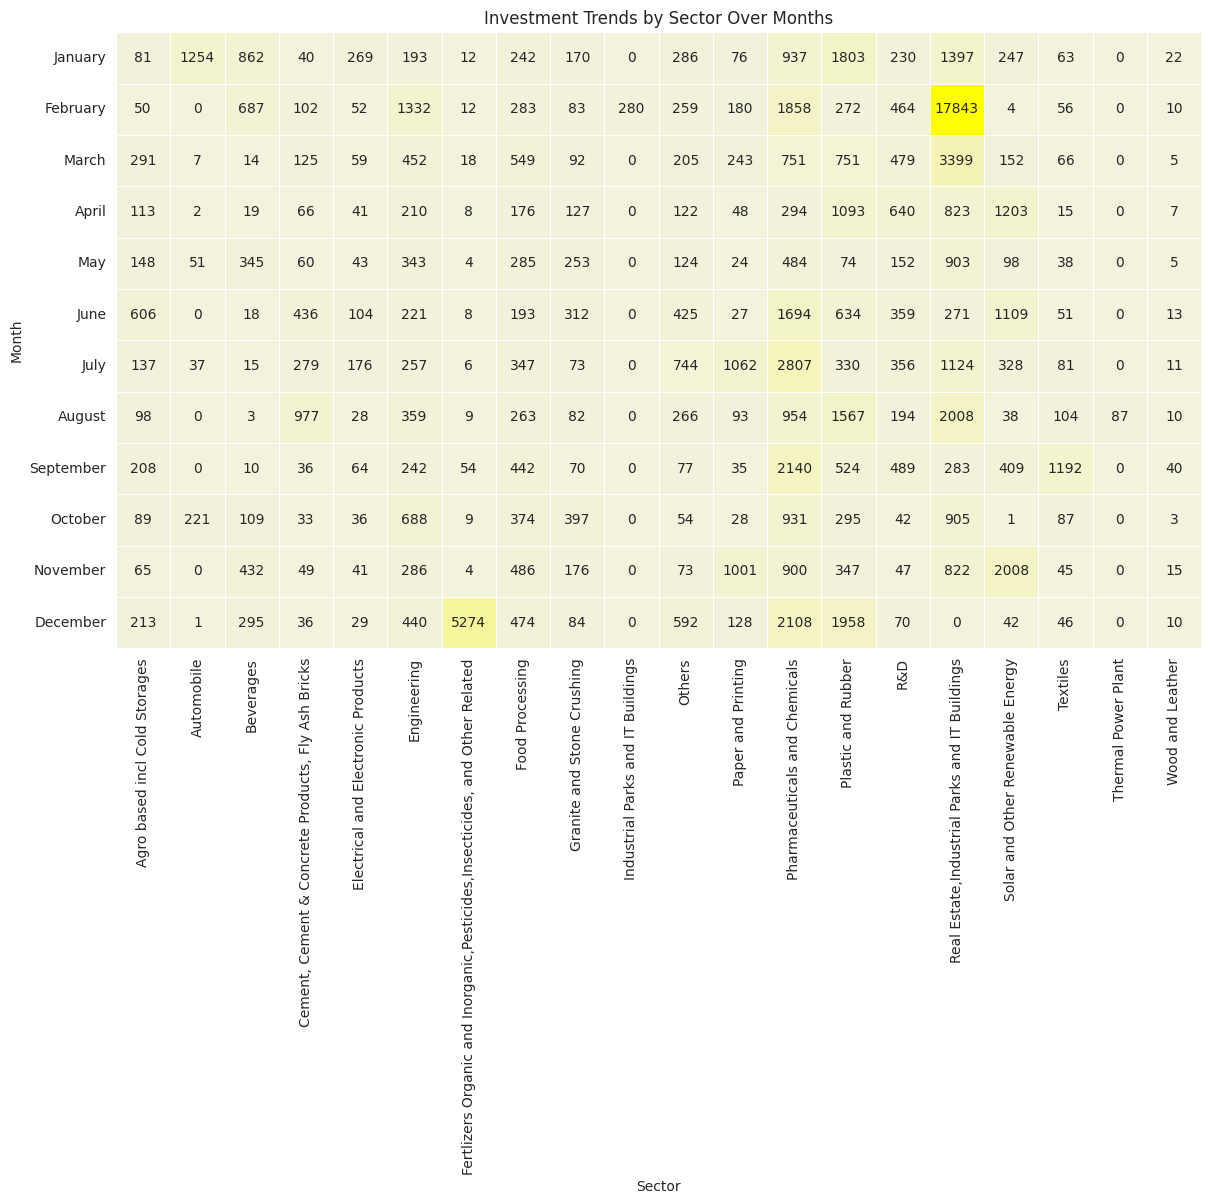

In [ ]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Set the colormap to light yellow
cmap = sns.light_palette("yellow", as_cmap=True)

heatmap_data = monthly_investments.set_index('sector').T

sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt=".0f", linewidths=0.5, cbar=False)  # Remove the colorbar
plt.xlabel('Sector')
plt.ylabel('Month')
plt.title('Investment Trends by Sector Over Months')
plt.xticks(rotation=90)
plt.show()

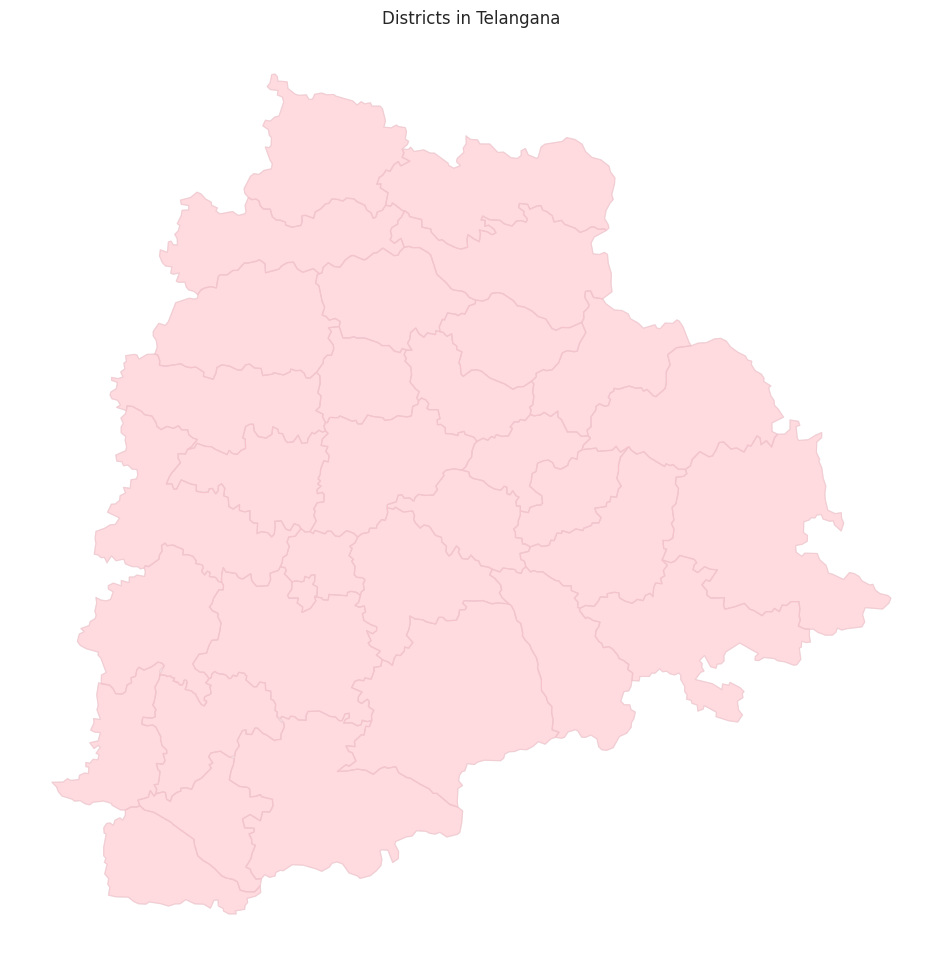

In [ ]:
#districts_to_highlight = ['Hyderabad', 'Rangareddy', 'Sangareddy', 'Medchal_Malkajgiri', 'Yadadri Bhuvanagiri']

# Plot the entire map
fig, ax = plt.subplots(figsize=(17, 12))

# Plot all districts
merged_map.boundary.plot(ax=ax, linewidth=0.8, color="pink", alpha=0.5)
merged_map.plot(color='lightpink', linewidth=0.8, edgecolor='0.8', alpha=0.5, ax=ax)

ax.set_title('Districts in Telangana')
ax.set_axis_off()
plt.legend().set_visible(False)
plt.show()

In [ ]:
v

2786700